# Problem Statements

- Objective:

- The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets.

- Dataset:

- Need to Classify the animal type

- Tasks:

1. Analyse the data using the visualizations
2. Preprocess the data by handling missing values & Outliers, if any.
3. Split the dataset into training and testing sets (80% training, 20% testing).
4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset
5. Choose an appropriate distance metric and value for K.
6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.
7. Visualize the decision boundaries of the classifier


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')

# Read Zoo dataset

In [91]:
df = pd.read_csv("Zoo.csv")
df

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0      aardvark     1         0     0     1         0        0         1   
1      antelope     1         0     0     1         0        0         0   
2          bass     0         0     1     0         0        1         1   
3          bear     1         0     0     1         0        0         1   
4          boar     1         0     0     1         0        0         1   
..          ...   ...       ...   ...   ...       ...      ...       ...   
96      wallaby     1         0     0     1         0        0         0   
97         wasp     1         0     1     0         1        0         0   
98         wolf     1         0     0     1         0        0         1   
99         worm     0         0     1     0         0        0         0   
100        wren     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1         1         1         0     0     4     0         0   
1          1         1         1         0     0     4     1         0   
2          1         1         0         0     1     0     1         0   
3          1         1         1         0     0     4     0         0   
4          1         1         1         0     0     4     1         0   
..       ...       ...       ...       ...   ...   ...   ...       ...   
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
0          1     1  
1          1     1  
2          0     4  
3          1     1  
4          1     1  
..       ...   ...  
96         1     1  
97         0     6  
98         1     1  
99         0     7  
100        0     2  

[101 rows x 18 columns]

# EDA (Exploratory Data Analysis)

- Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.


- Steps involved in EDA

- Describing the data
- Data cleaning
- Imputation techniques
- Data analysis and visualization
- Transformations
- Auto EDA

# Describing the data

In [4]:
df.describe()

hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.491512    0.384605    0.407844    0.271410    0.376013   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    1.000000    1.000000    0.000000    0.000000   
50%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             legs        tail    domestic     catsize        type  
count  101.000000  101.000000  101.000000  101.000000  101.000000  
mean     2.841584    0.742574    0.128713    0.435644    2.831683  
std      2.033385    0.439397    0.336552    0.498314    2.102709  
min      0.000000    0.000000    0.000000    0.000000    1.000000  
25%      2.000000    0.000000    0.000000    0.000000    1.000000  
50%      4.000000    1.000000    0.000000    0.000000    2.000000  
75%      4.000000    1.000000    0.000000    1.000000    4.000000  
max      8.000000    1.000000    1.000000    1.000000    7.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

# Outlier detection

- There are multiple approaches to detect outliers in the dataset.
    - Histogram
    - Boxplot
    - Descriptive stats for df

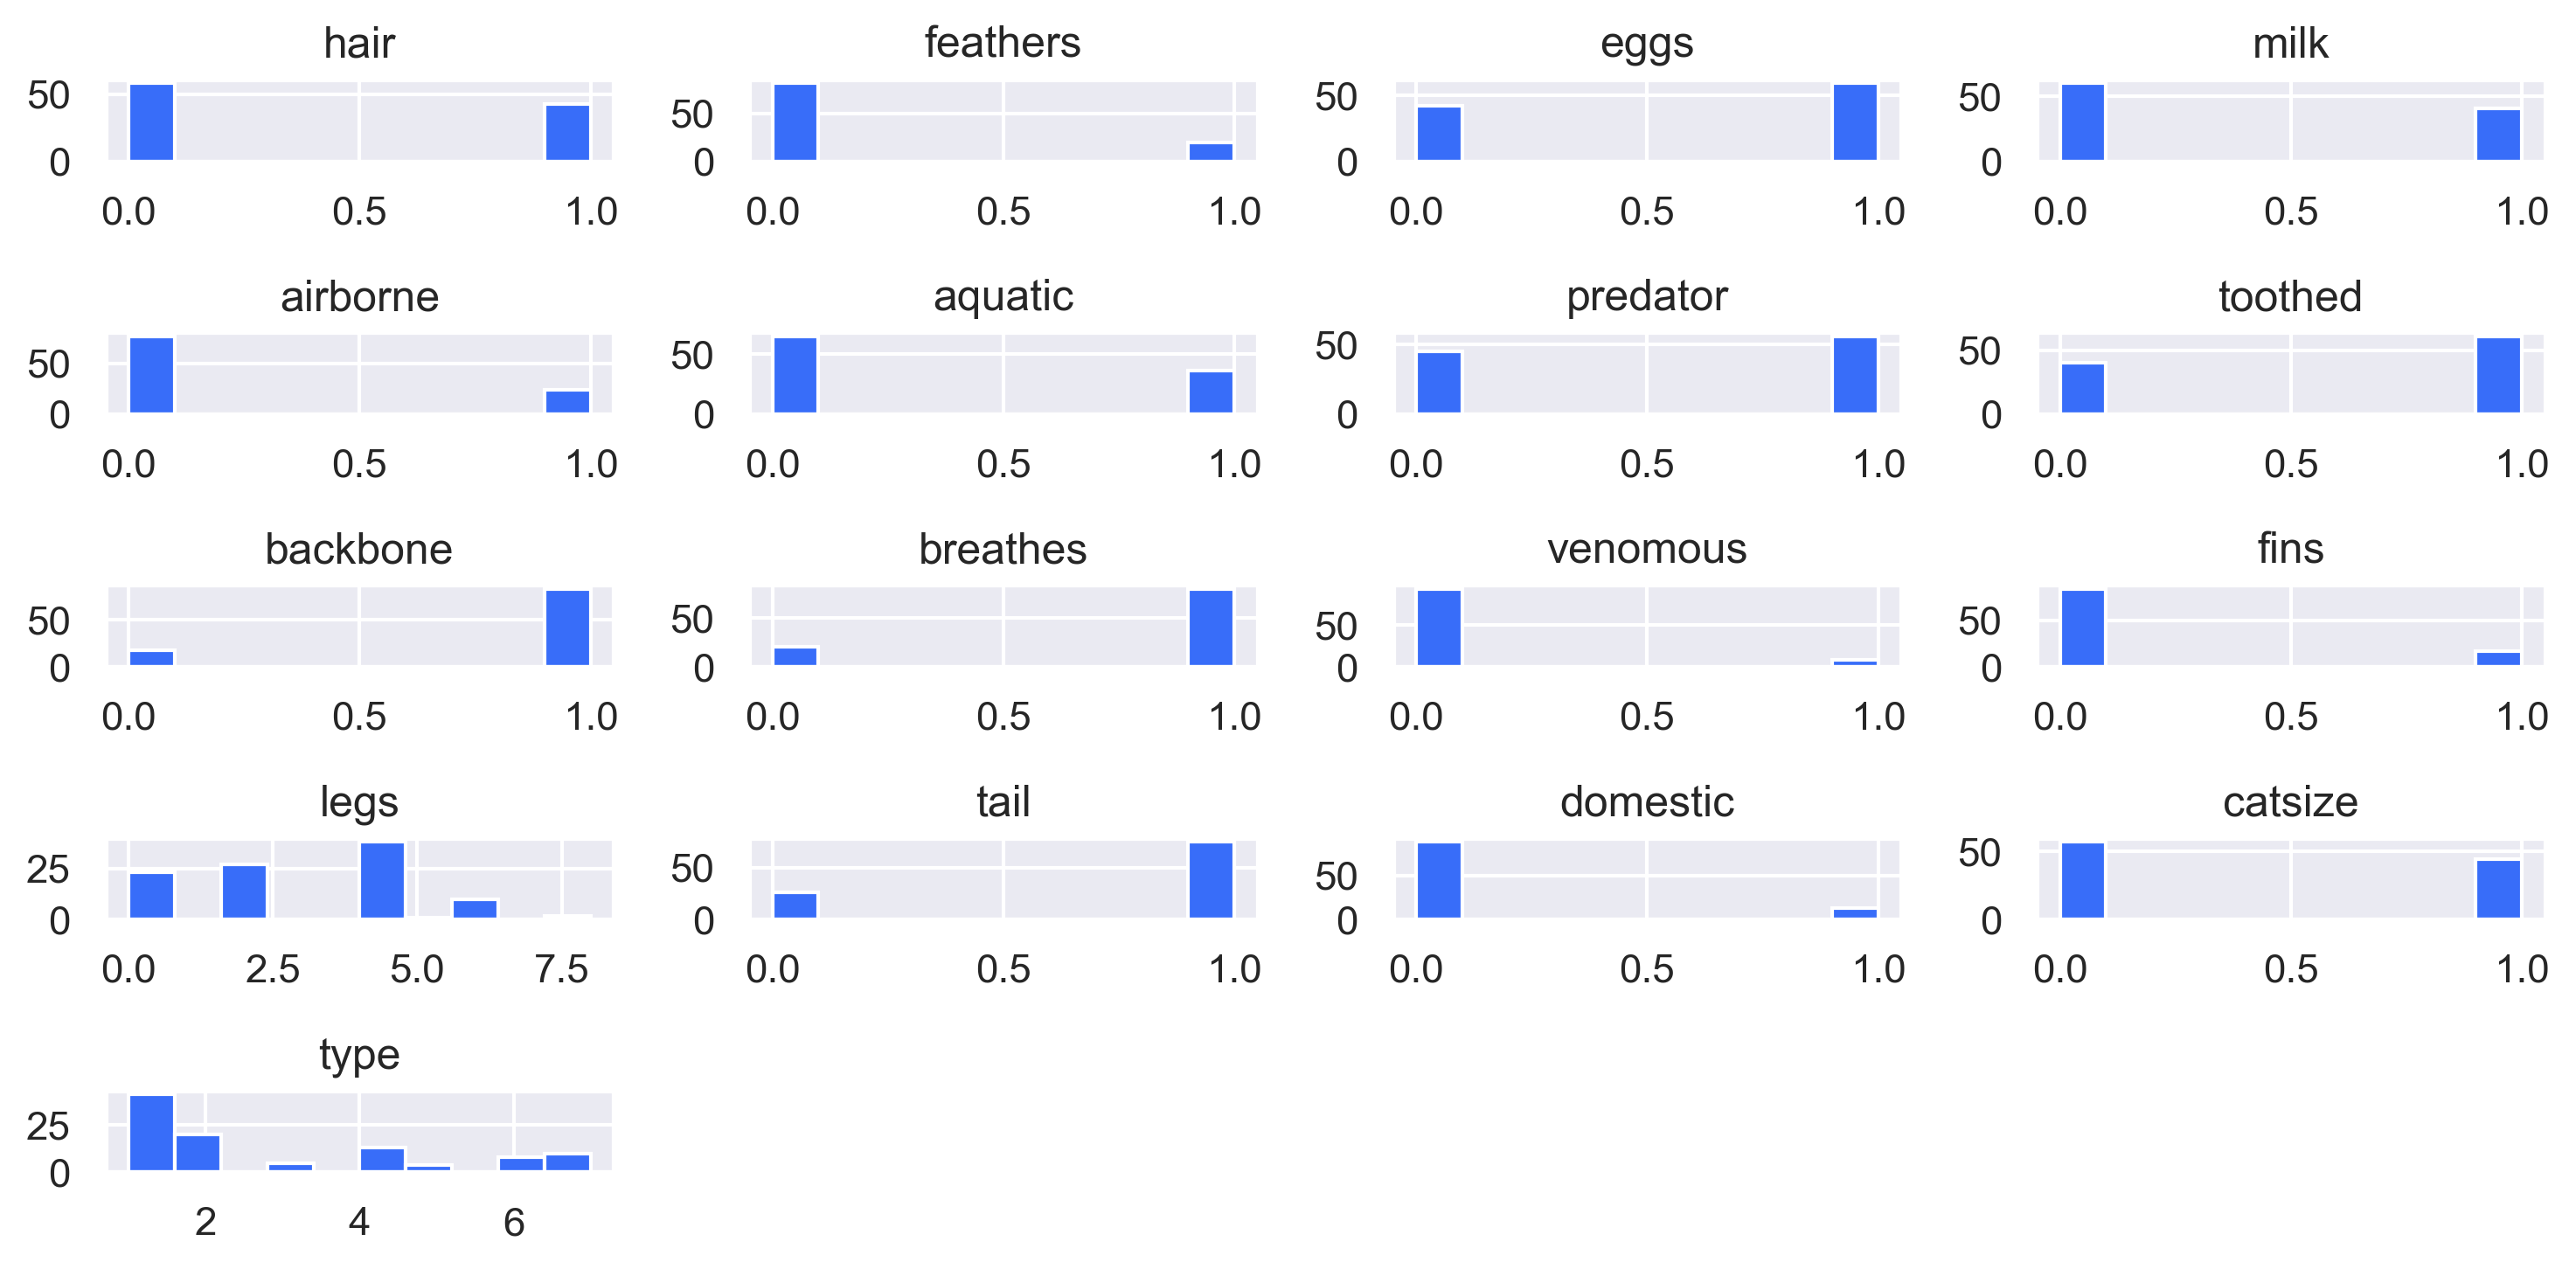

In [10]:
df.hist()
plt.tight_layout()

In [11]:
df.describe()

hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.491512    0.384605    0.407844    0.271410    0.376013   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    1.000000    1.000000    0.000000    0.000000   
50%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
75%      1.000000    1.000000    1.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             legs        tail    domestic     catsize        type  
count  101.000000  101.000000  101.000000  101.000000  101.000000  
mean     2.841584    0.742574    0.128713    0.435644    2.831683  
std      2.033385    0.439397    0.336552    0.498314    2.102709  
min      0.000000    0.000000    0.000000    0.000000    1.000000  
25%      2.000000    0.000000    0.000000    0.000000    1.000000  
50%      4.000000    1.000000    0.000000    0.000000    2.000000  
75%      4.000000    1.000000    0.000000    1.000000    4.000000  
max      8.000000    1.000000    1.000000    1.000000    7.000000

<Axes: >

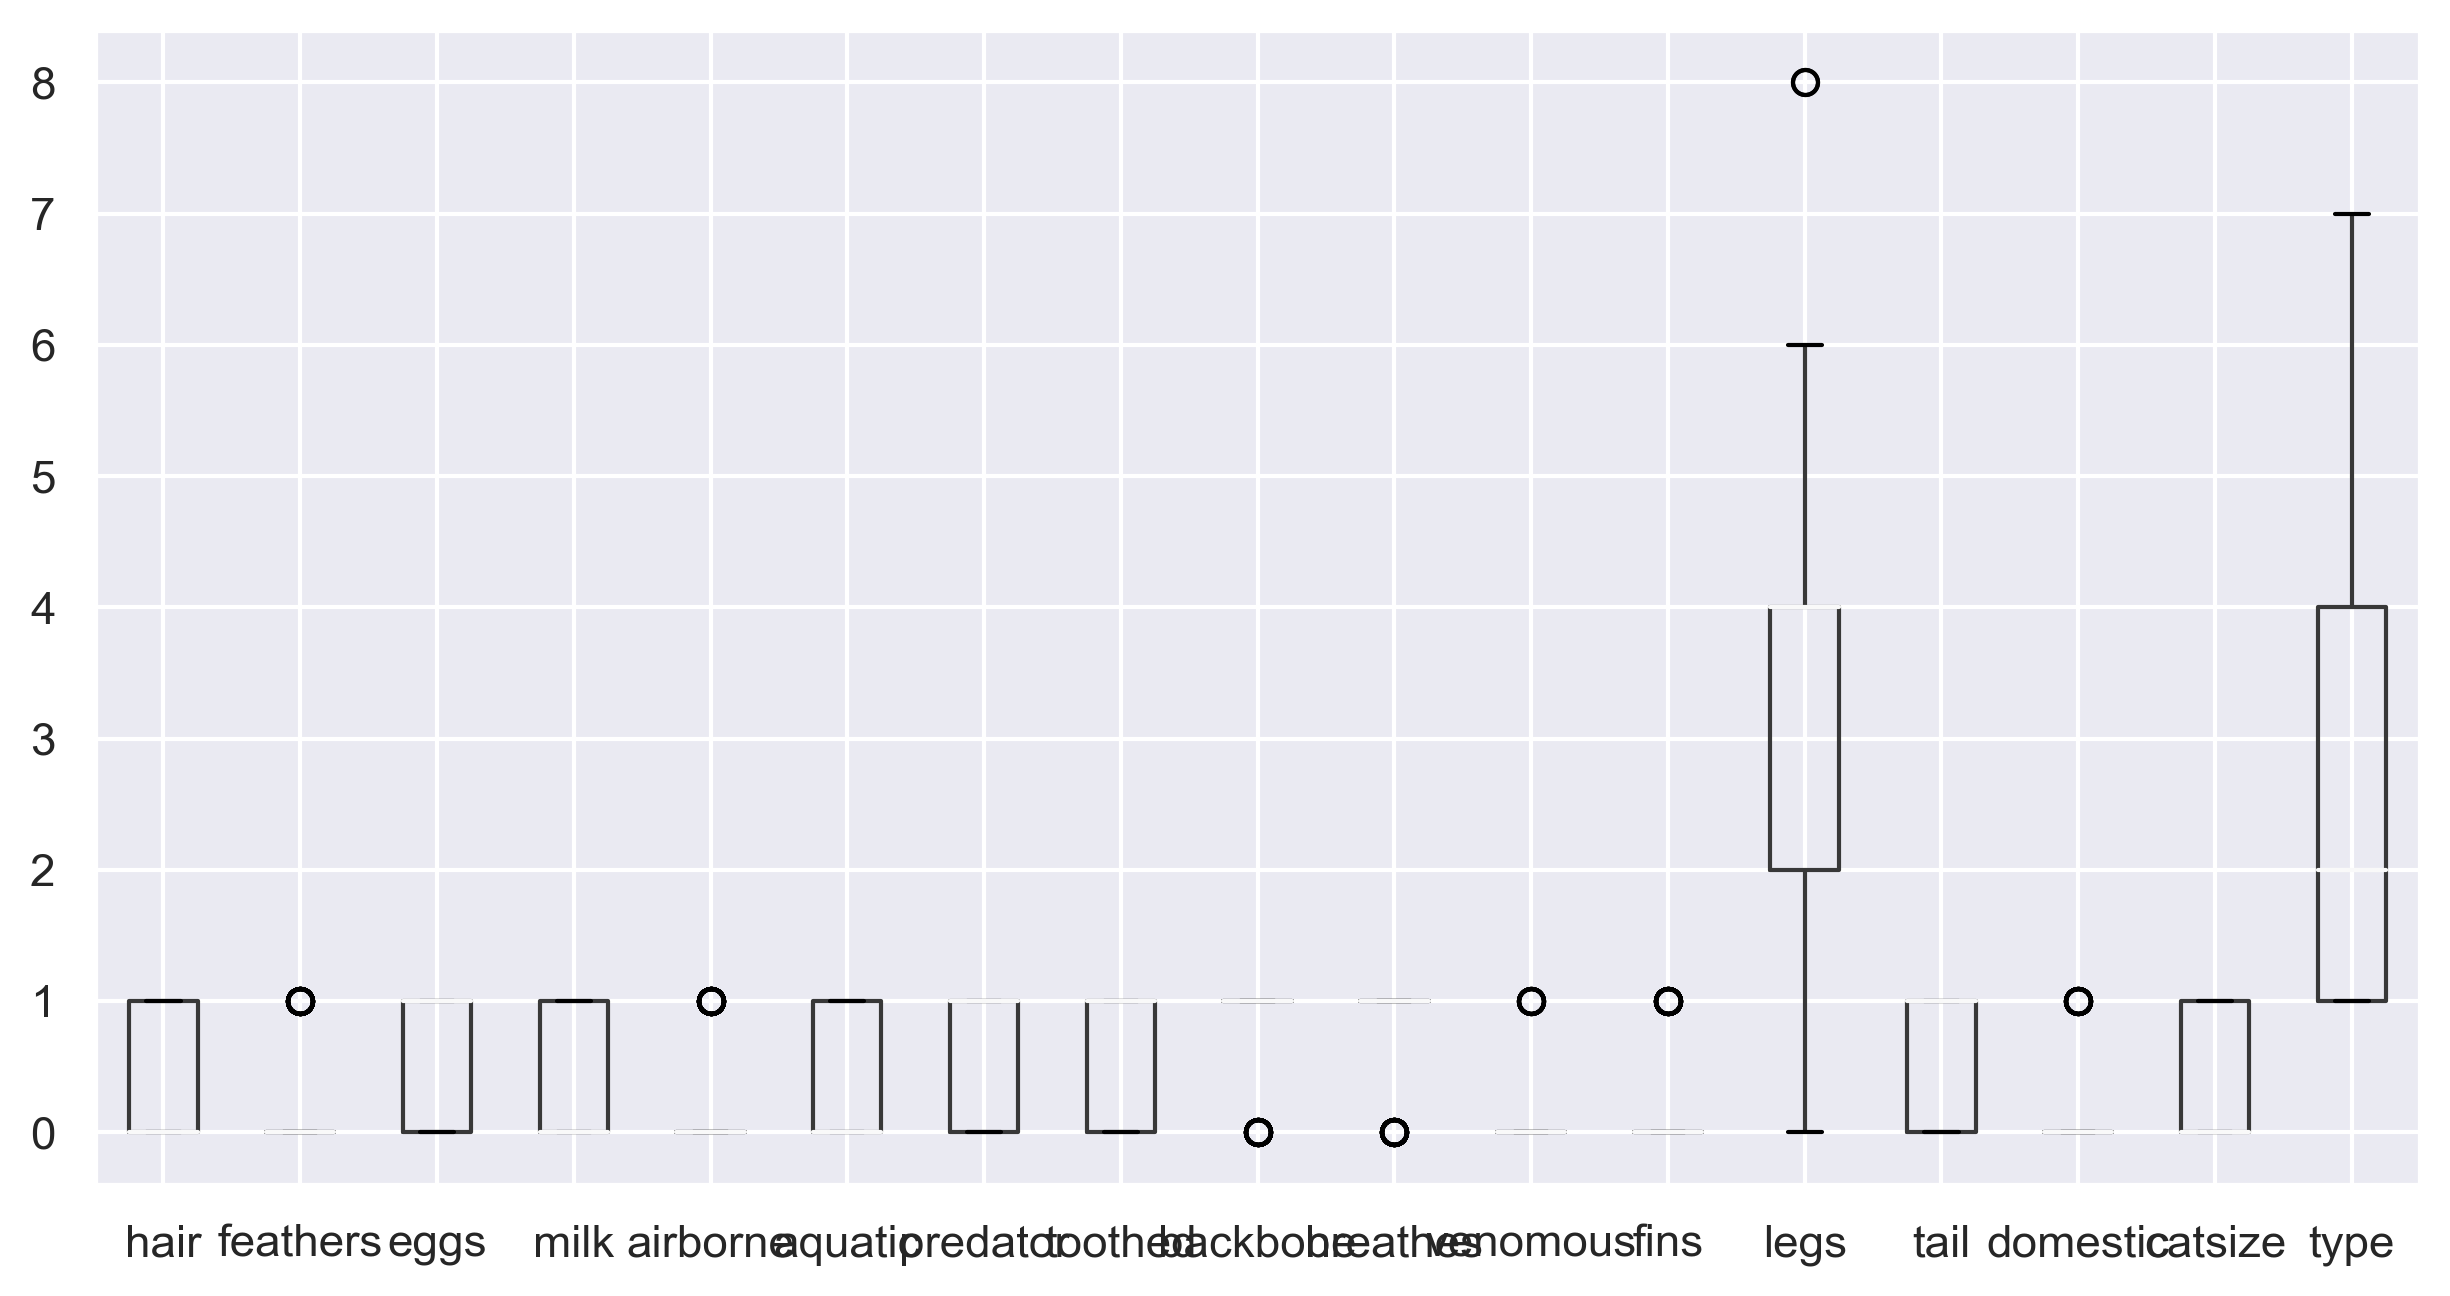

In [12]:
df.boxplot()

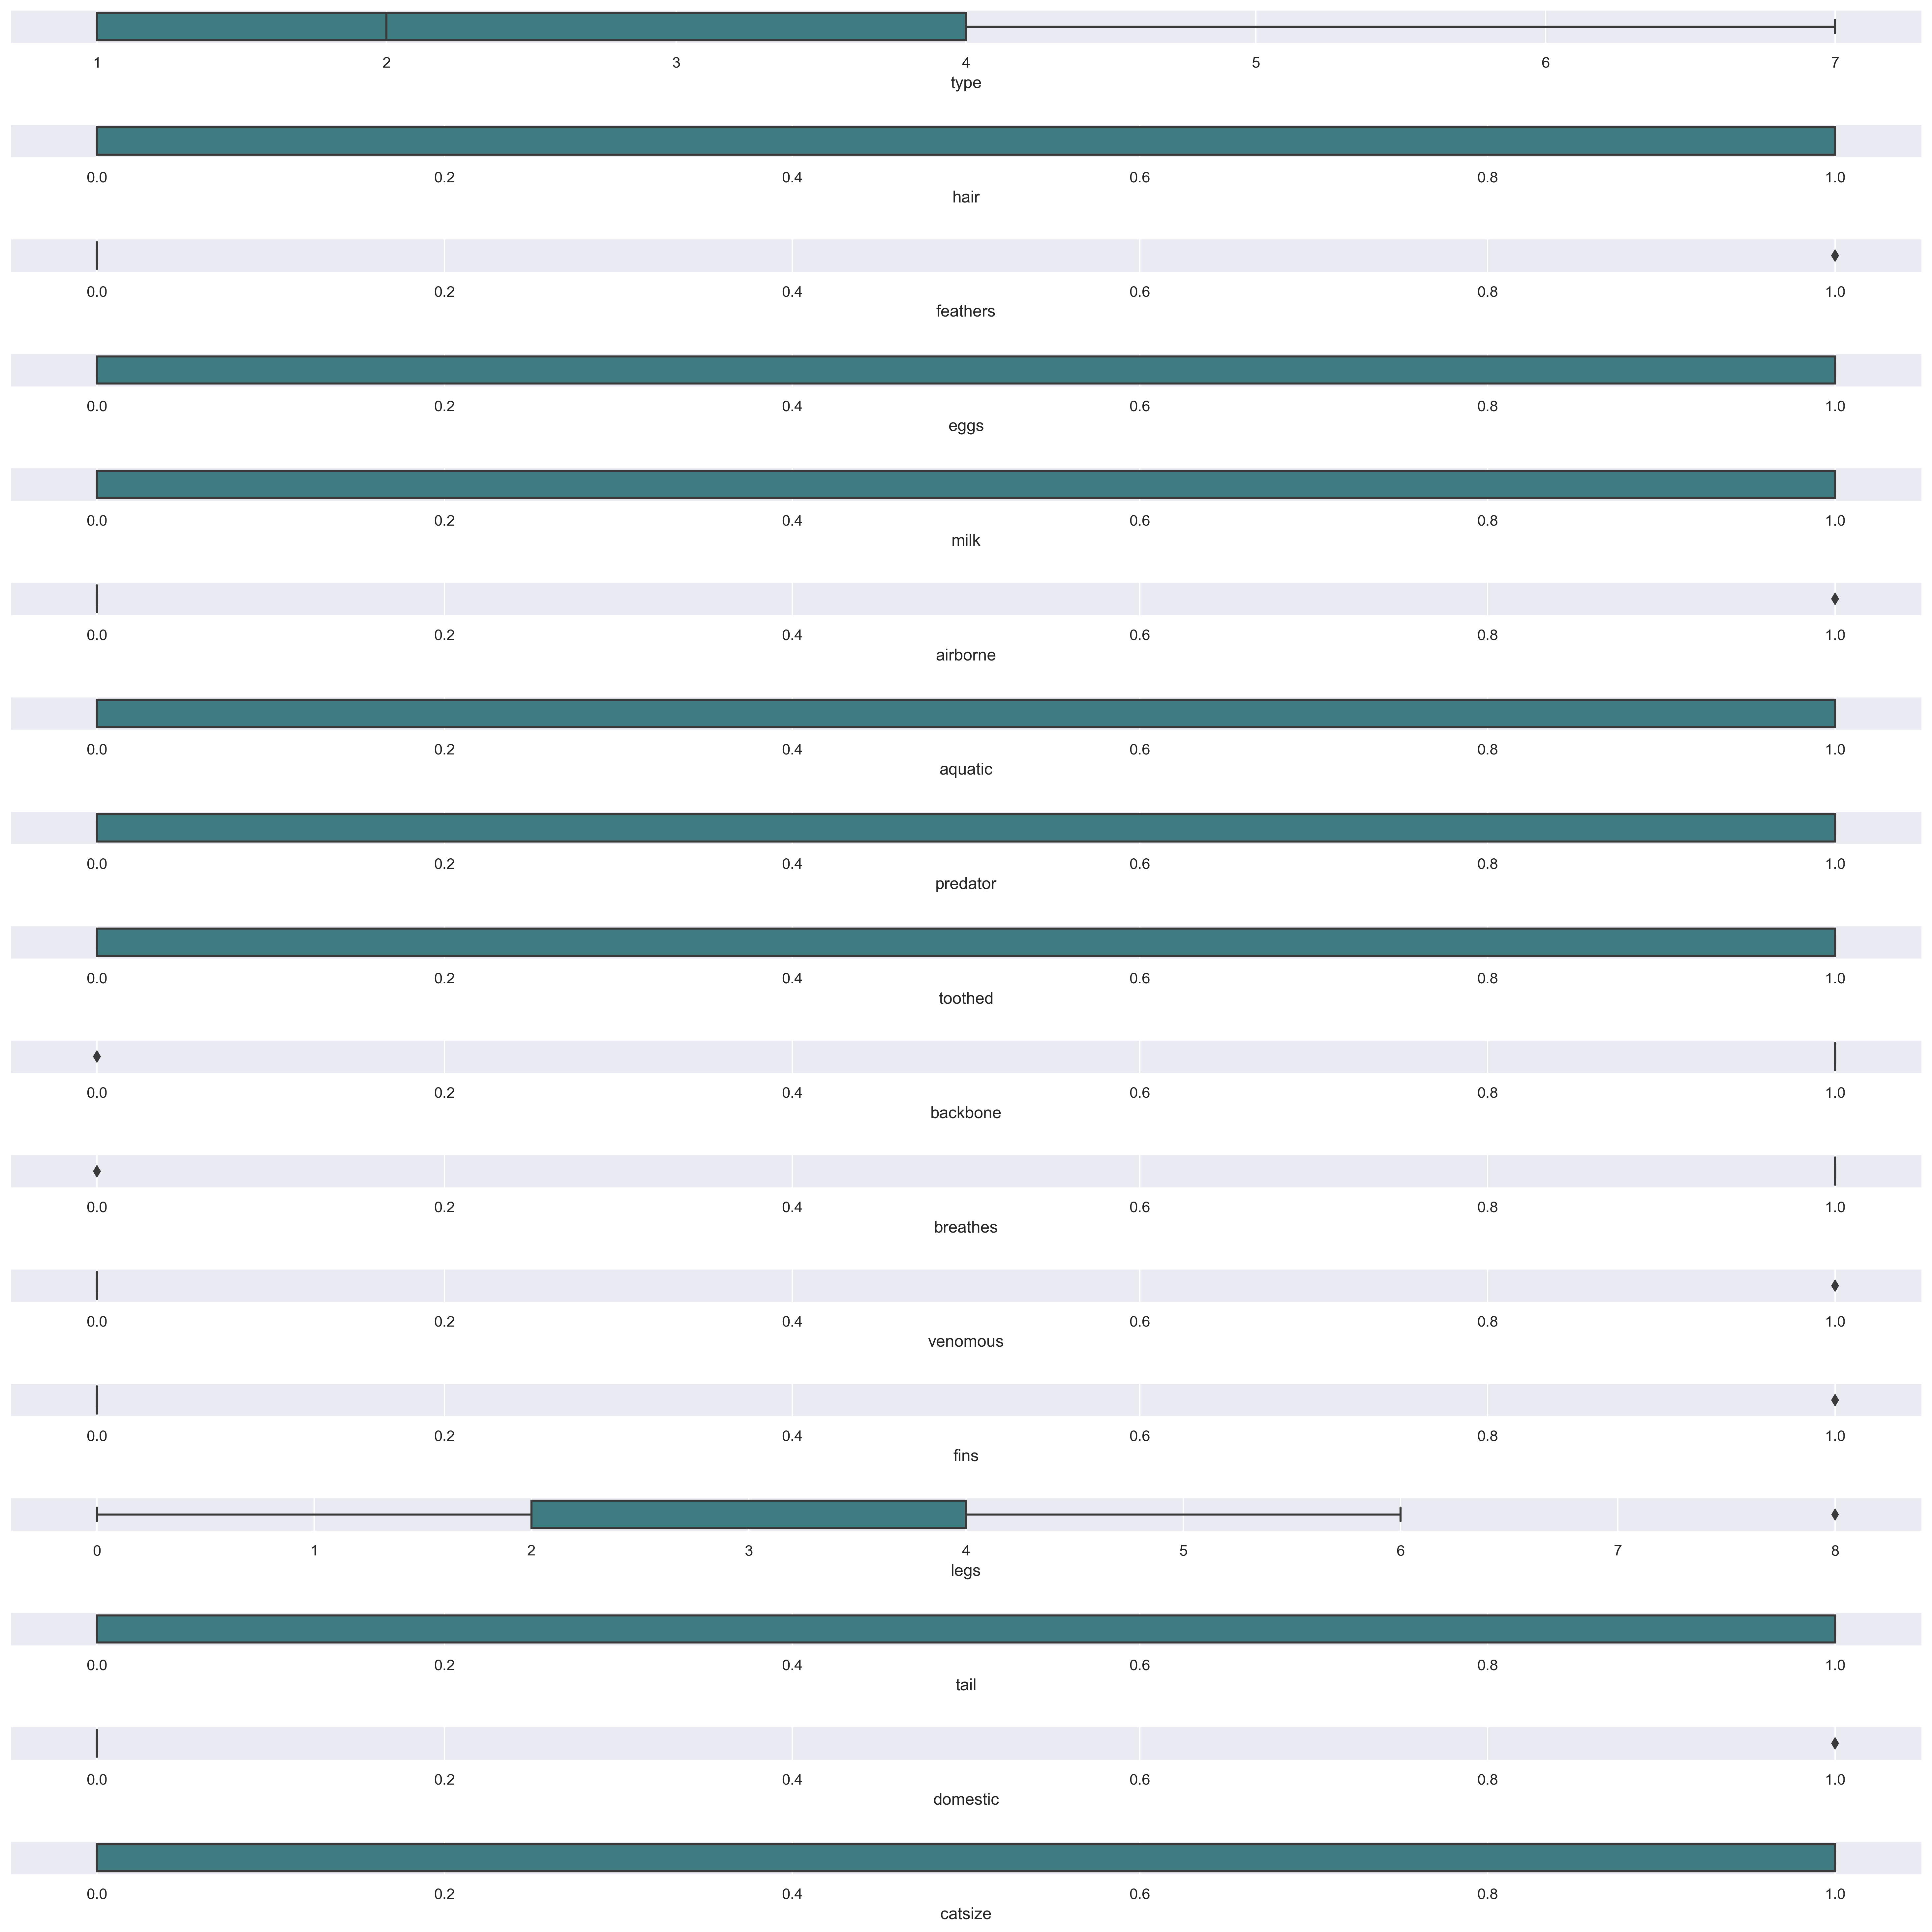

In [15]:
ot=df.copy() 
fig, axes=plt.subplots(17,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='type',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='hair',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='feathers',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='eggs',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='milk',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='airborne',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='aquatic',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='predator',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='toothed',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='backbone',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='breathes',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='venomous',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='fins',data=ot,palette='crest',ax=axes[12])
sns.boxplot(x='legs',data=ot,palette='crest',ax=axes[13])
sns.boxplot(x='tail',data=ot,palette='crest',ax=axes[14])
sns.boxplot(x='domestic',data=ot,palette='crest',ax=axes[15])
sns.boxplot(x='catsize',data=ot,palette='crest',ax=axes[16])
plt.tight_layout(pad=2.0)

# Outlier detection function

In [16]:
def outlier_detection(data, colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower, upper

In [18]:
outlier_detection(df, "feathers")

(0.0, 0.0)

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

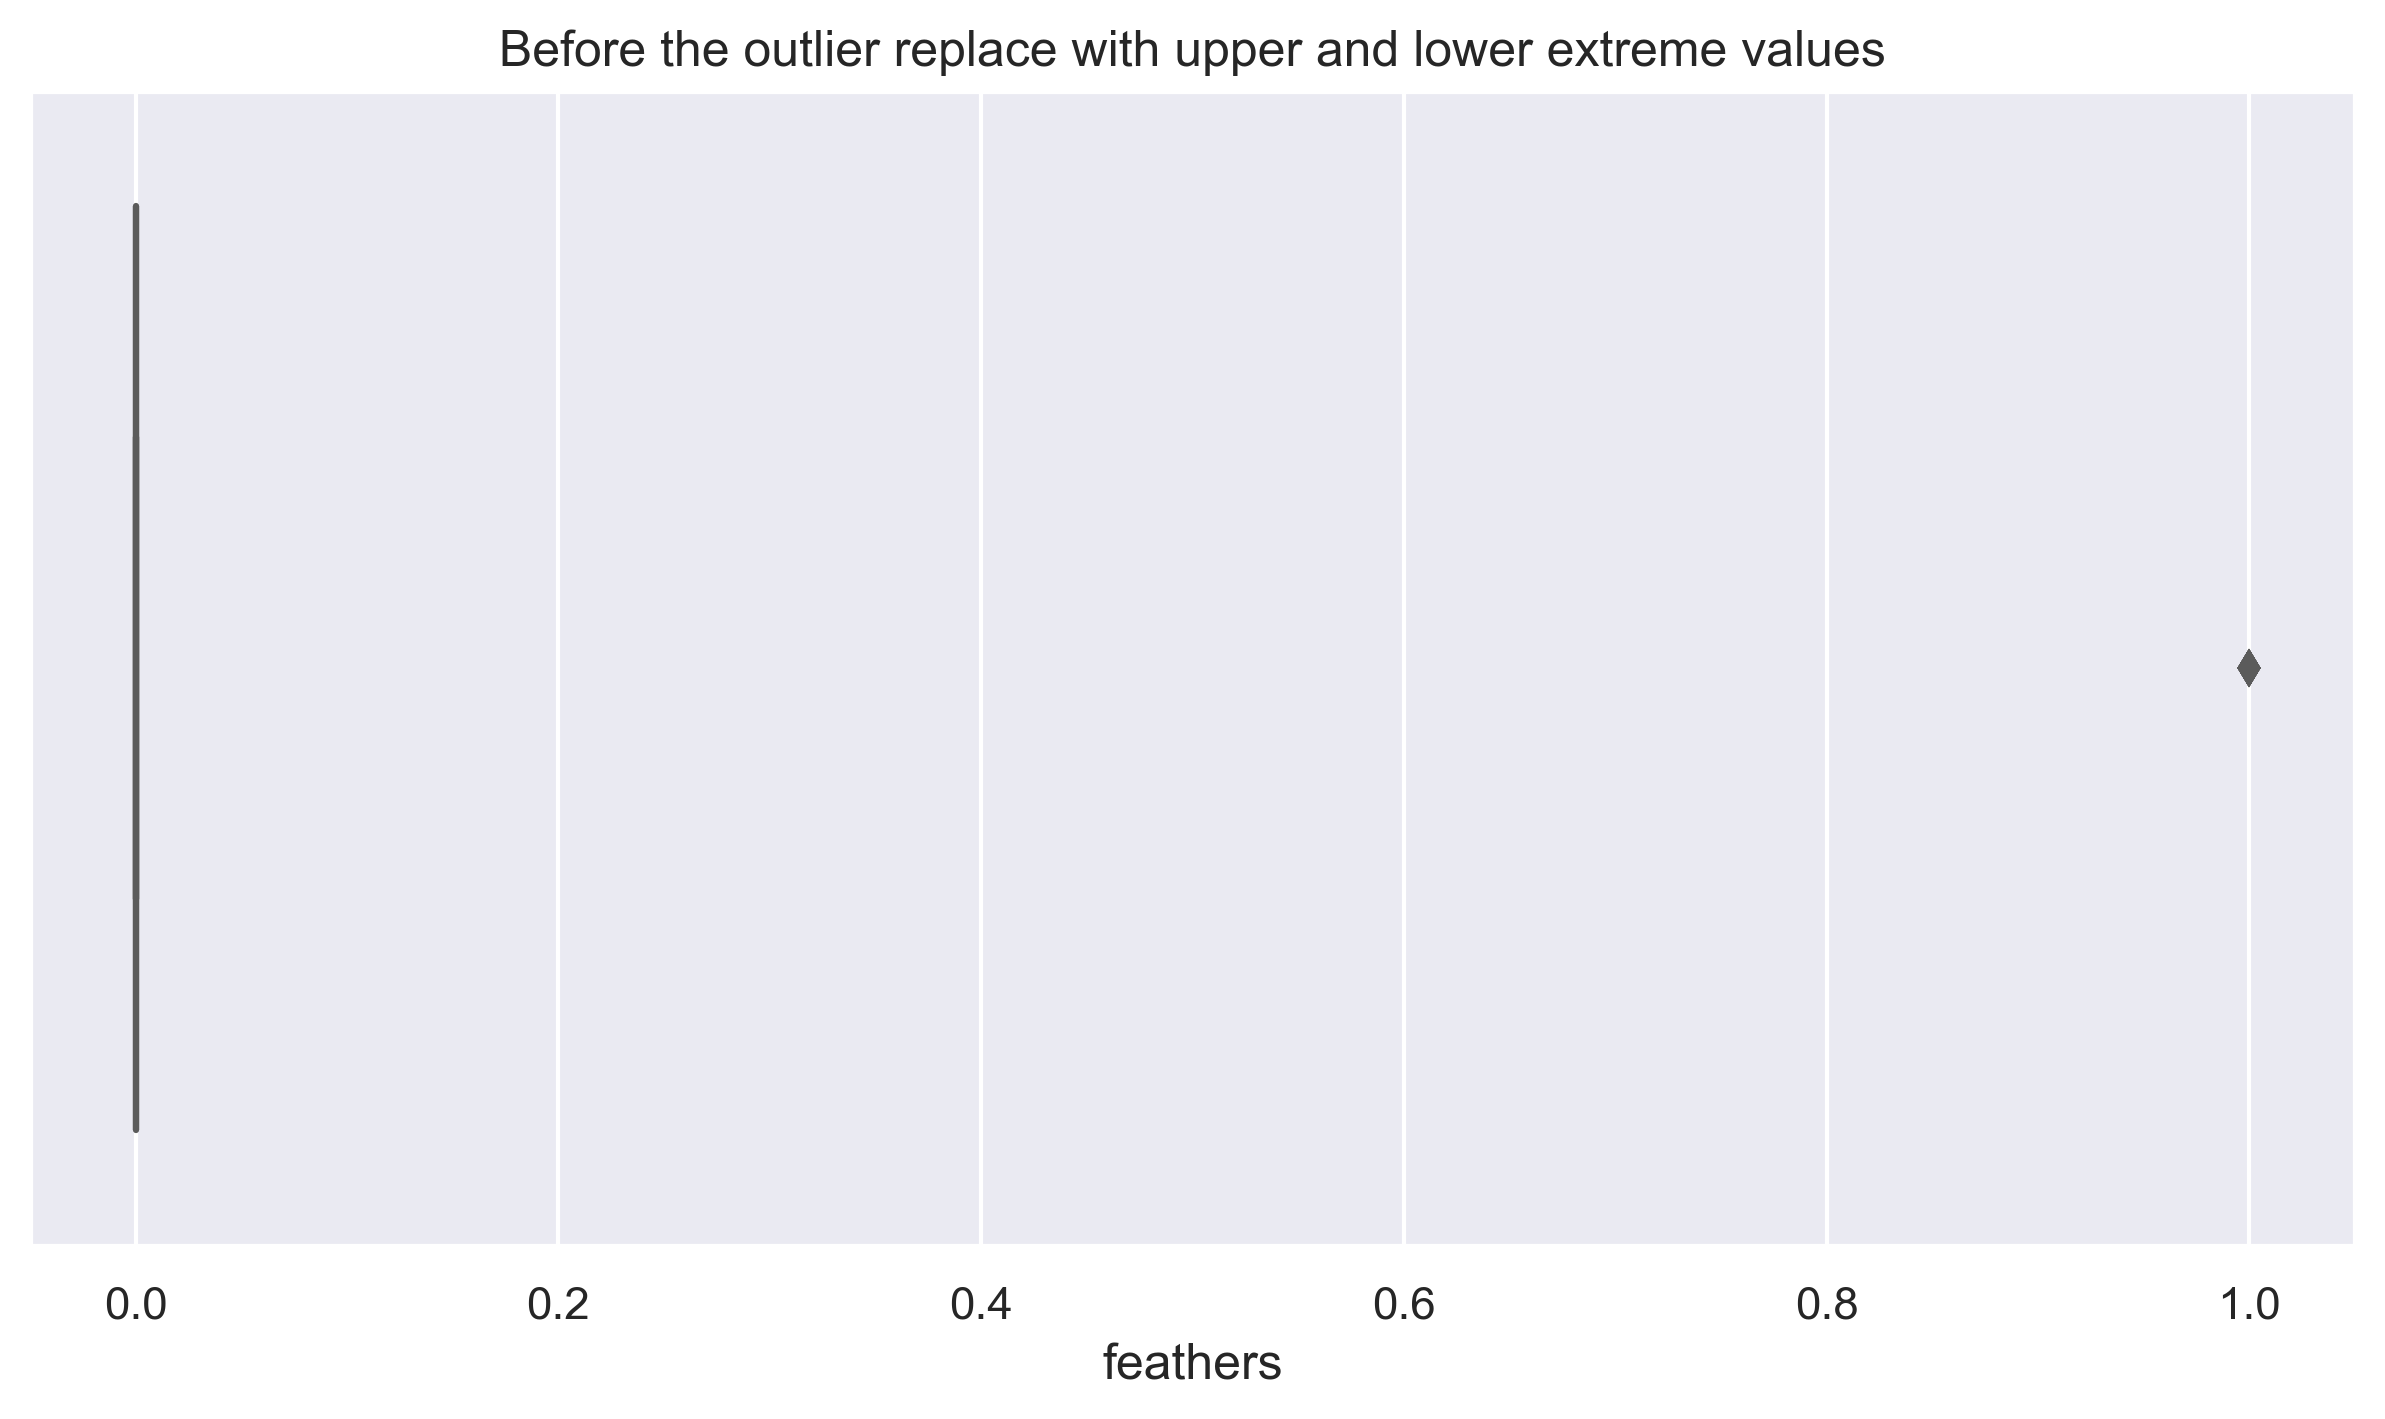

In [19]:
sns.boxplot(x = df["feathers"])
plt.xlabel("feathers")
plt.title("Before the outlier replace with upper and lower extreme values")

In [23]:
df.loc[df["feathers"]>0.0, "feathers"] = 0.0

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

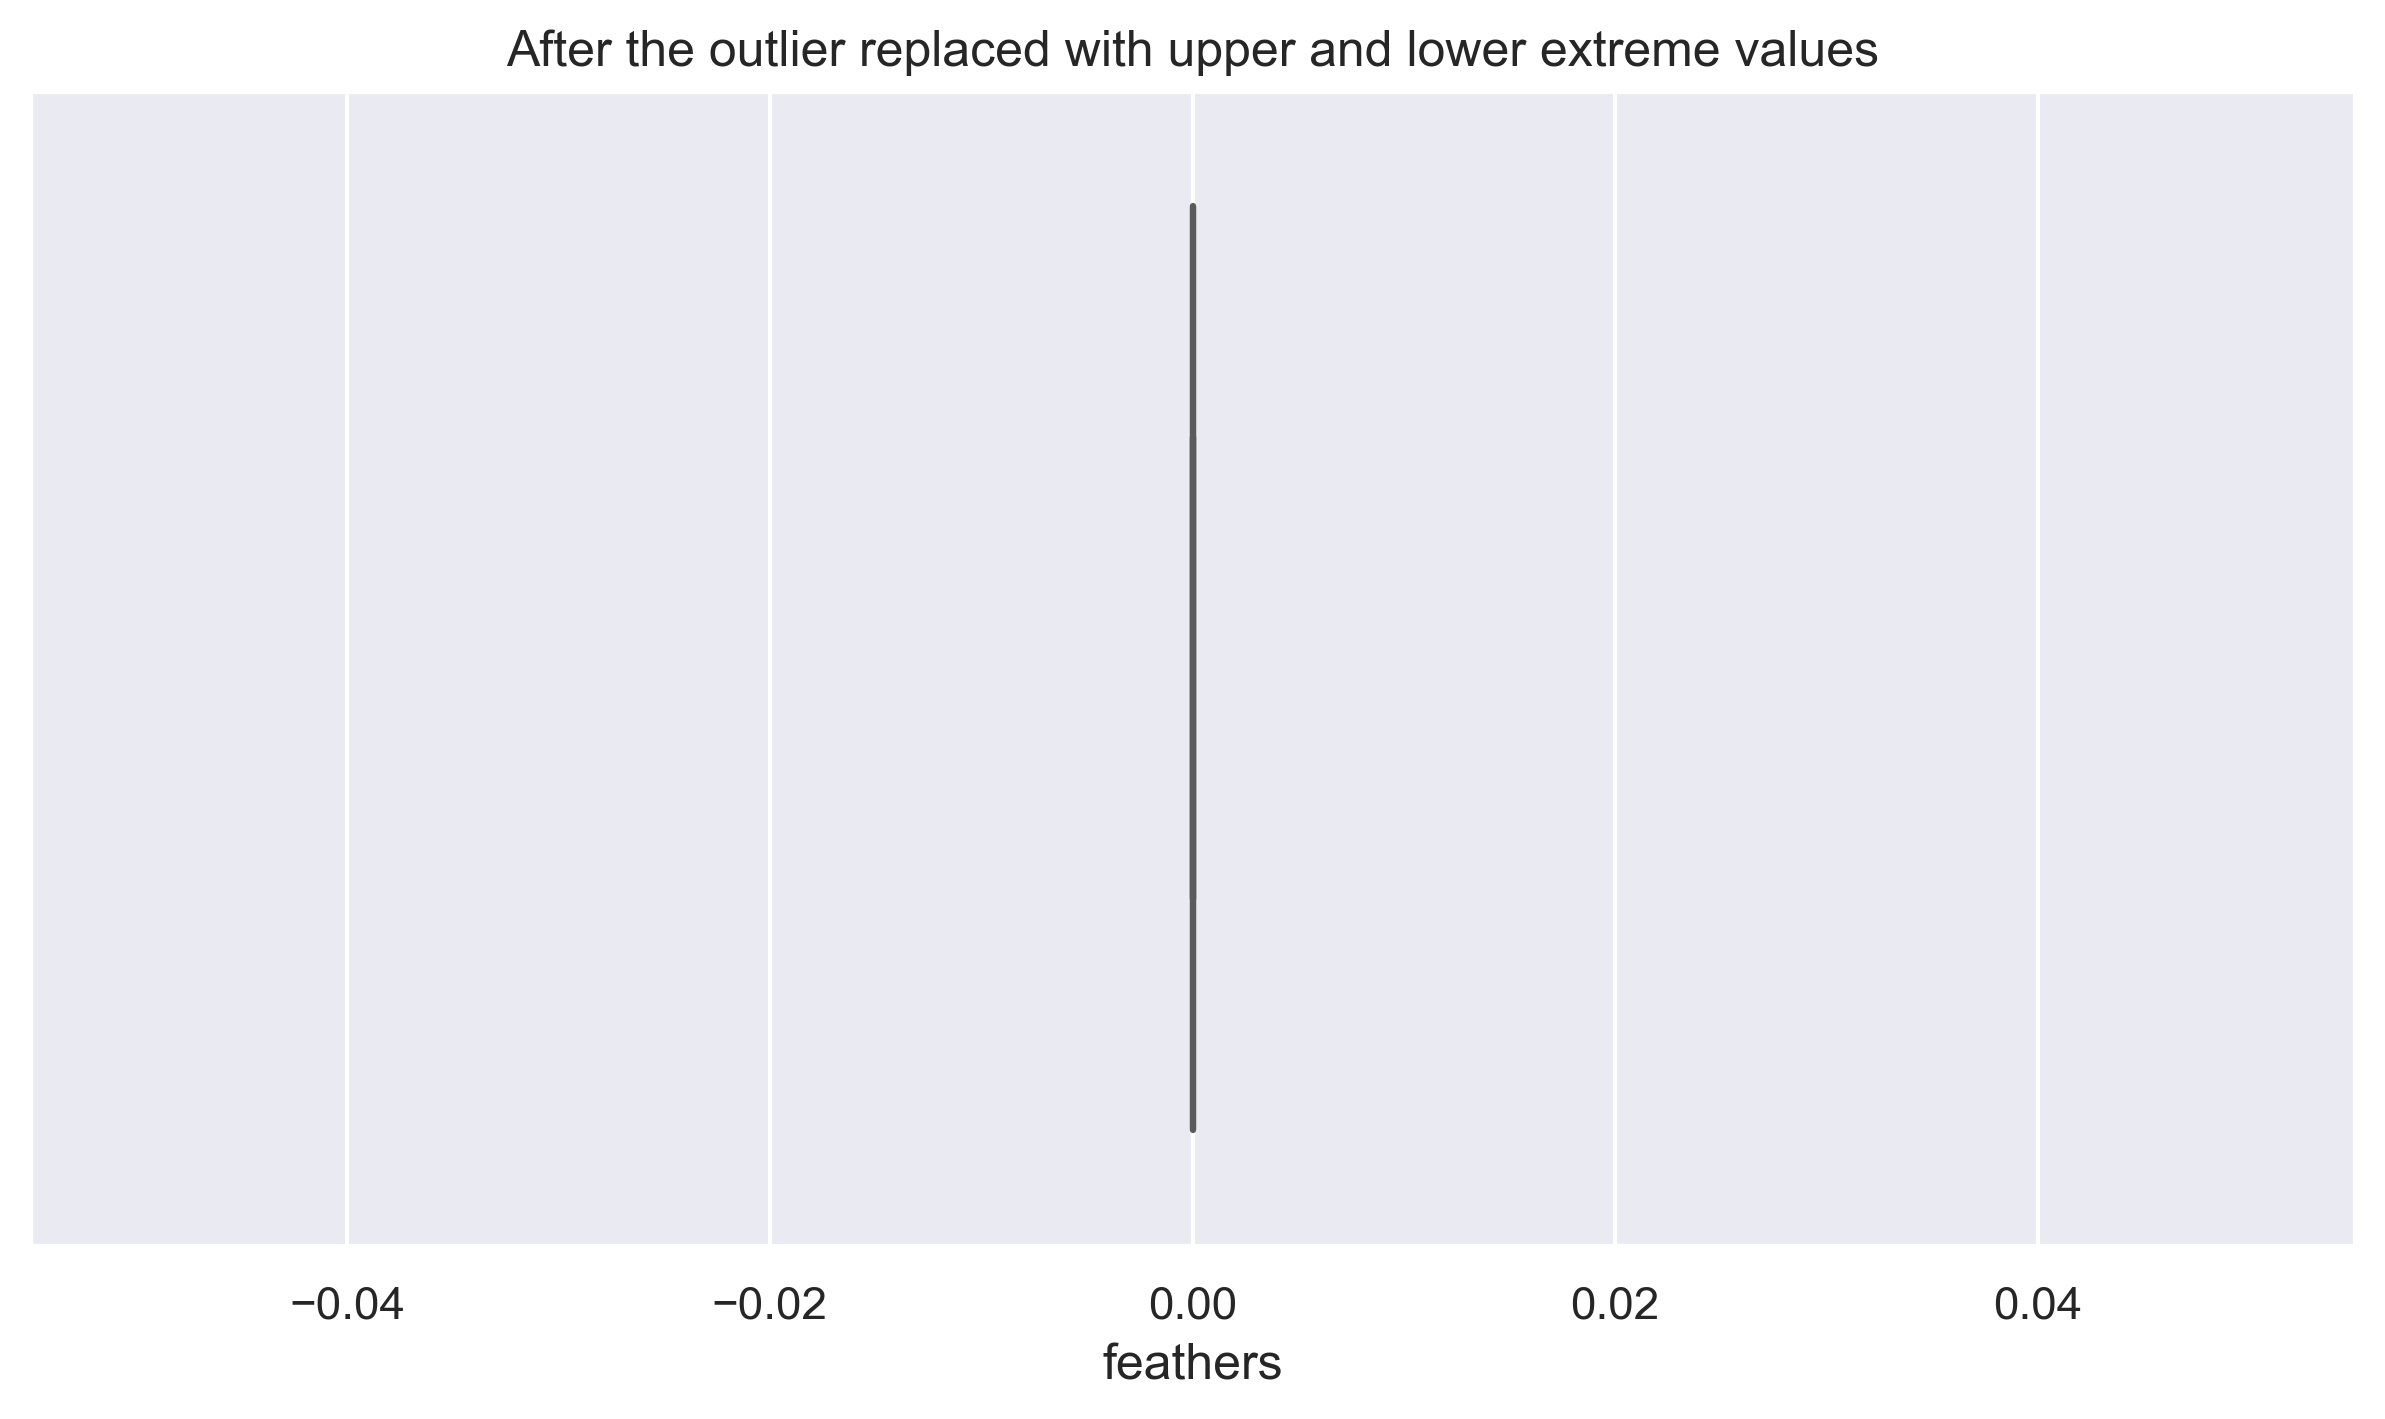

In [24]:
sns.boxplot(x = df["feathers"])
plt.xlabel("feathers")
plt.title("After the outlier replaced with upper and lower extreme values")

In [25]:
outlier_detection(df, "airborne")

(0.0, 0.0)

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

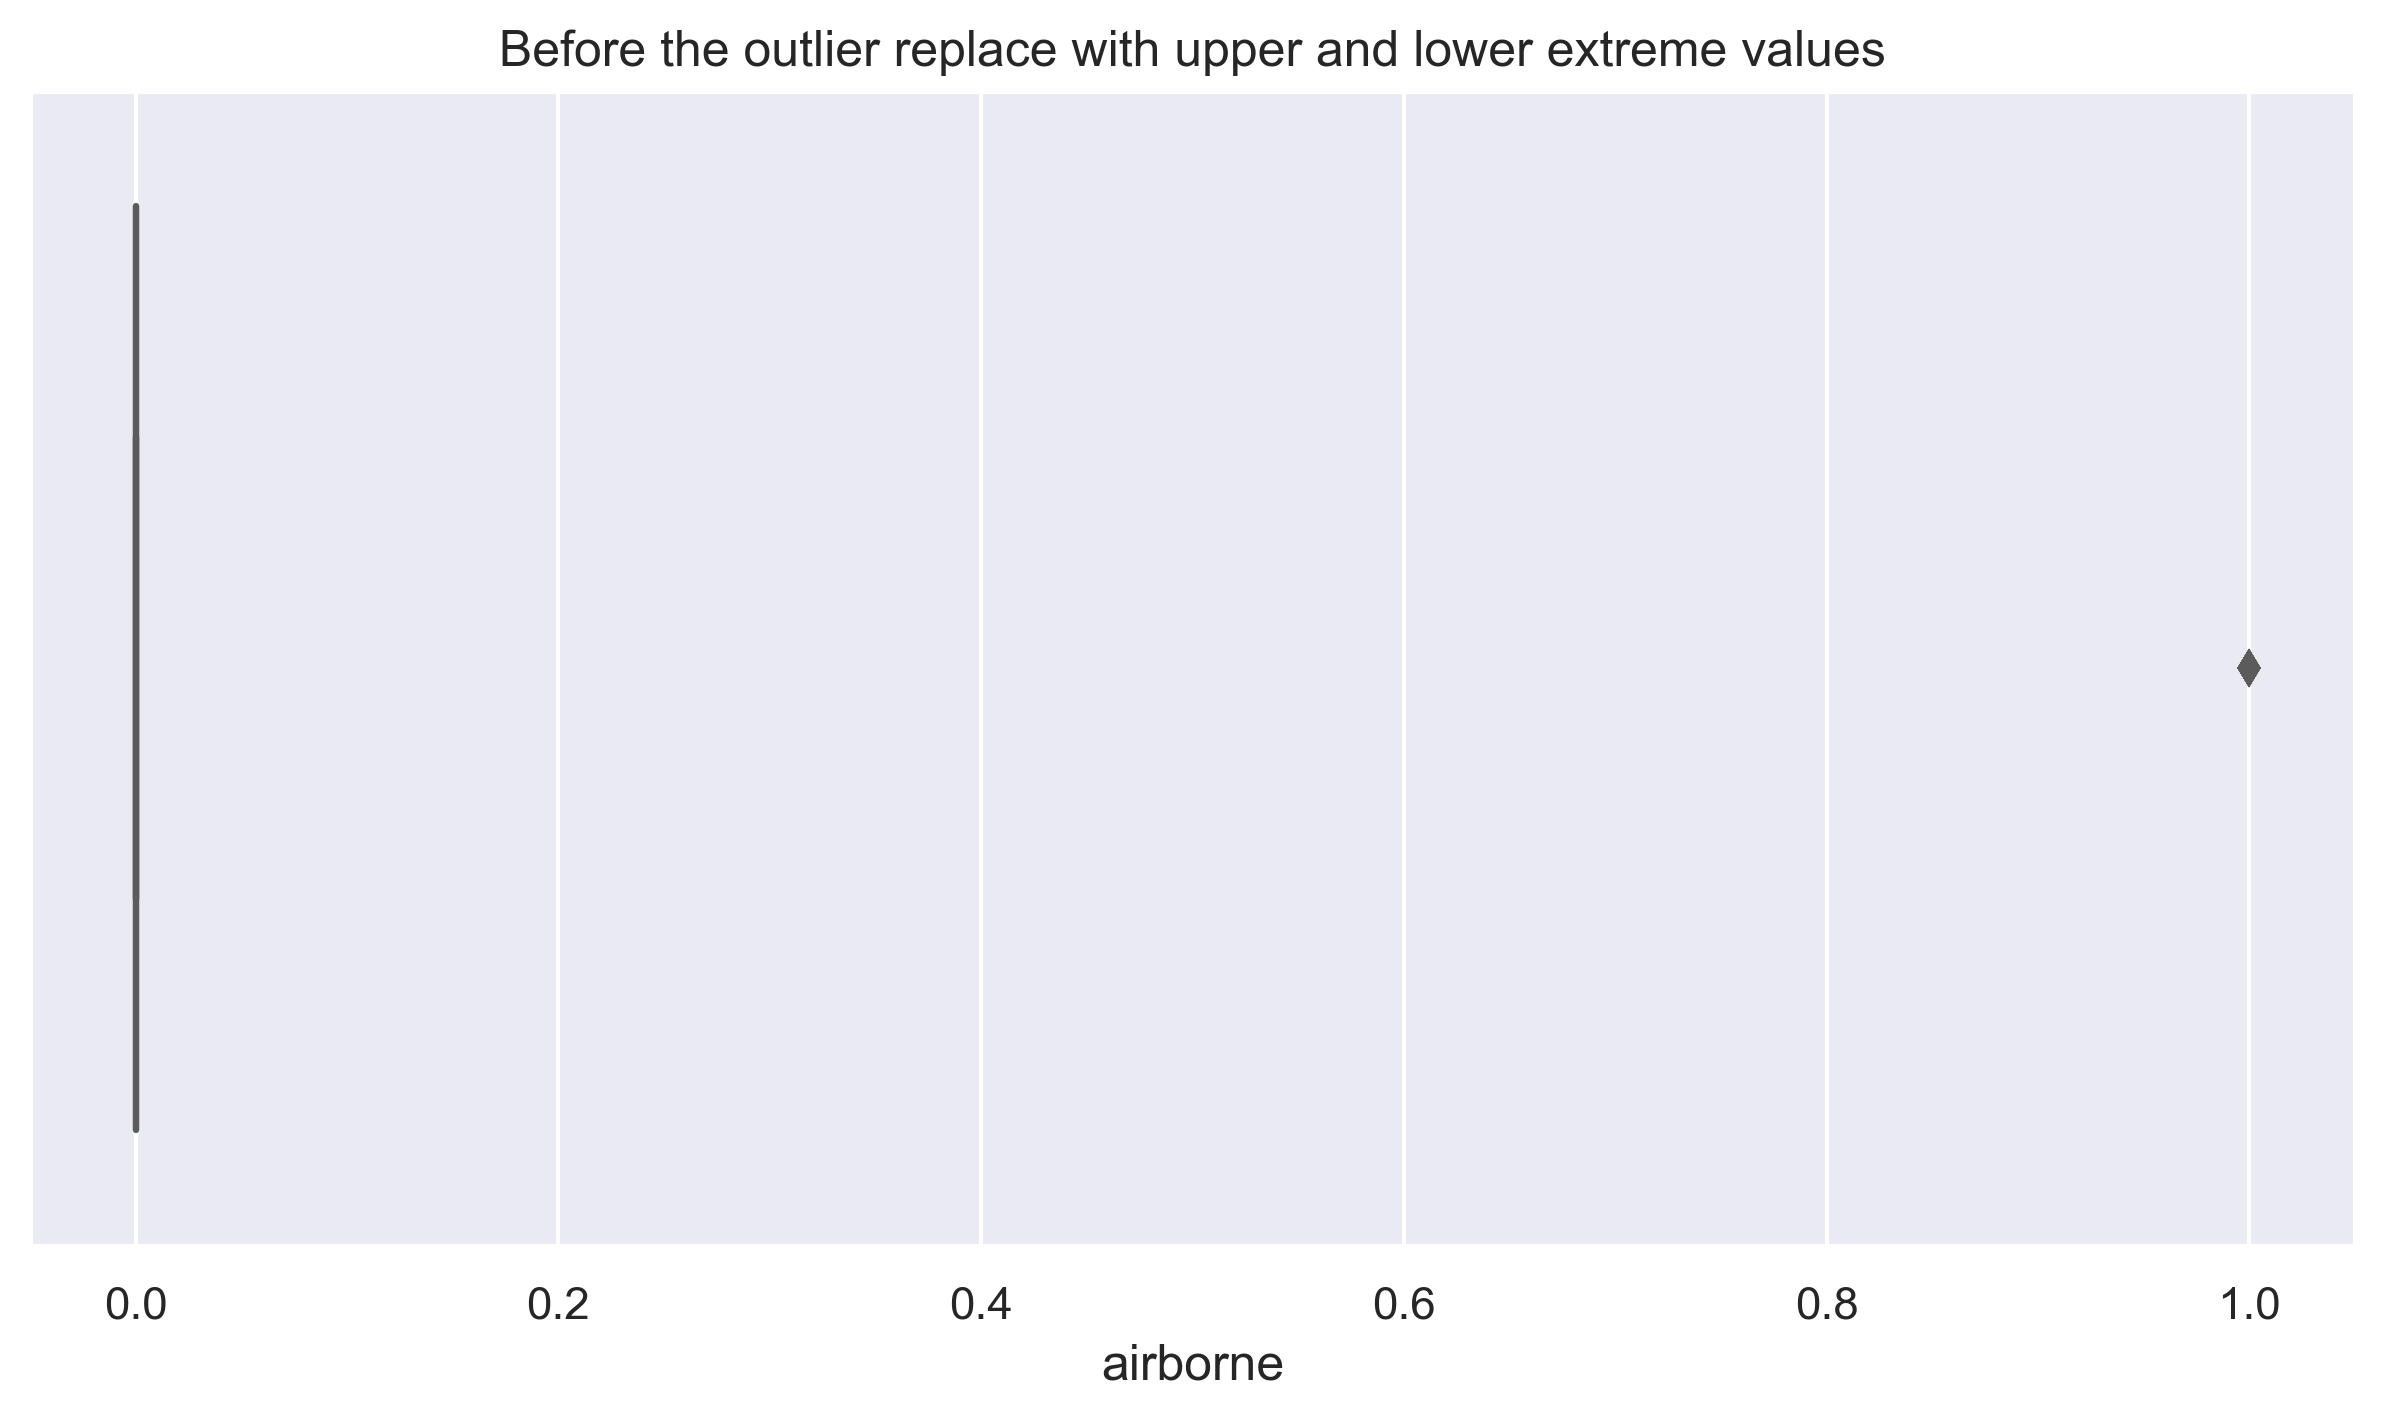

In [26]:
sns.boxplot(x = df["airborne"])
plt.xlabel("airborne")
plt.title("Before the outlier replace with upper and lower extreme values")

In [28]:
df.loc[df["airborne"]>0.0, "airborne"] = 0.0

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

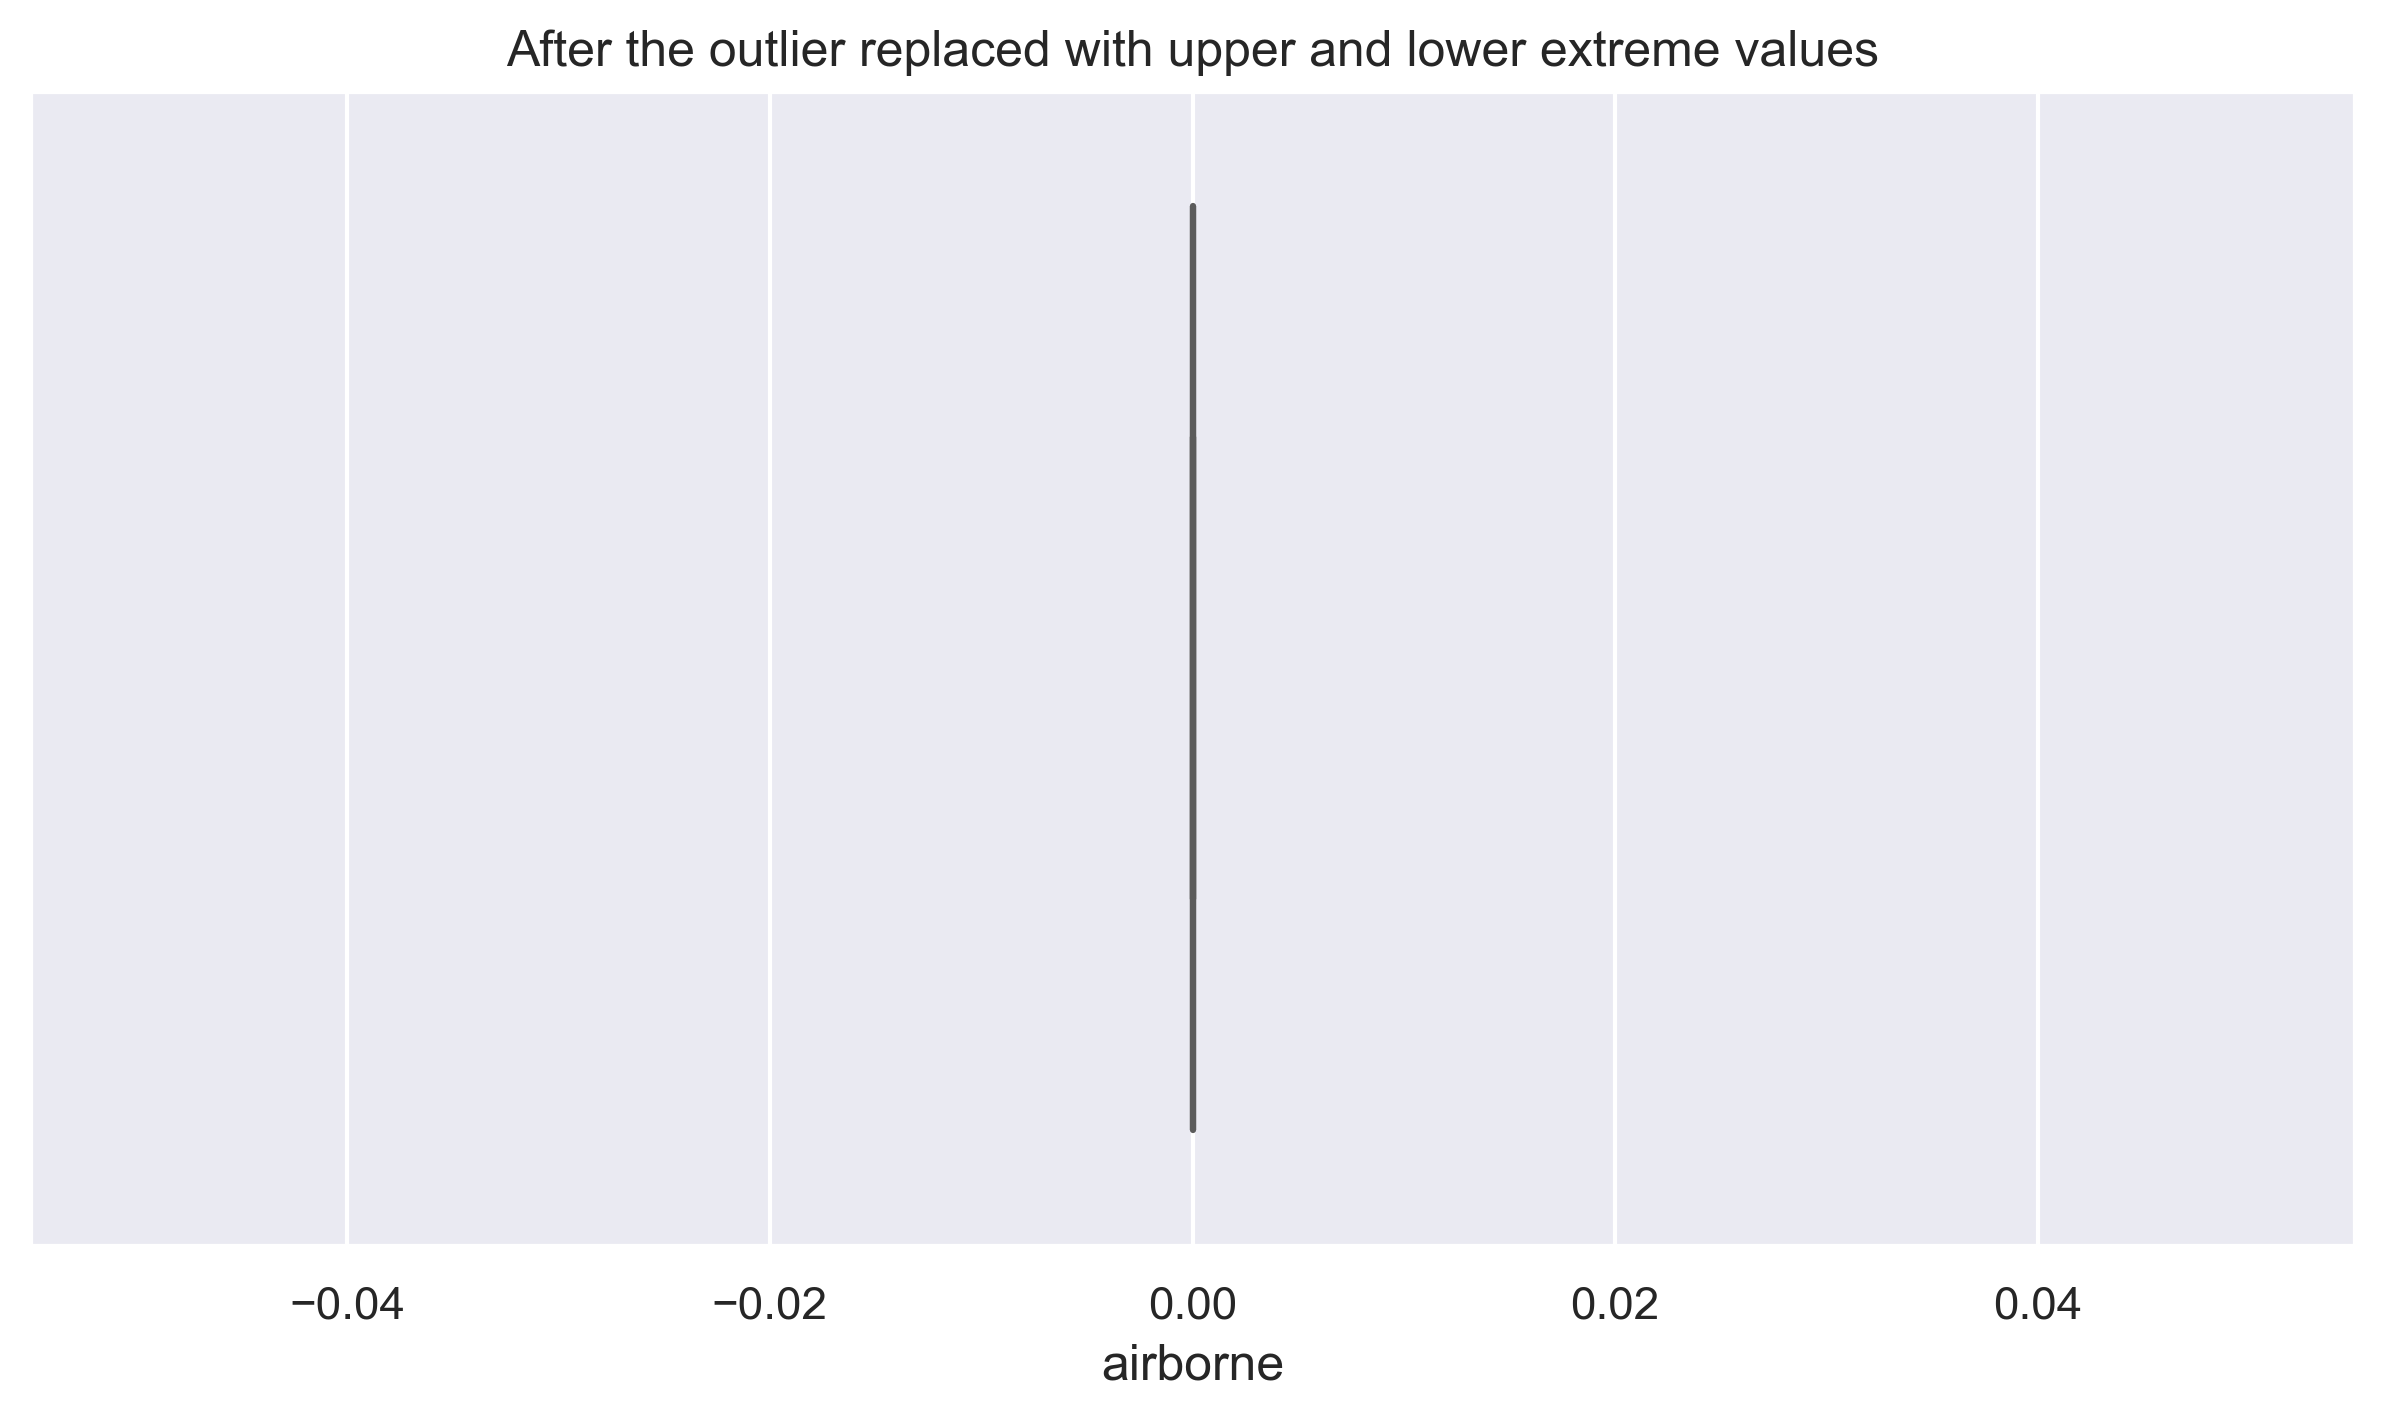

In [29]:
sns.boxplot(x = df["airborne"])
plt.xlabel("airborne")
plt.title("After the outlier replaced with upper and lower extreme values")

In [30]:
outlier_detection(df, "backbone")

(1.0, 1.0)

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

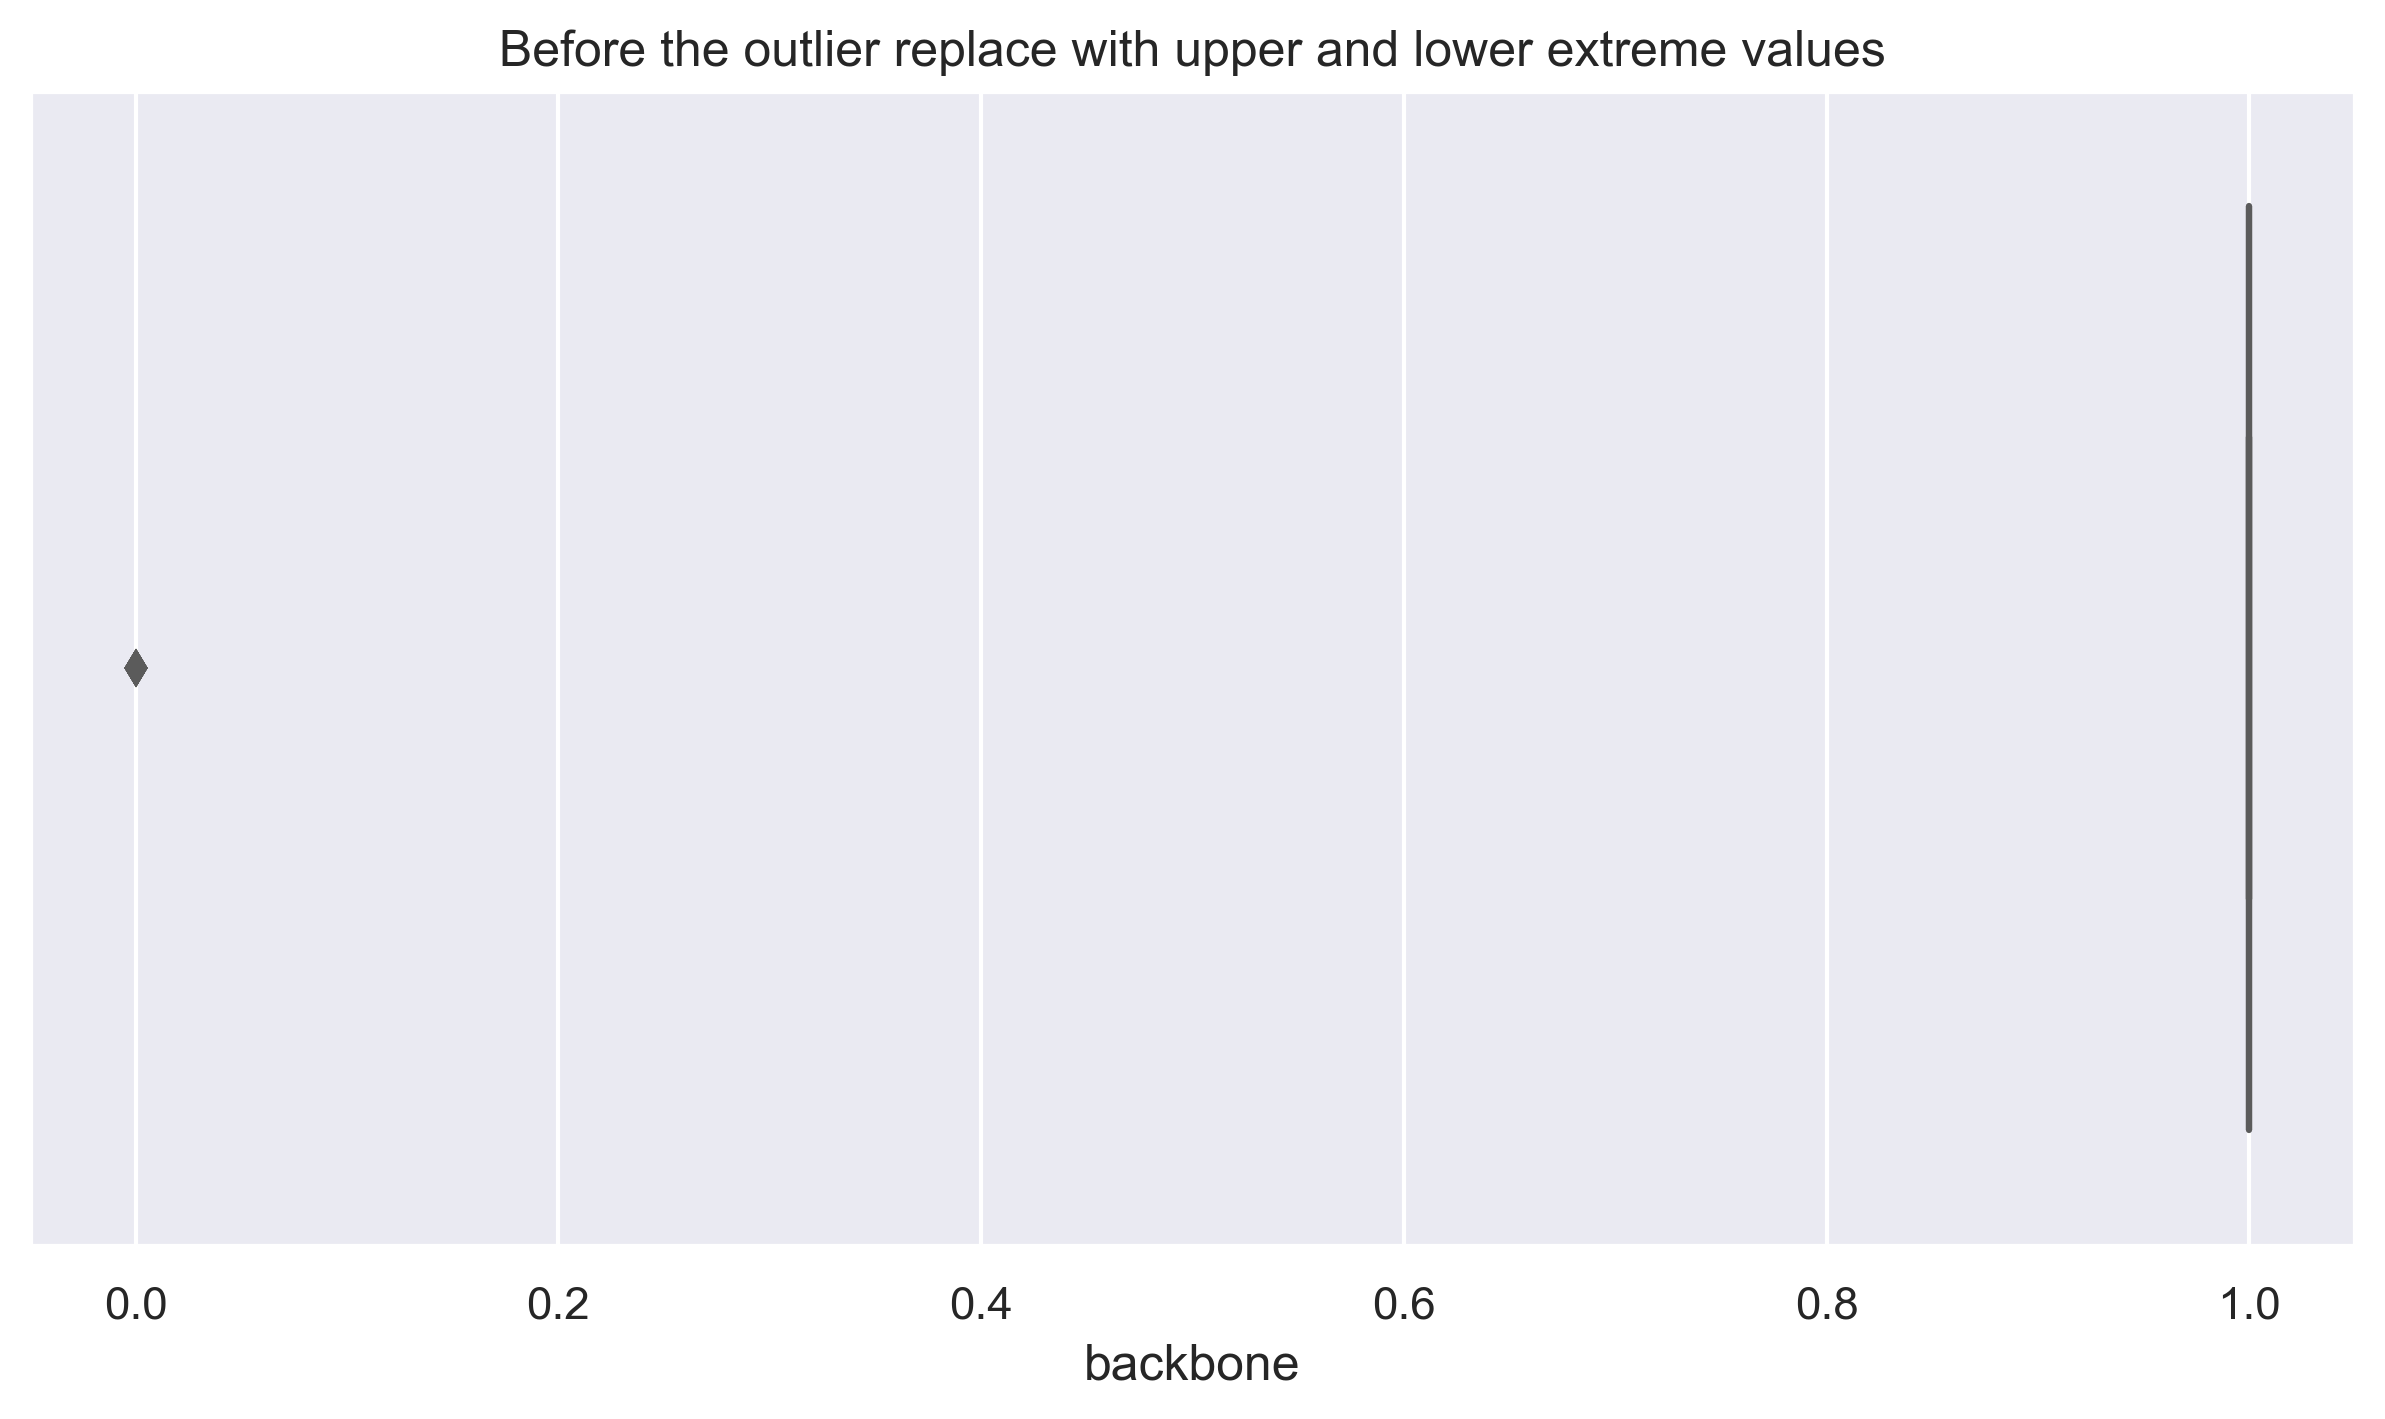

In [31]:
sns.boxplot(x = df["backbone"])
plt.xlabel("backbone")
plt.title("Before the outlier replace with upper and lower extreme values")

In [38]:
df.loc[df["backbone"]<1.0, "backbone"] = 1.0

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

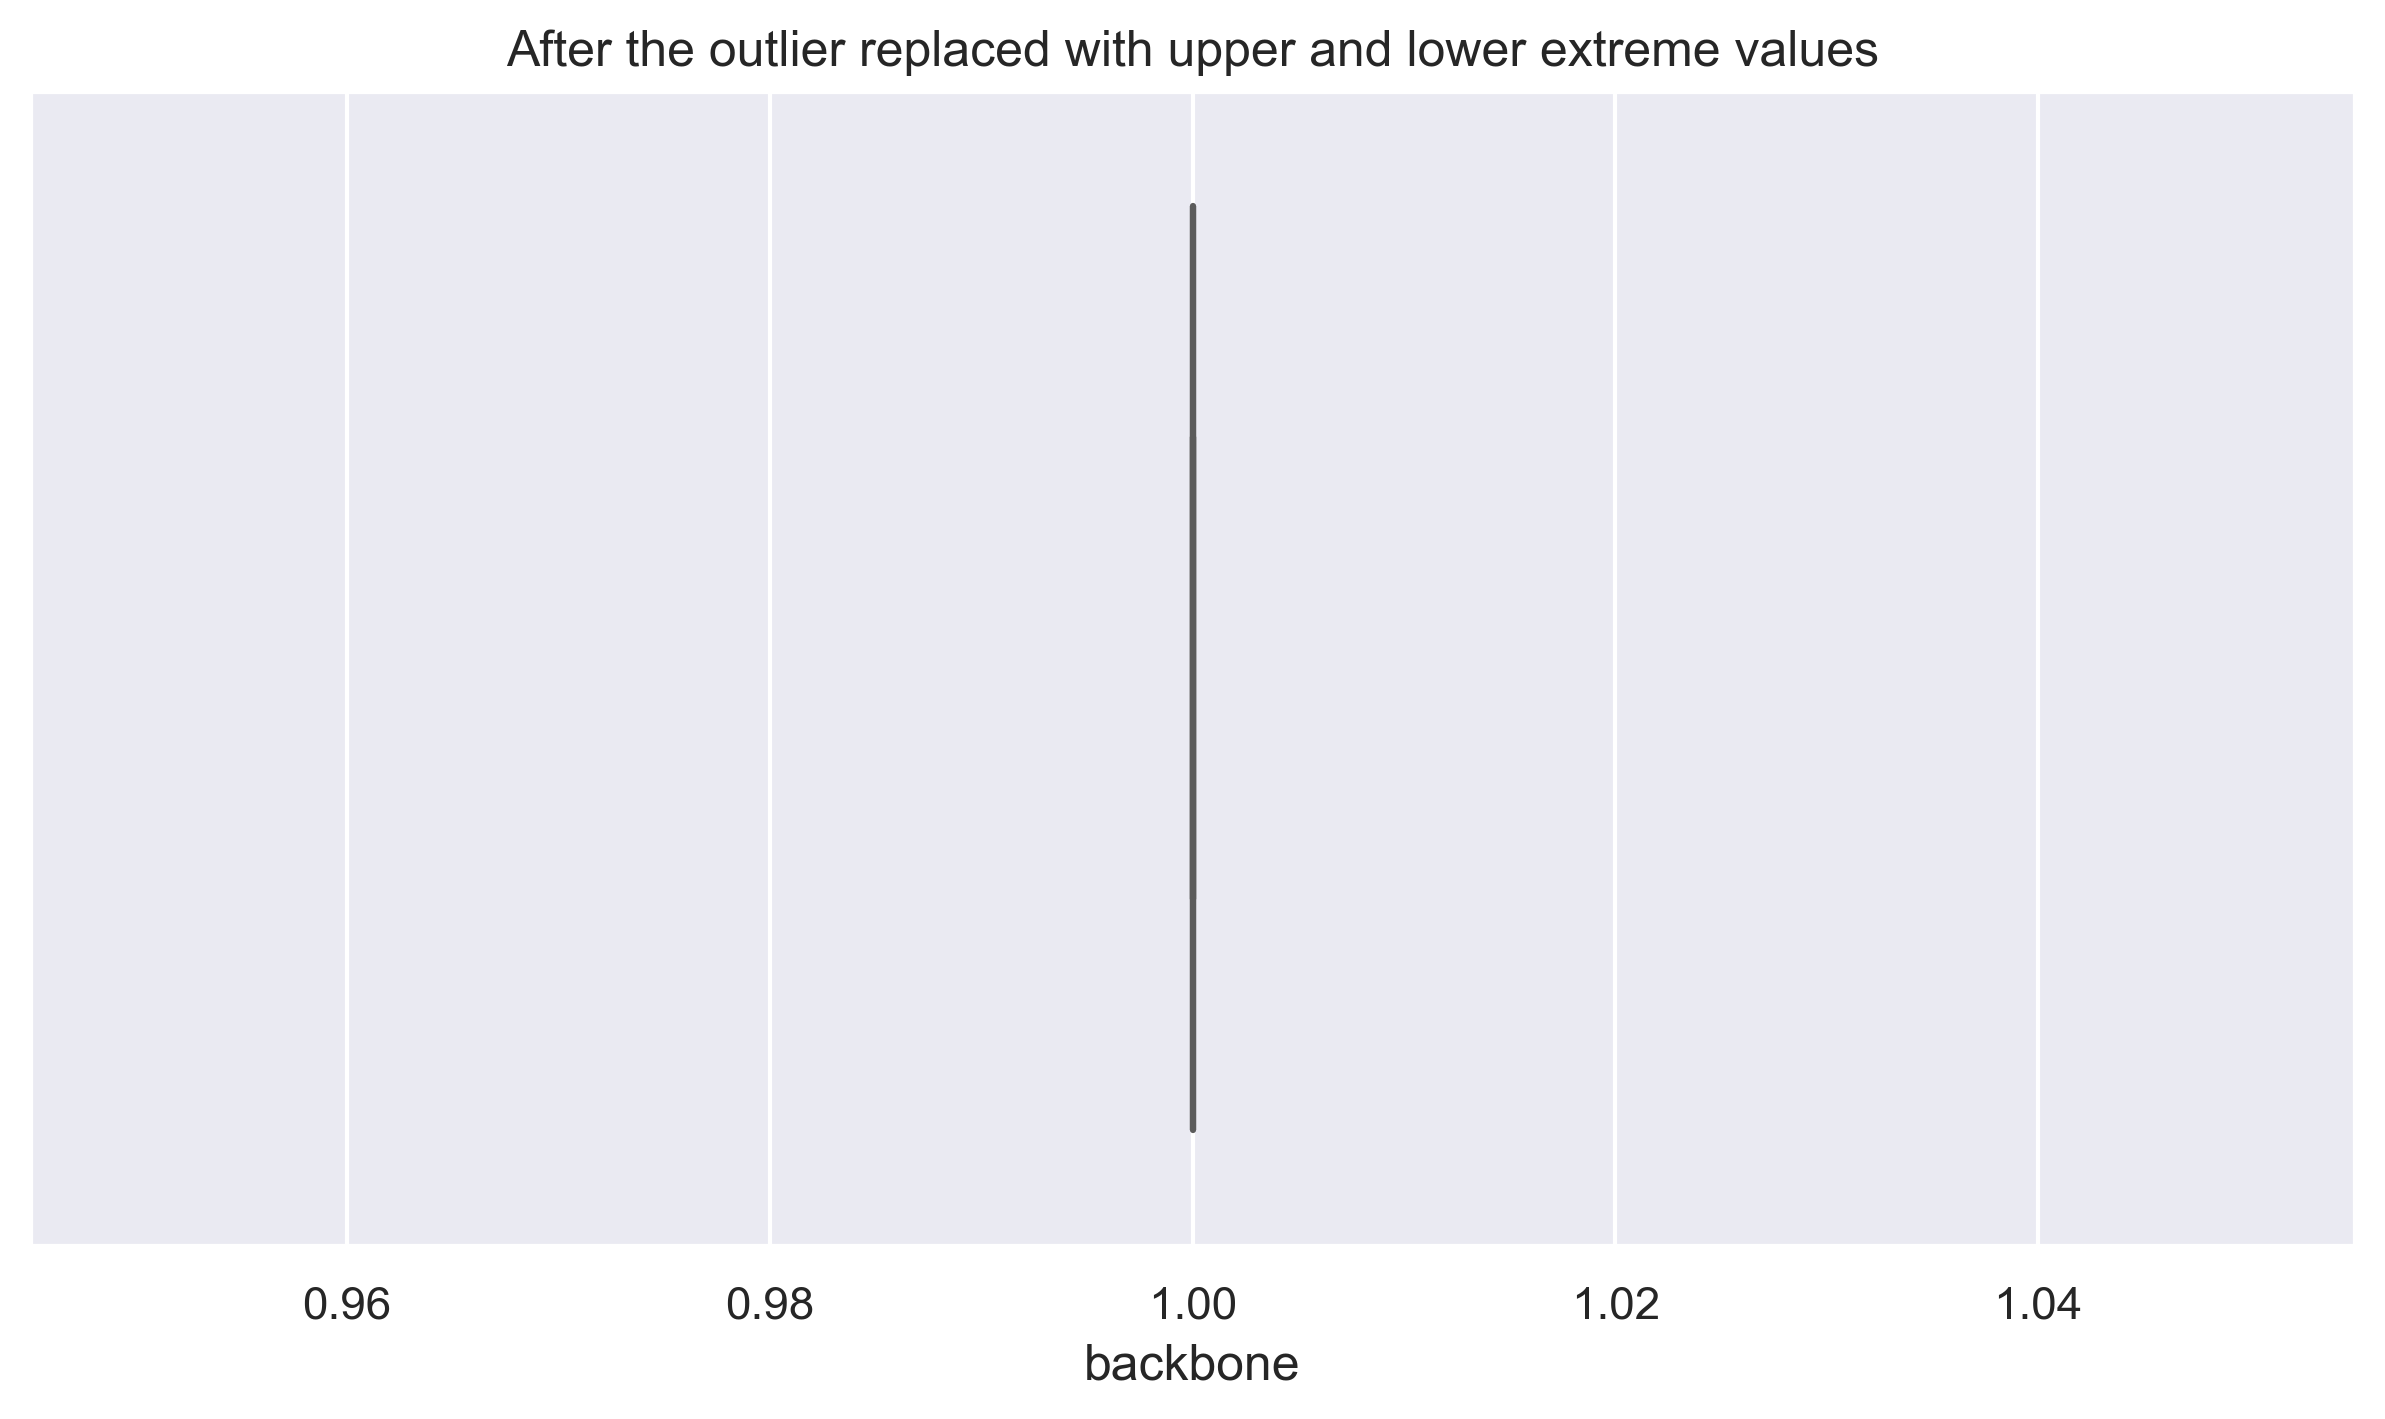

In [39]:
sns.boxplot(x = df["backbone"])
plt.xlabel("backbone")
plt.title("After the outlier replaced with upper and lower extreme values")

In [40]:
outlier_detection(df, "breathes")

(1.0, 1.0)

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

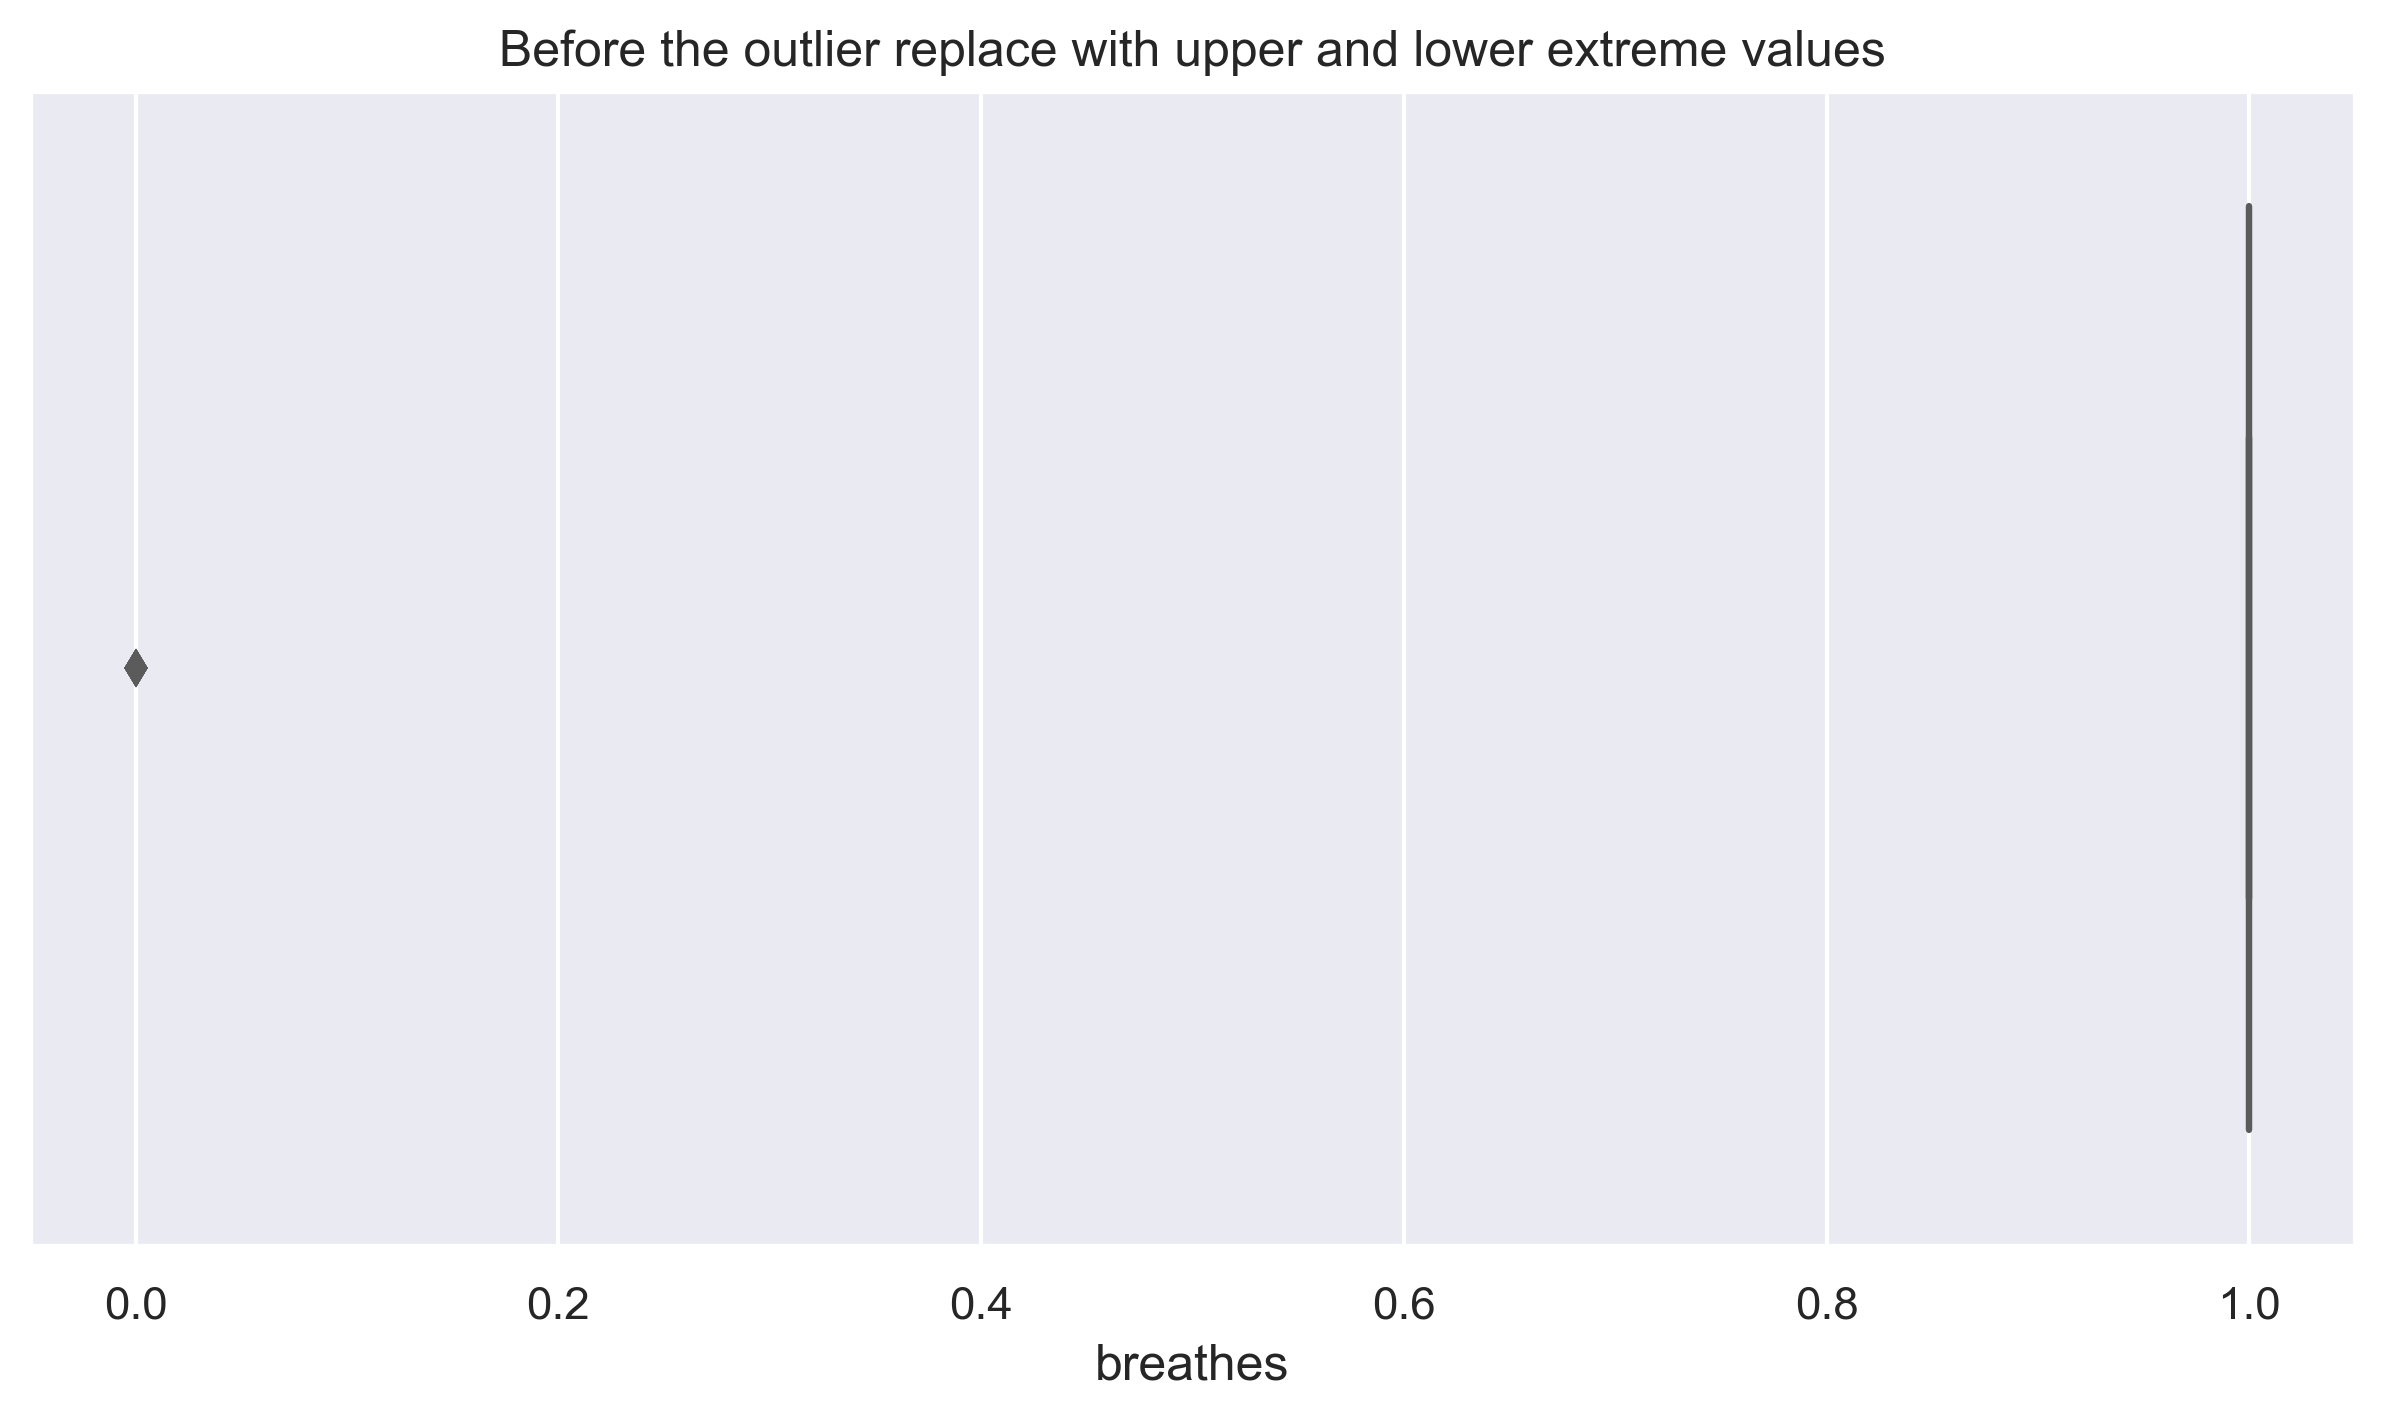

In [41]:
sns.boxplot(x = df["breathes"])
plt.xlabel("breathes")
plt.title("Before the outlier replace with upper and lower extreme values")

In [43]:
df.loc[df["breathes"]<1.0, "breathes"] = 1.0

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

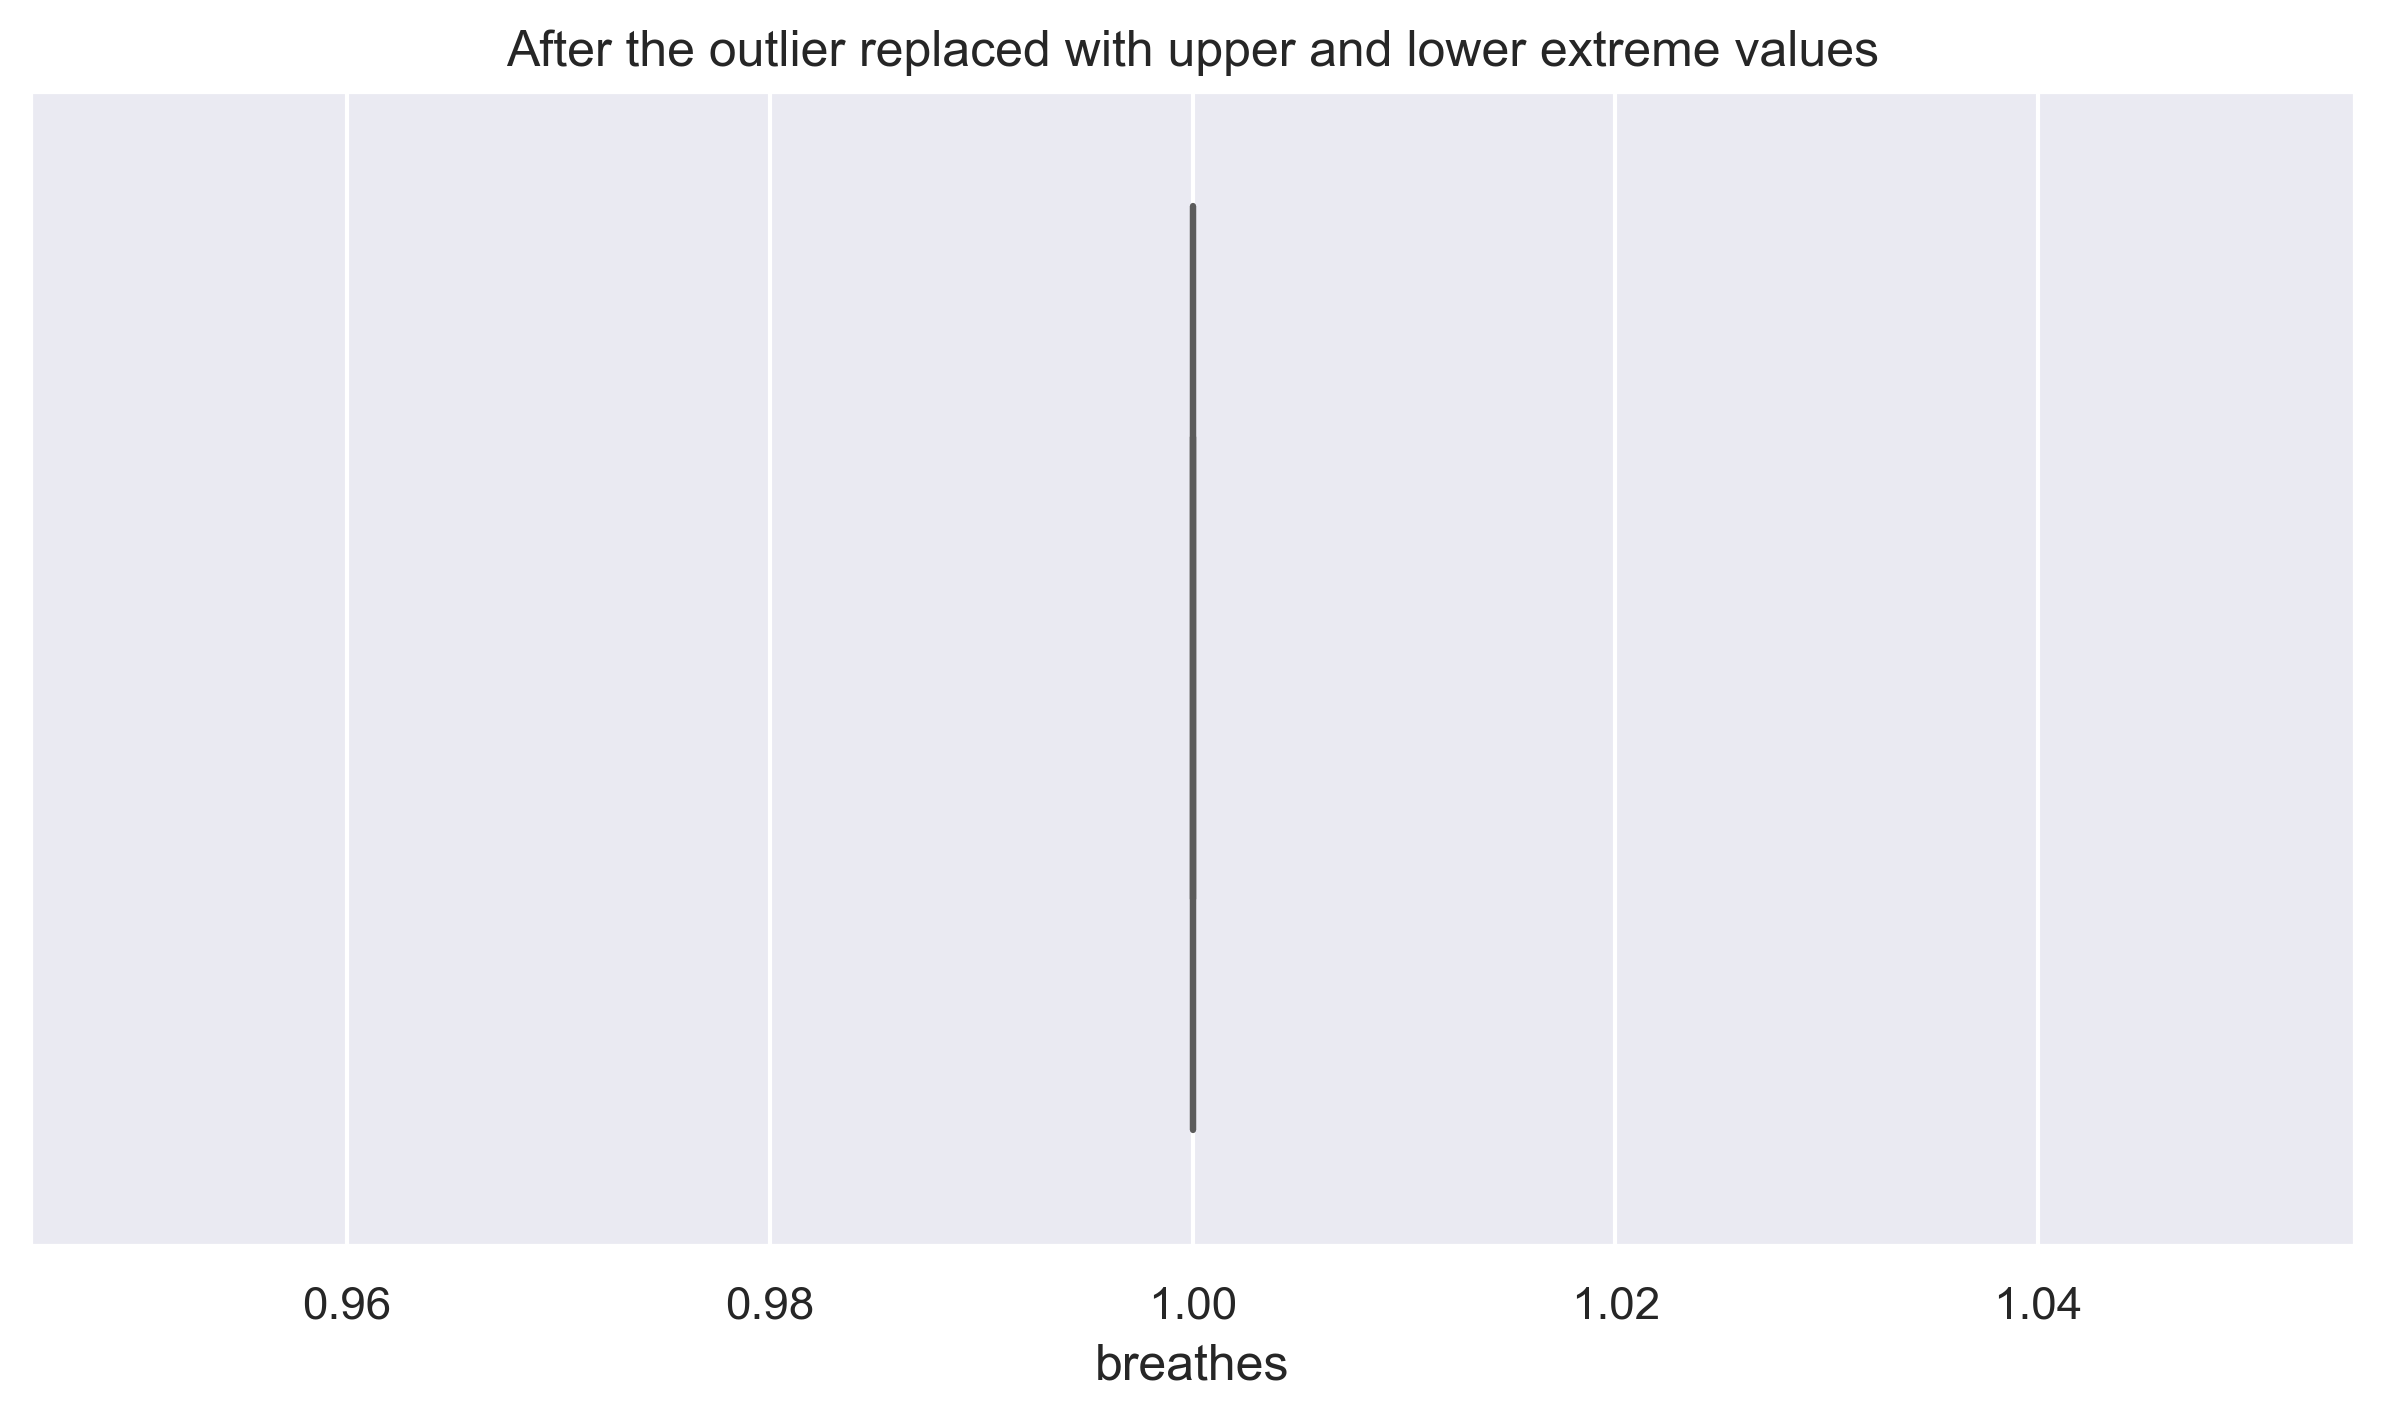

In [44]:
sns.boxplot(x = df["breathes"])
plt.xlabel("breathes")
plt.title("After the outlier replaced with upper and lower extreme values")

In [45]:
outlier_detection(df, "venomous")

(0.0, 0.0)

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

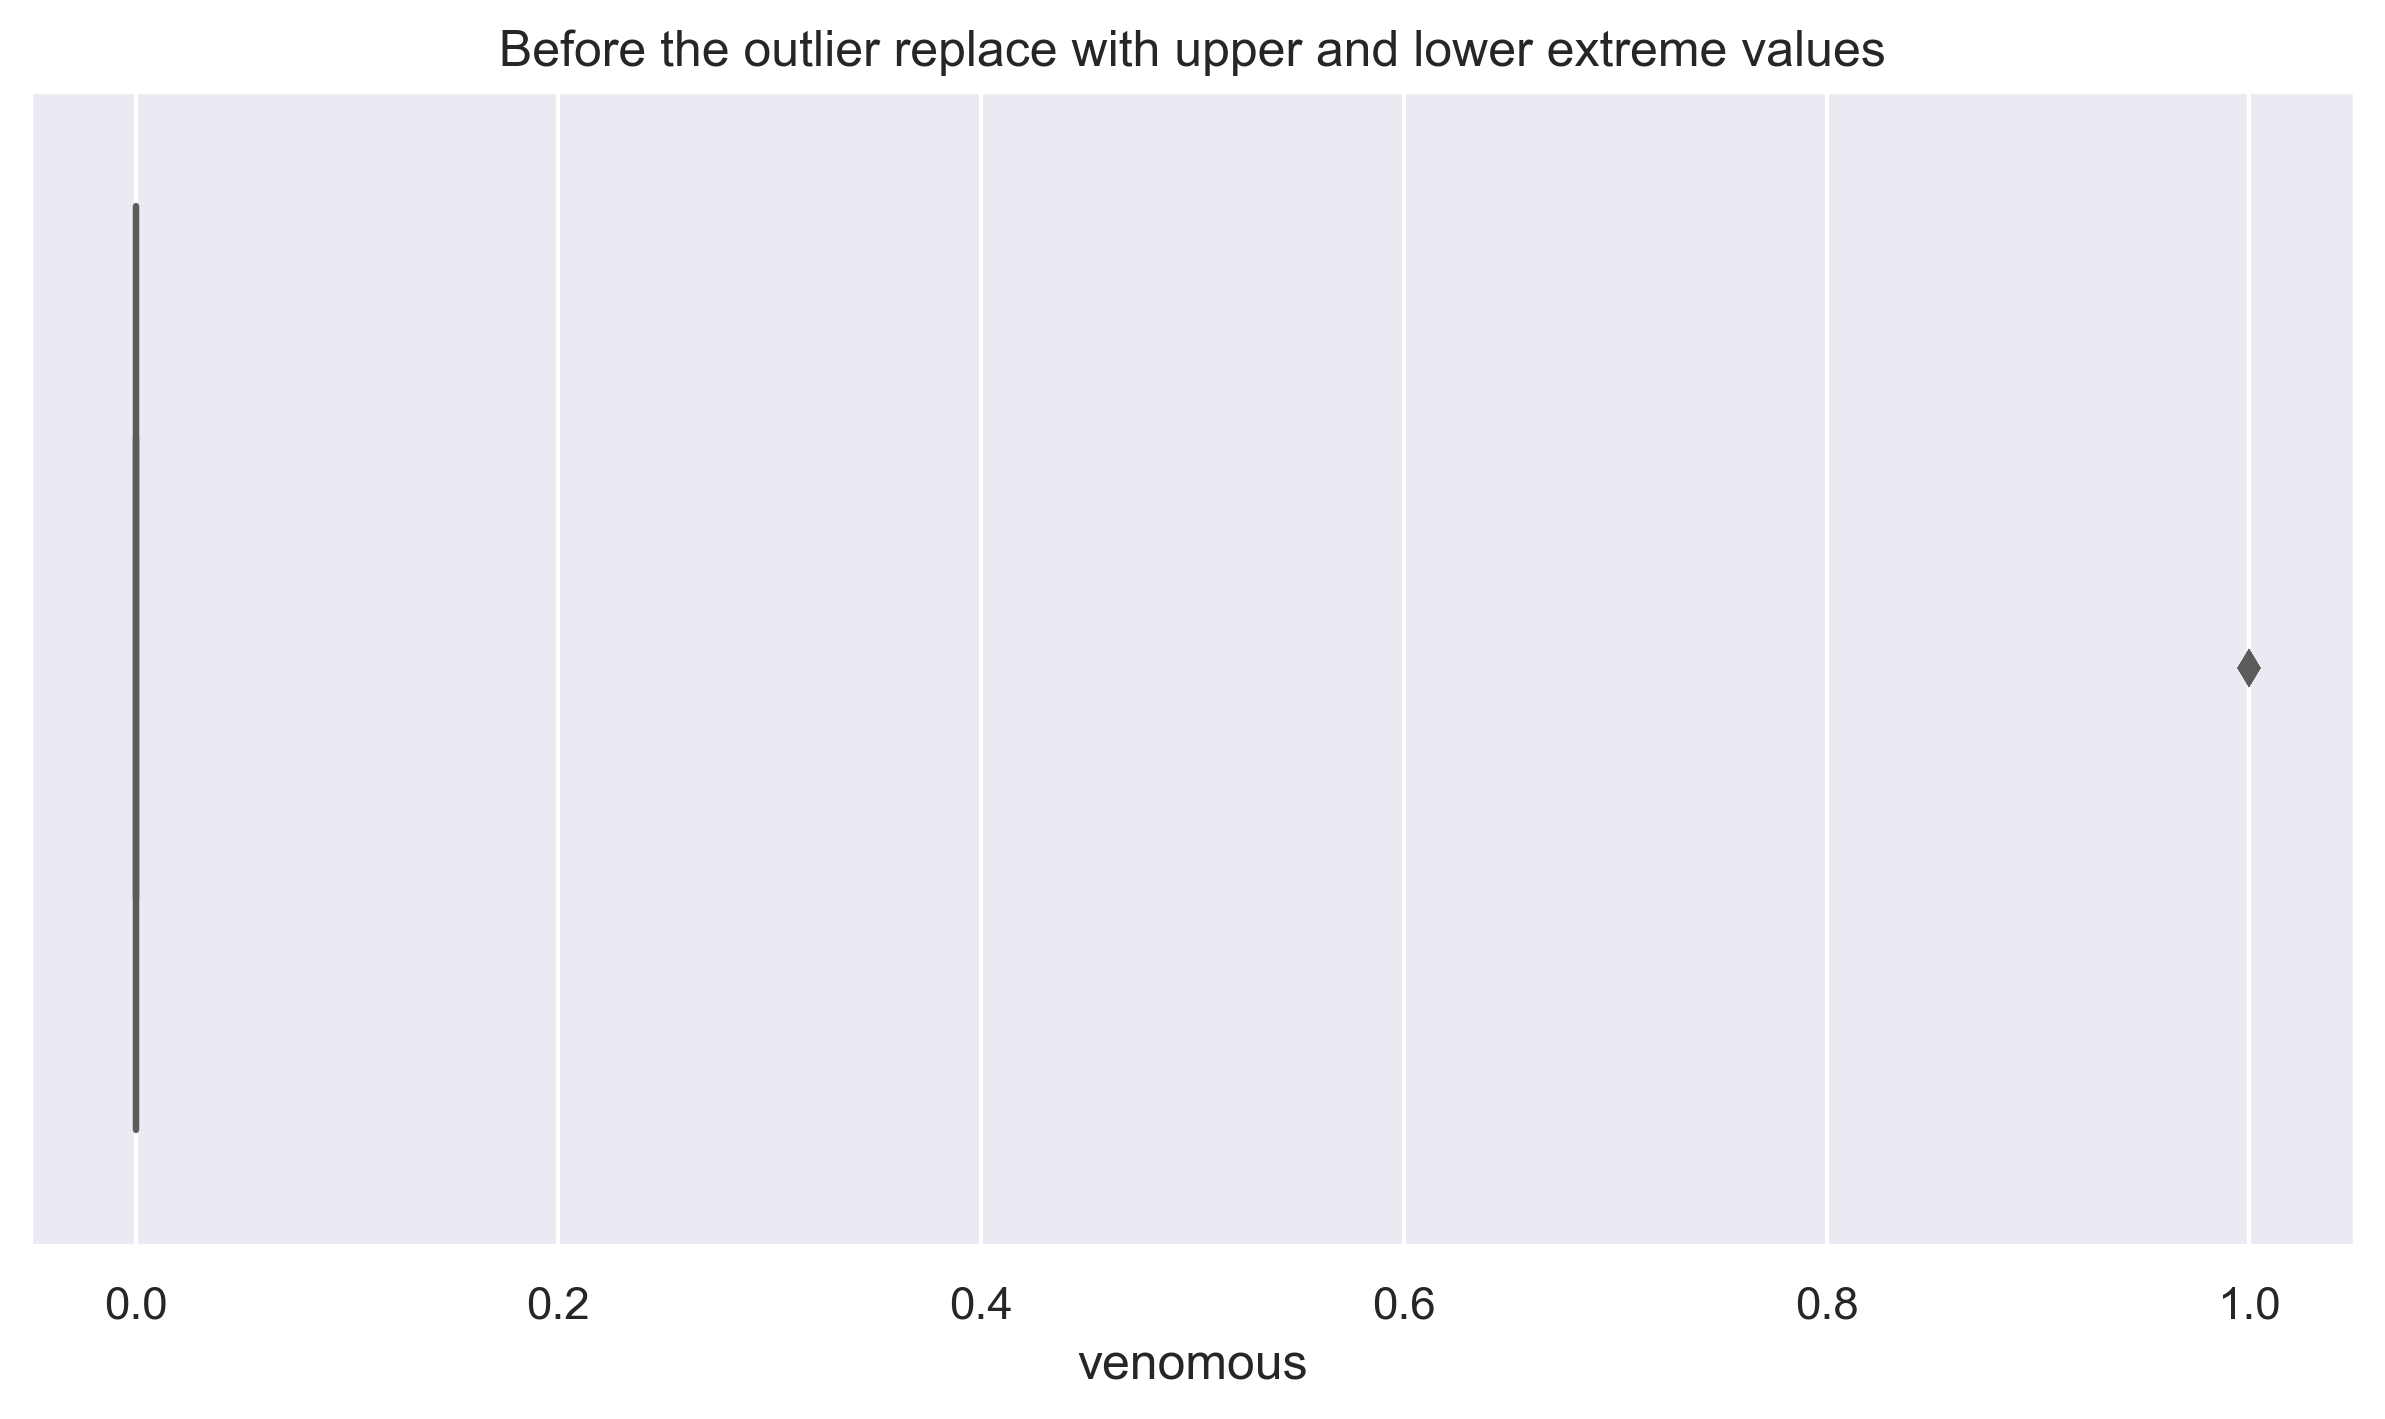

In [46]:
sns.boxplot(x = df["venomous"])
plt.xlabel("venomous")
plt.title("Before the outlier replace with upper and lower extreme values")

In [48]:
df.loc[df["venomous"]>0.0, "venomous"] = 0.0

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

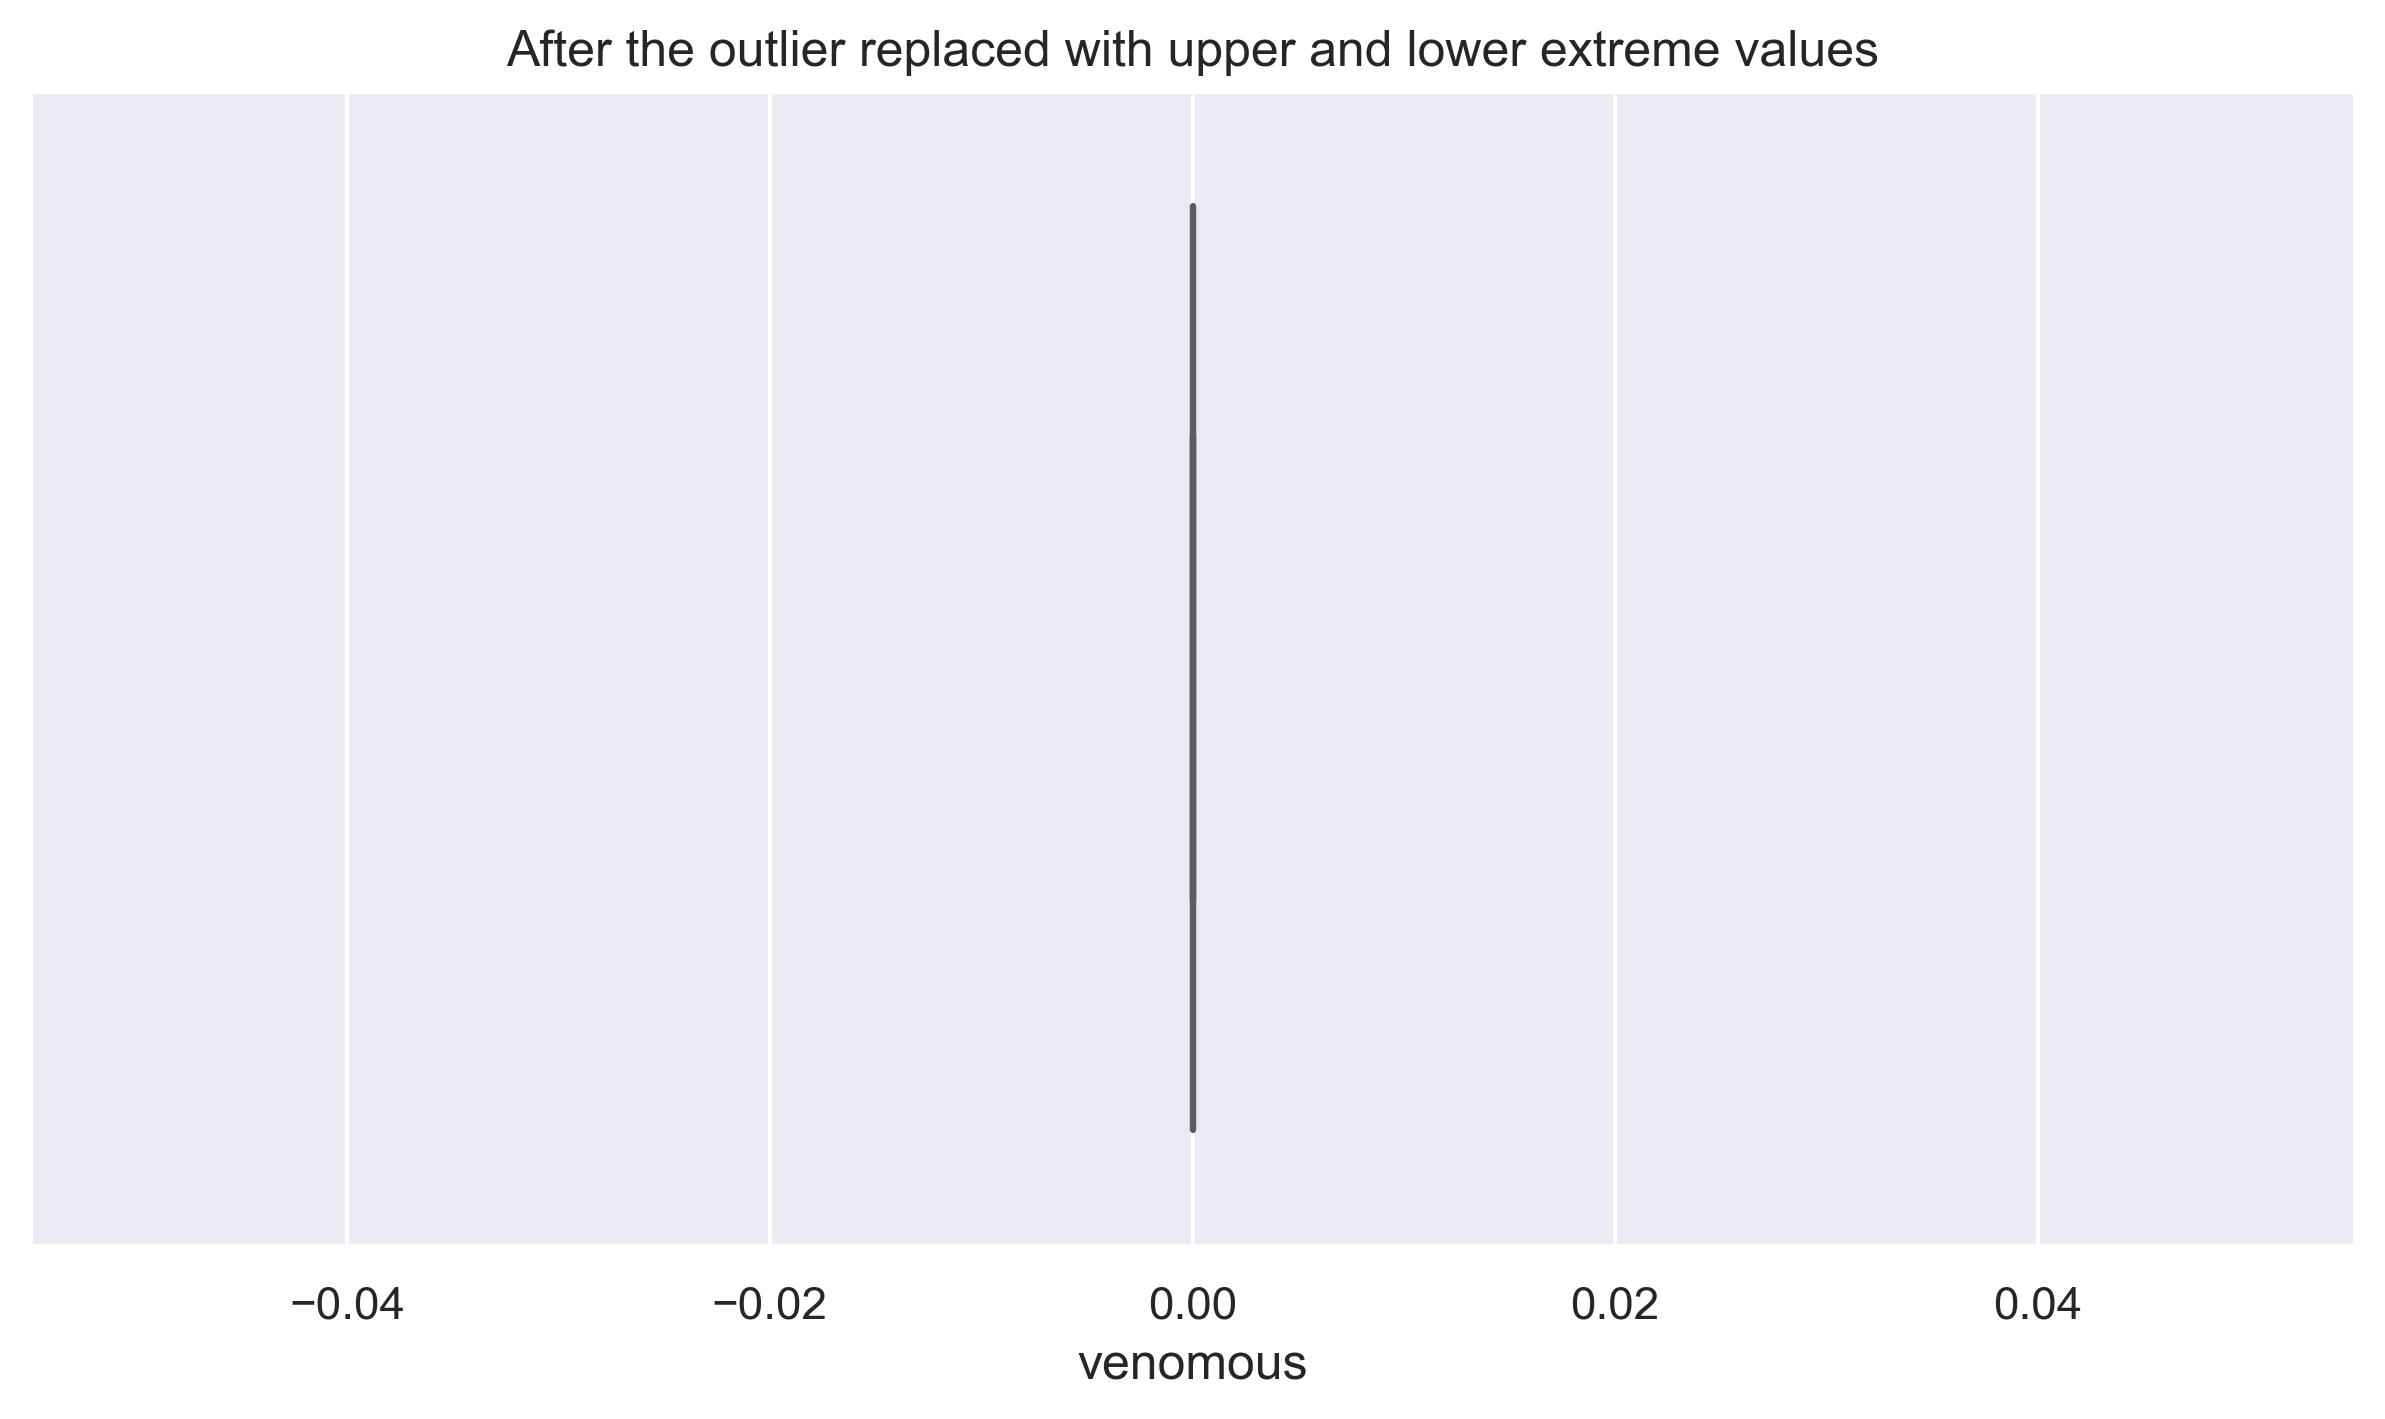

In [49]:
sns.boxplot(x = df["venomous"])
plt.xlabel("venomous")
plt.title("After the outlier replaced with upper and lower extreme values")

In [50]:
outlier_detection(df, "fins")

(0.0, 0.0)

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

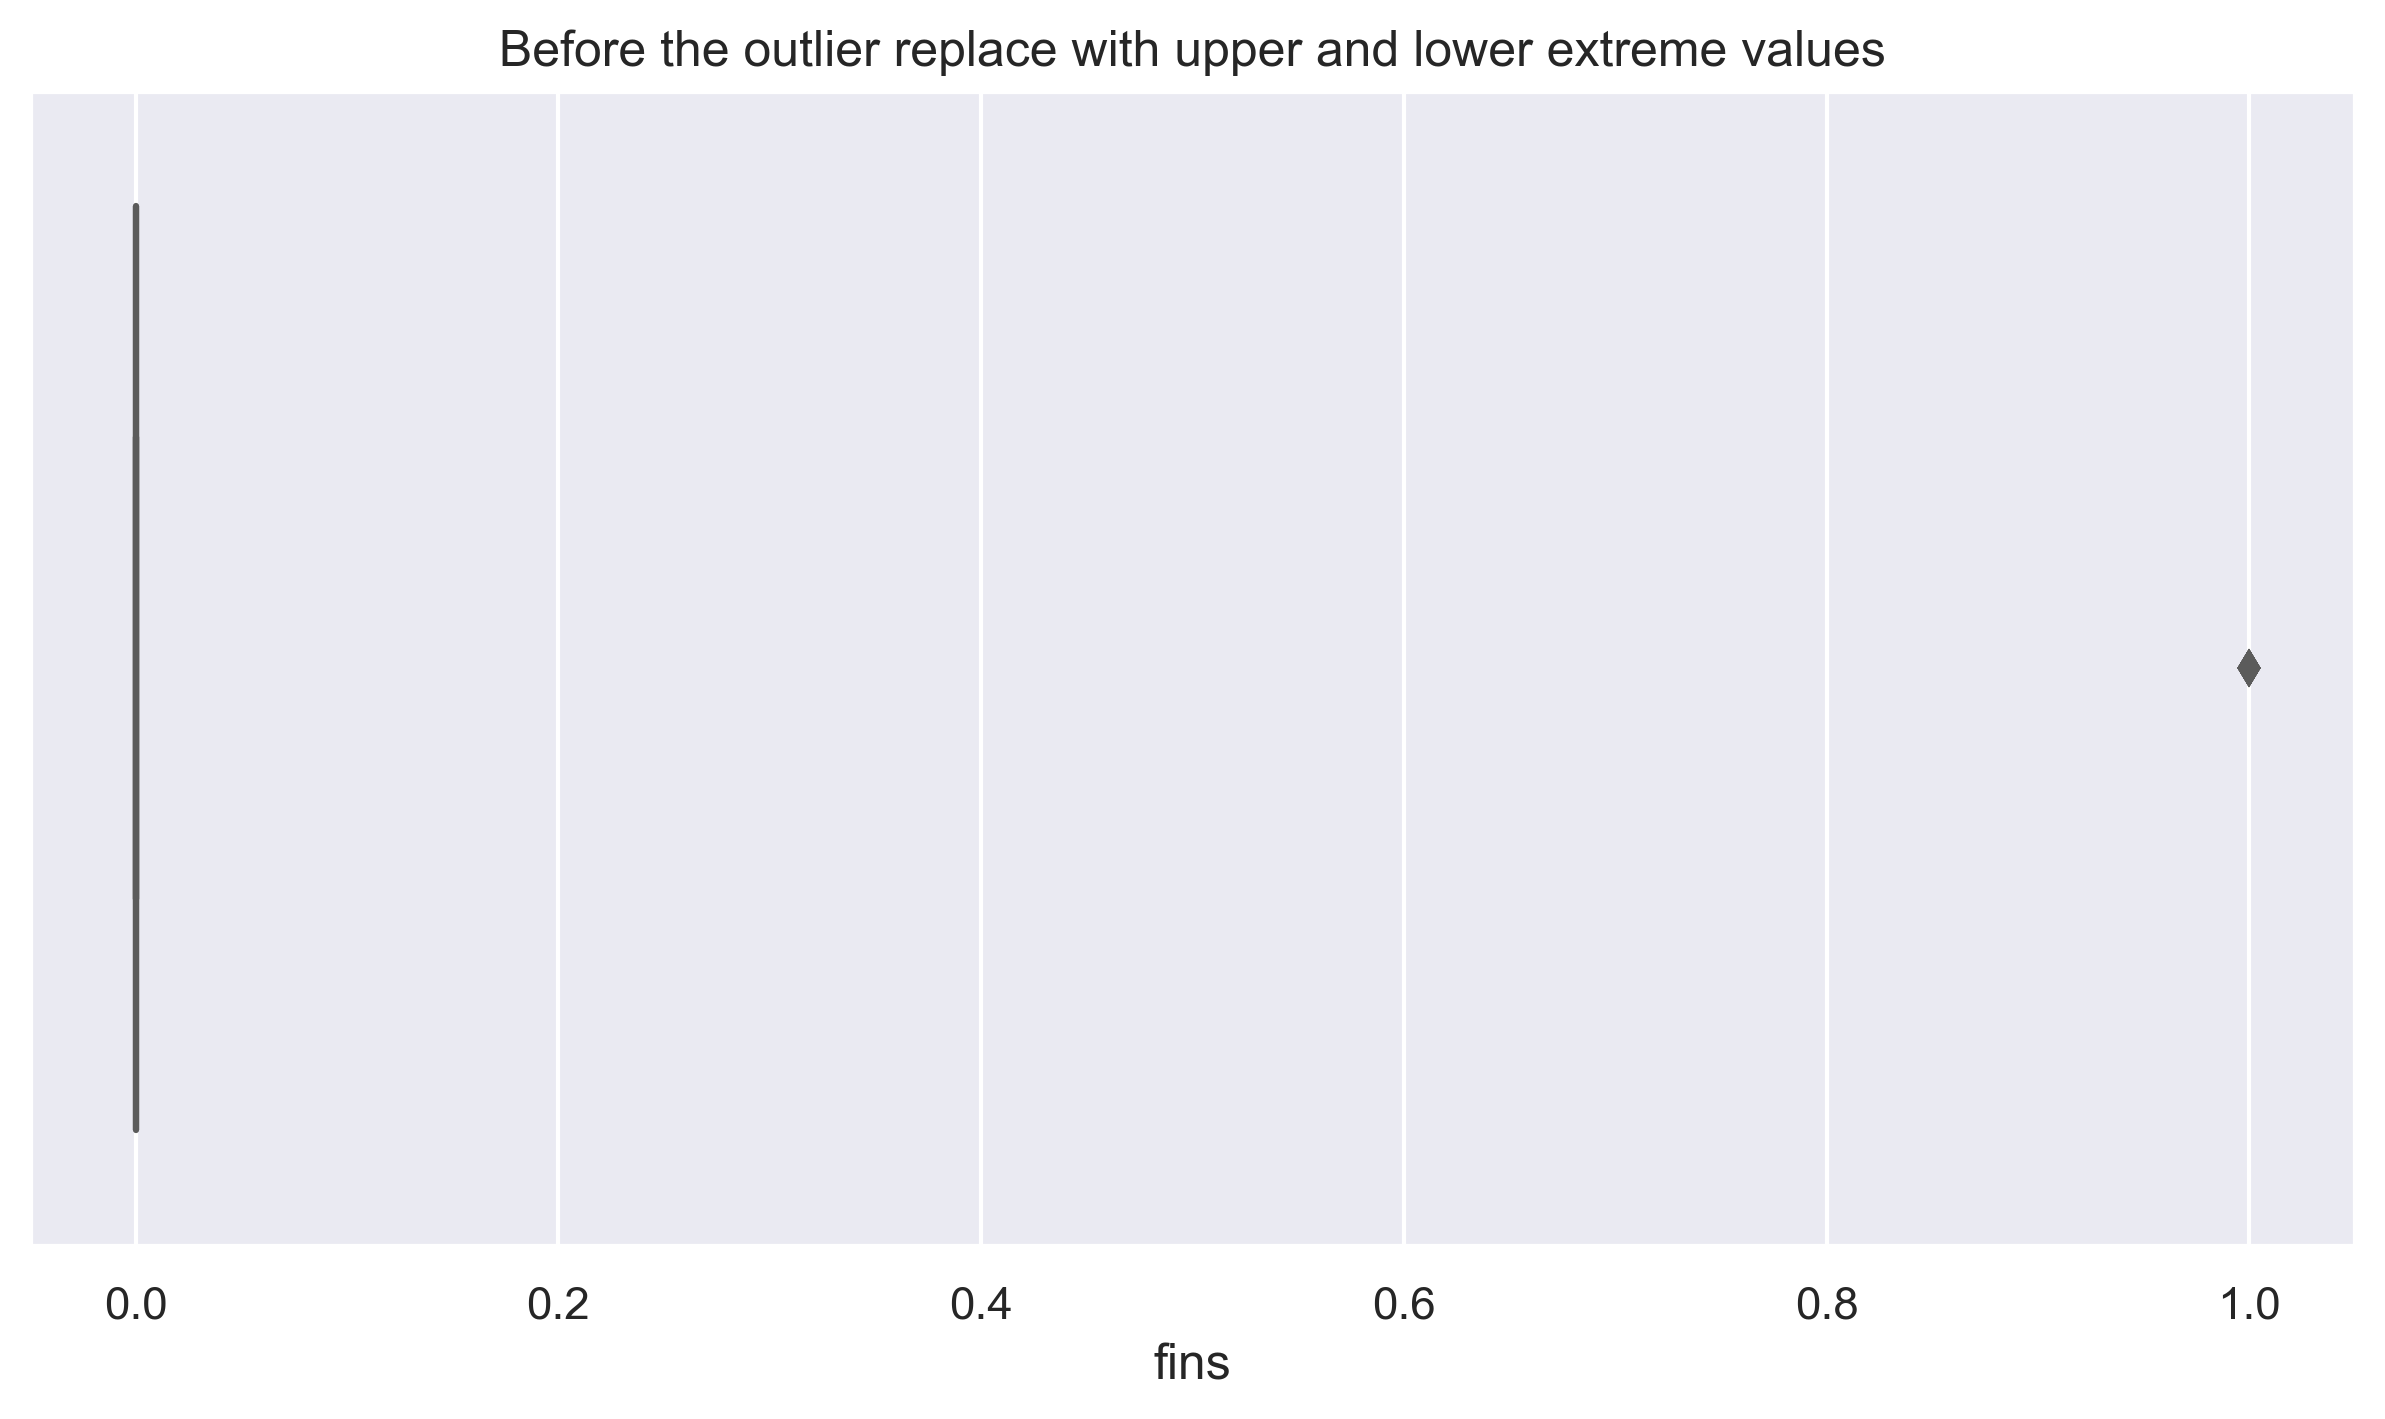

In [51]:
sns.boxplot(x = df["fins"])
plt.xlabel("fins")
plt.title("Before the outlier replace with upper and lower extreme values")

In [53]:
df.loc[df["fins"]>0.0, "fins"] = 0.0 

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

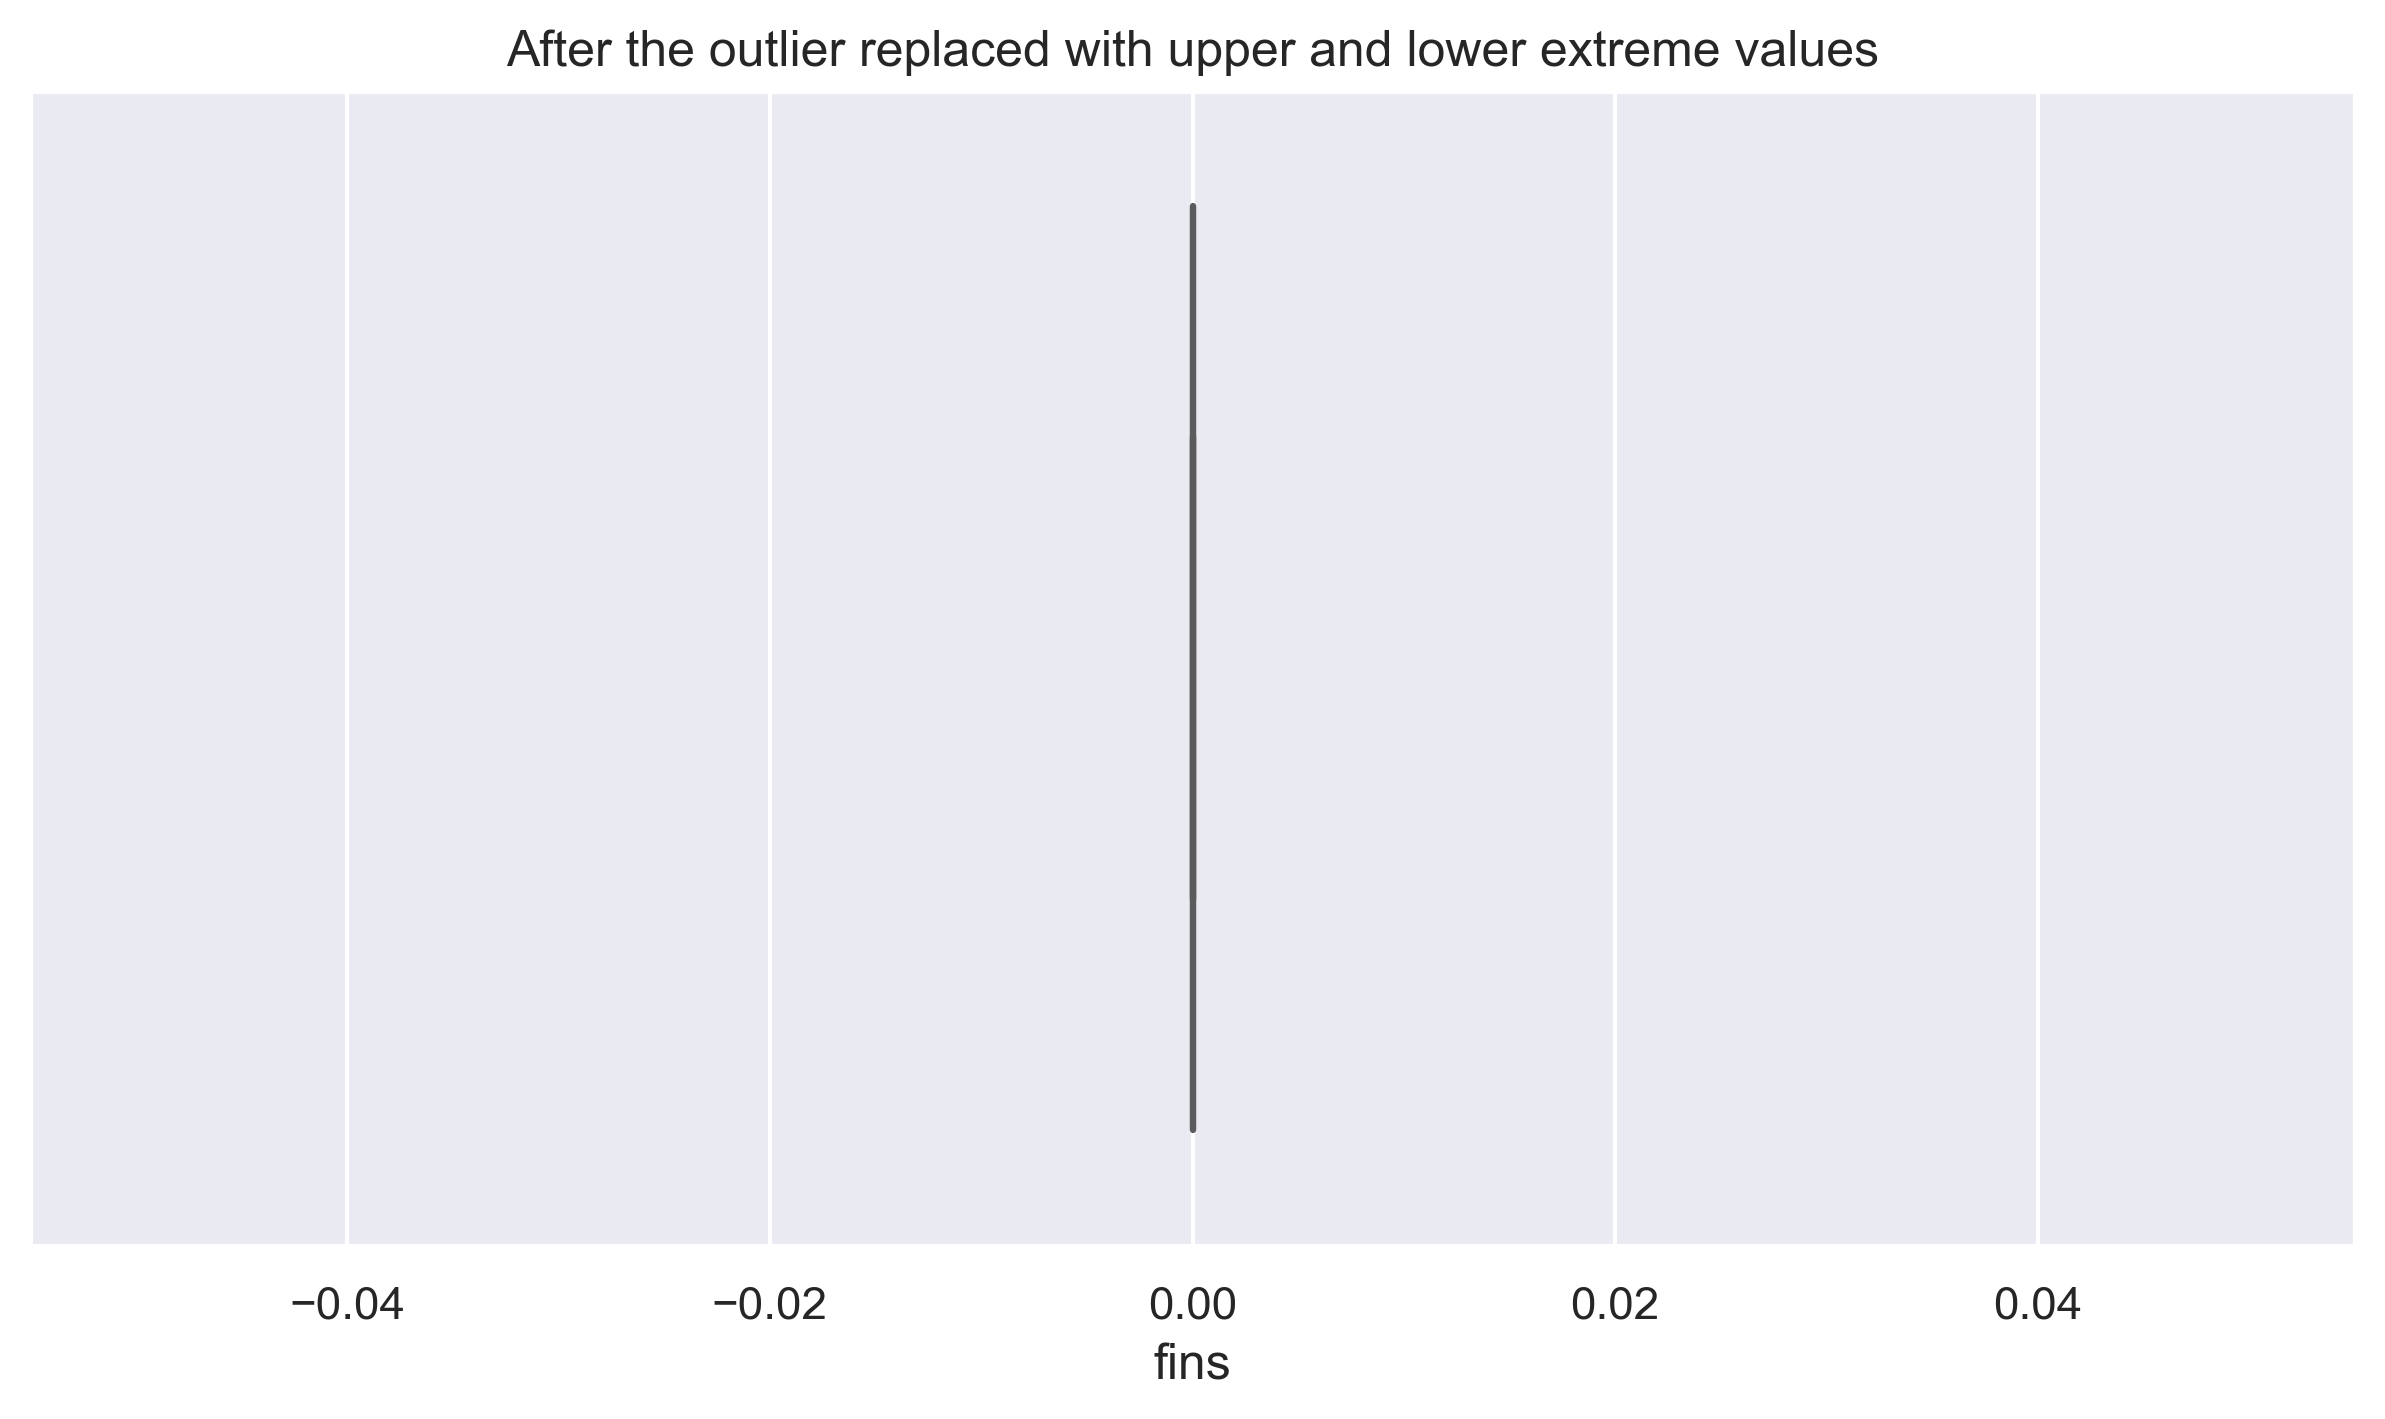

In [54]:
sns.boxplot(x = df["fins"])
plt.xlabel("fins")
plt.title("After the outlier replaced with upper and lower extreme values")

In [55]:
outlier_detection(df, "legs")

(-1.0, 7.0)

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

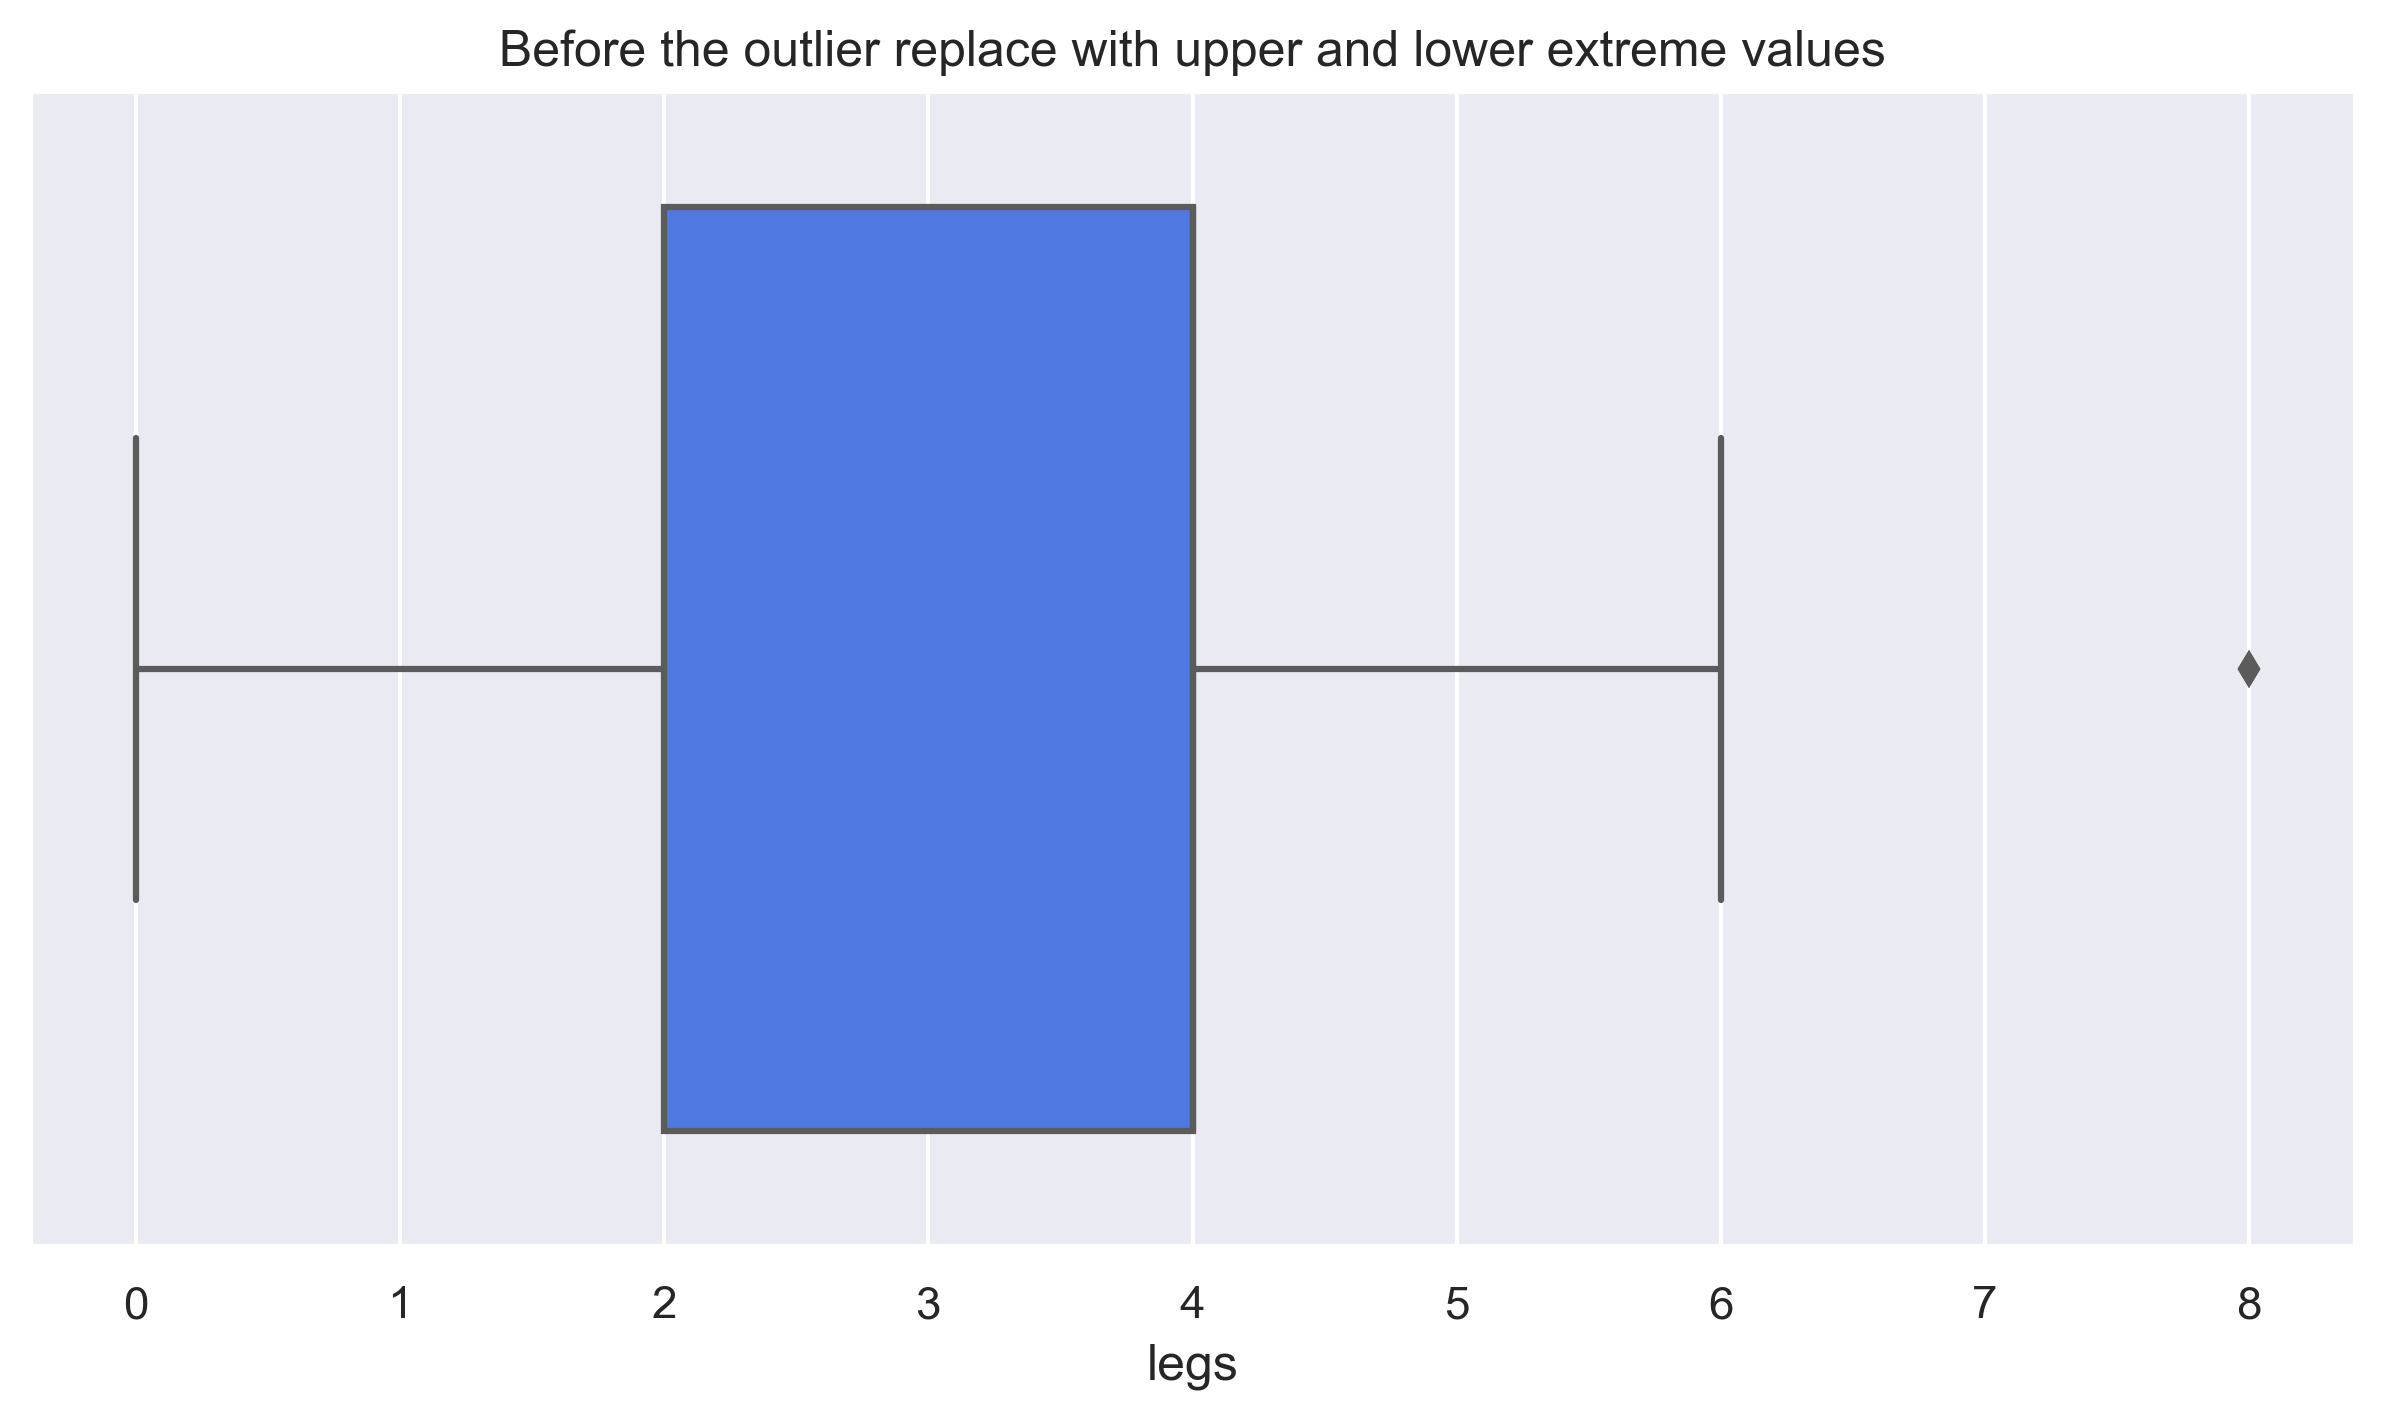

In [56]:
sns.boxplot(x = df["legs"])
plt.xlabel("legs")
plt.title("Before the outlier replace with upper and lower extreme values")

In [58]:
df.loc[df["legs"]>7.0, "legs"] = 7.0

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

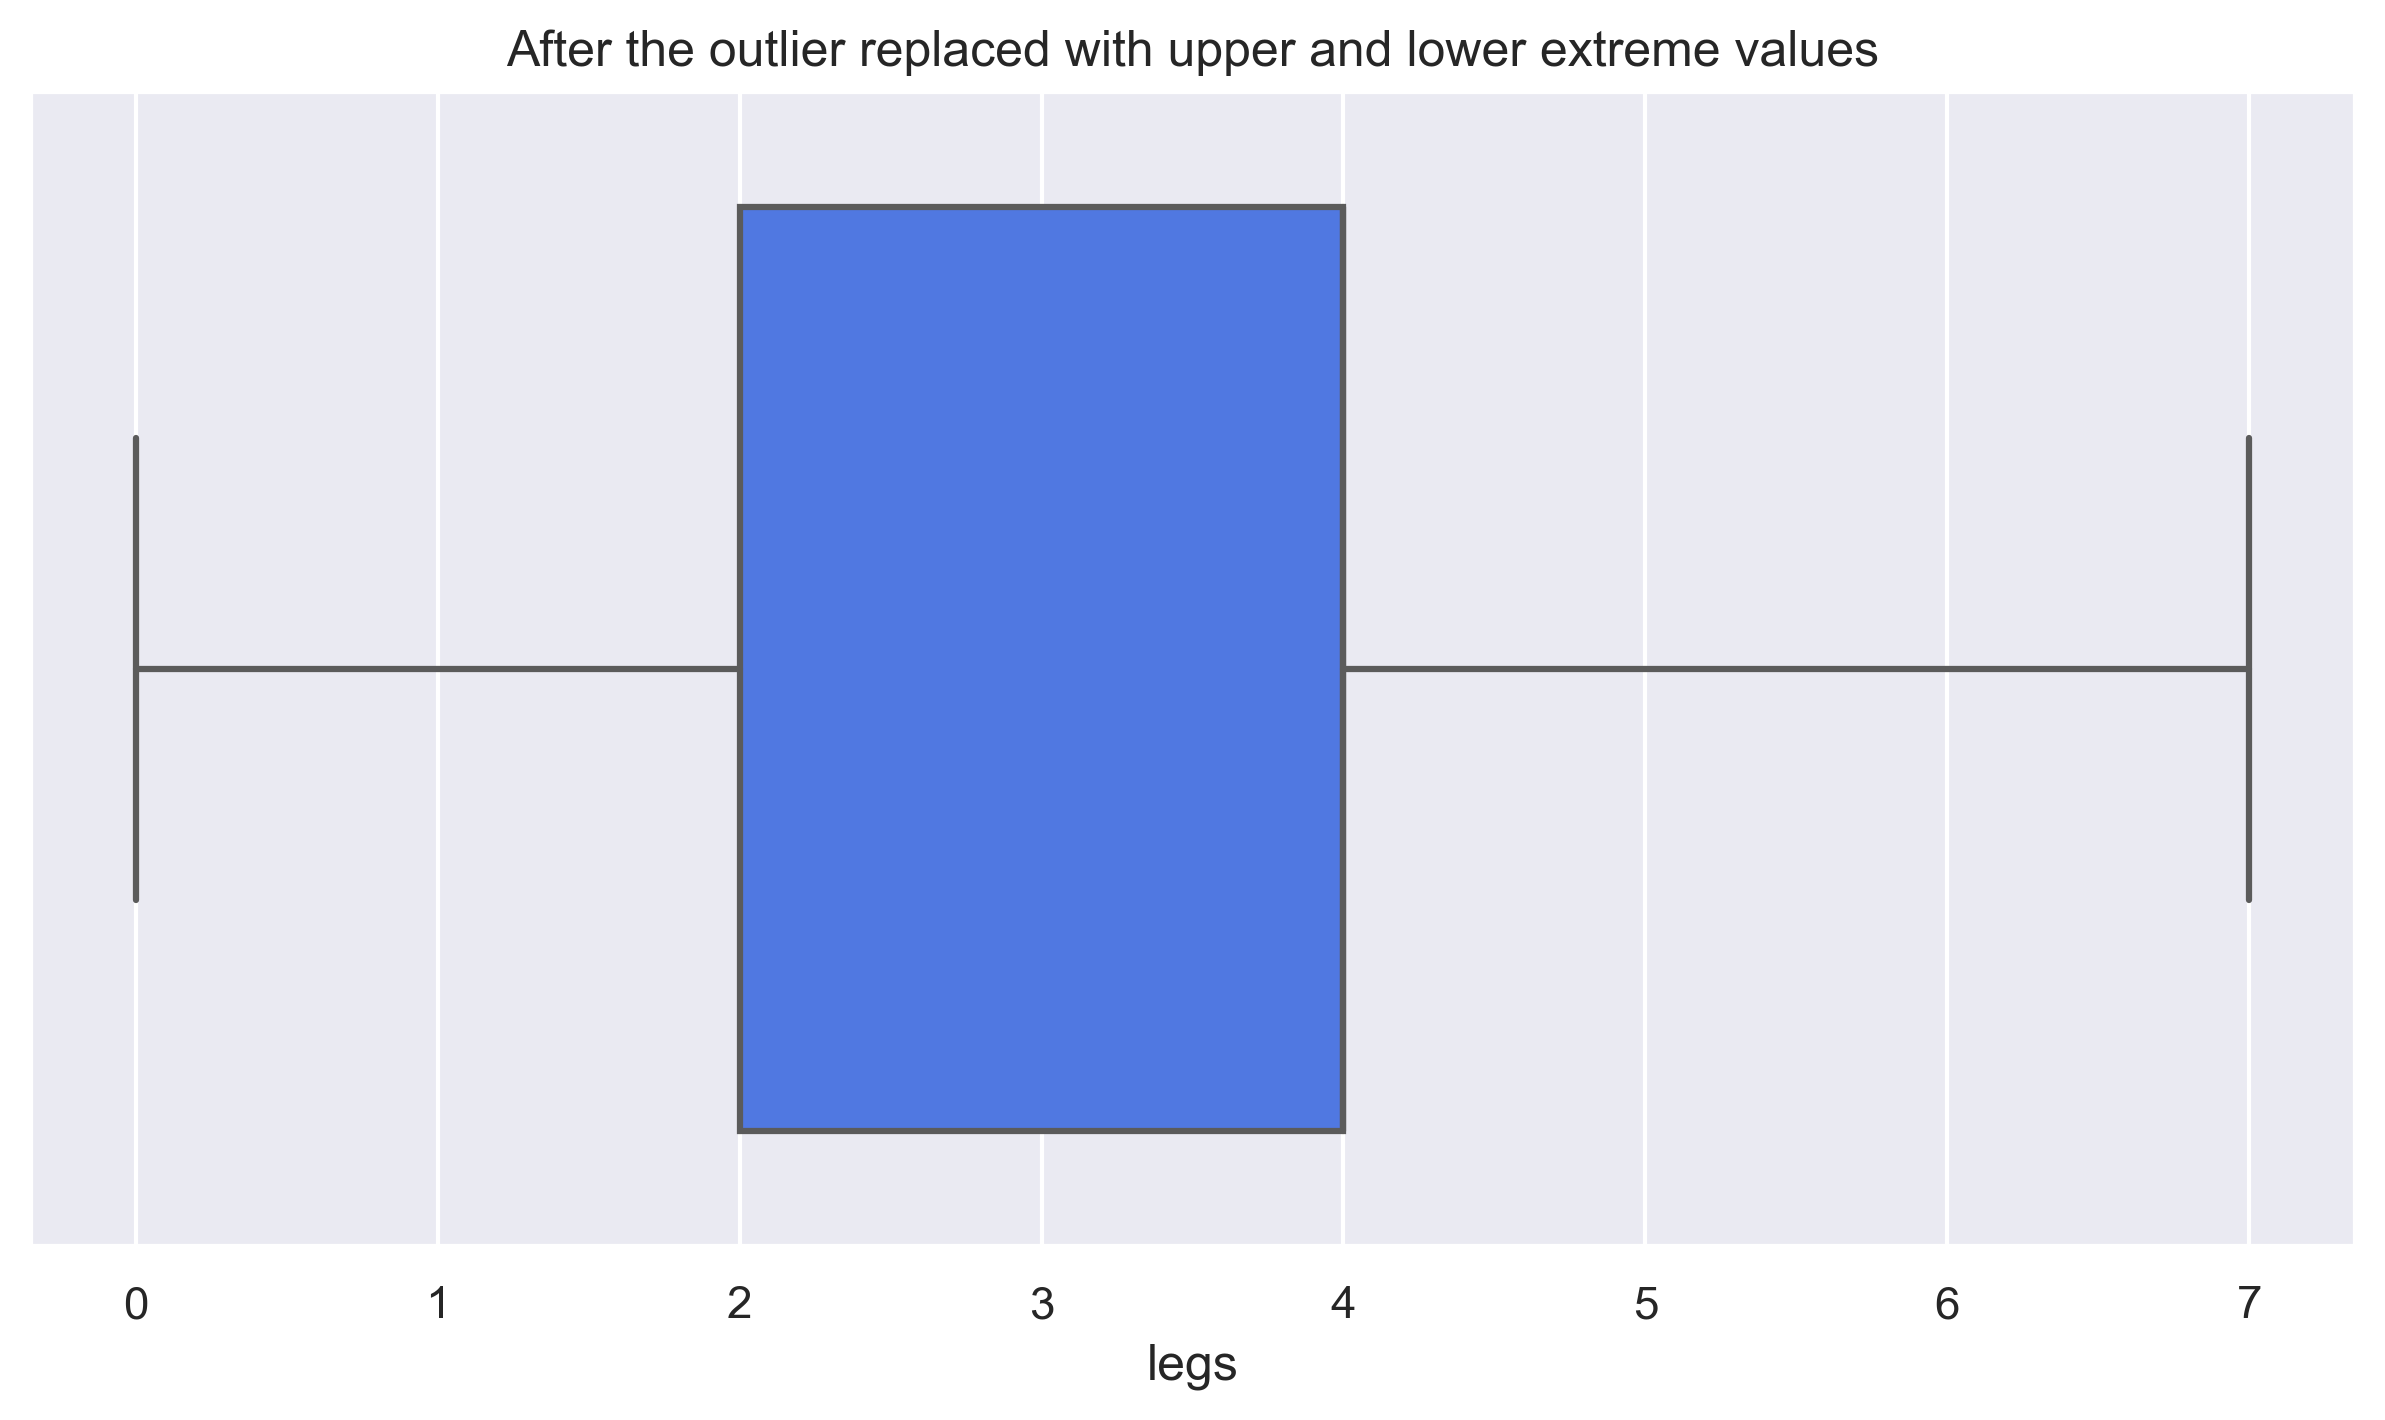

In [59]:
sns.boxplot(x = df["legs"])
plt.xlabel("legs")
plt.title("After the outlier replaced with upper and lower extreme values")

In [60]:
outlier_detection(df, "domestic")

(0.0, 0.0)

Text(0.5, 1.0, 'Before the outlier replace with upper and lower extreme values')

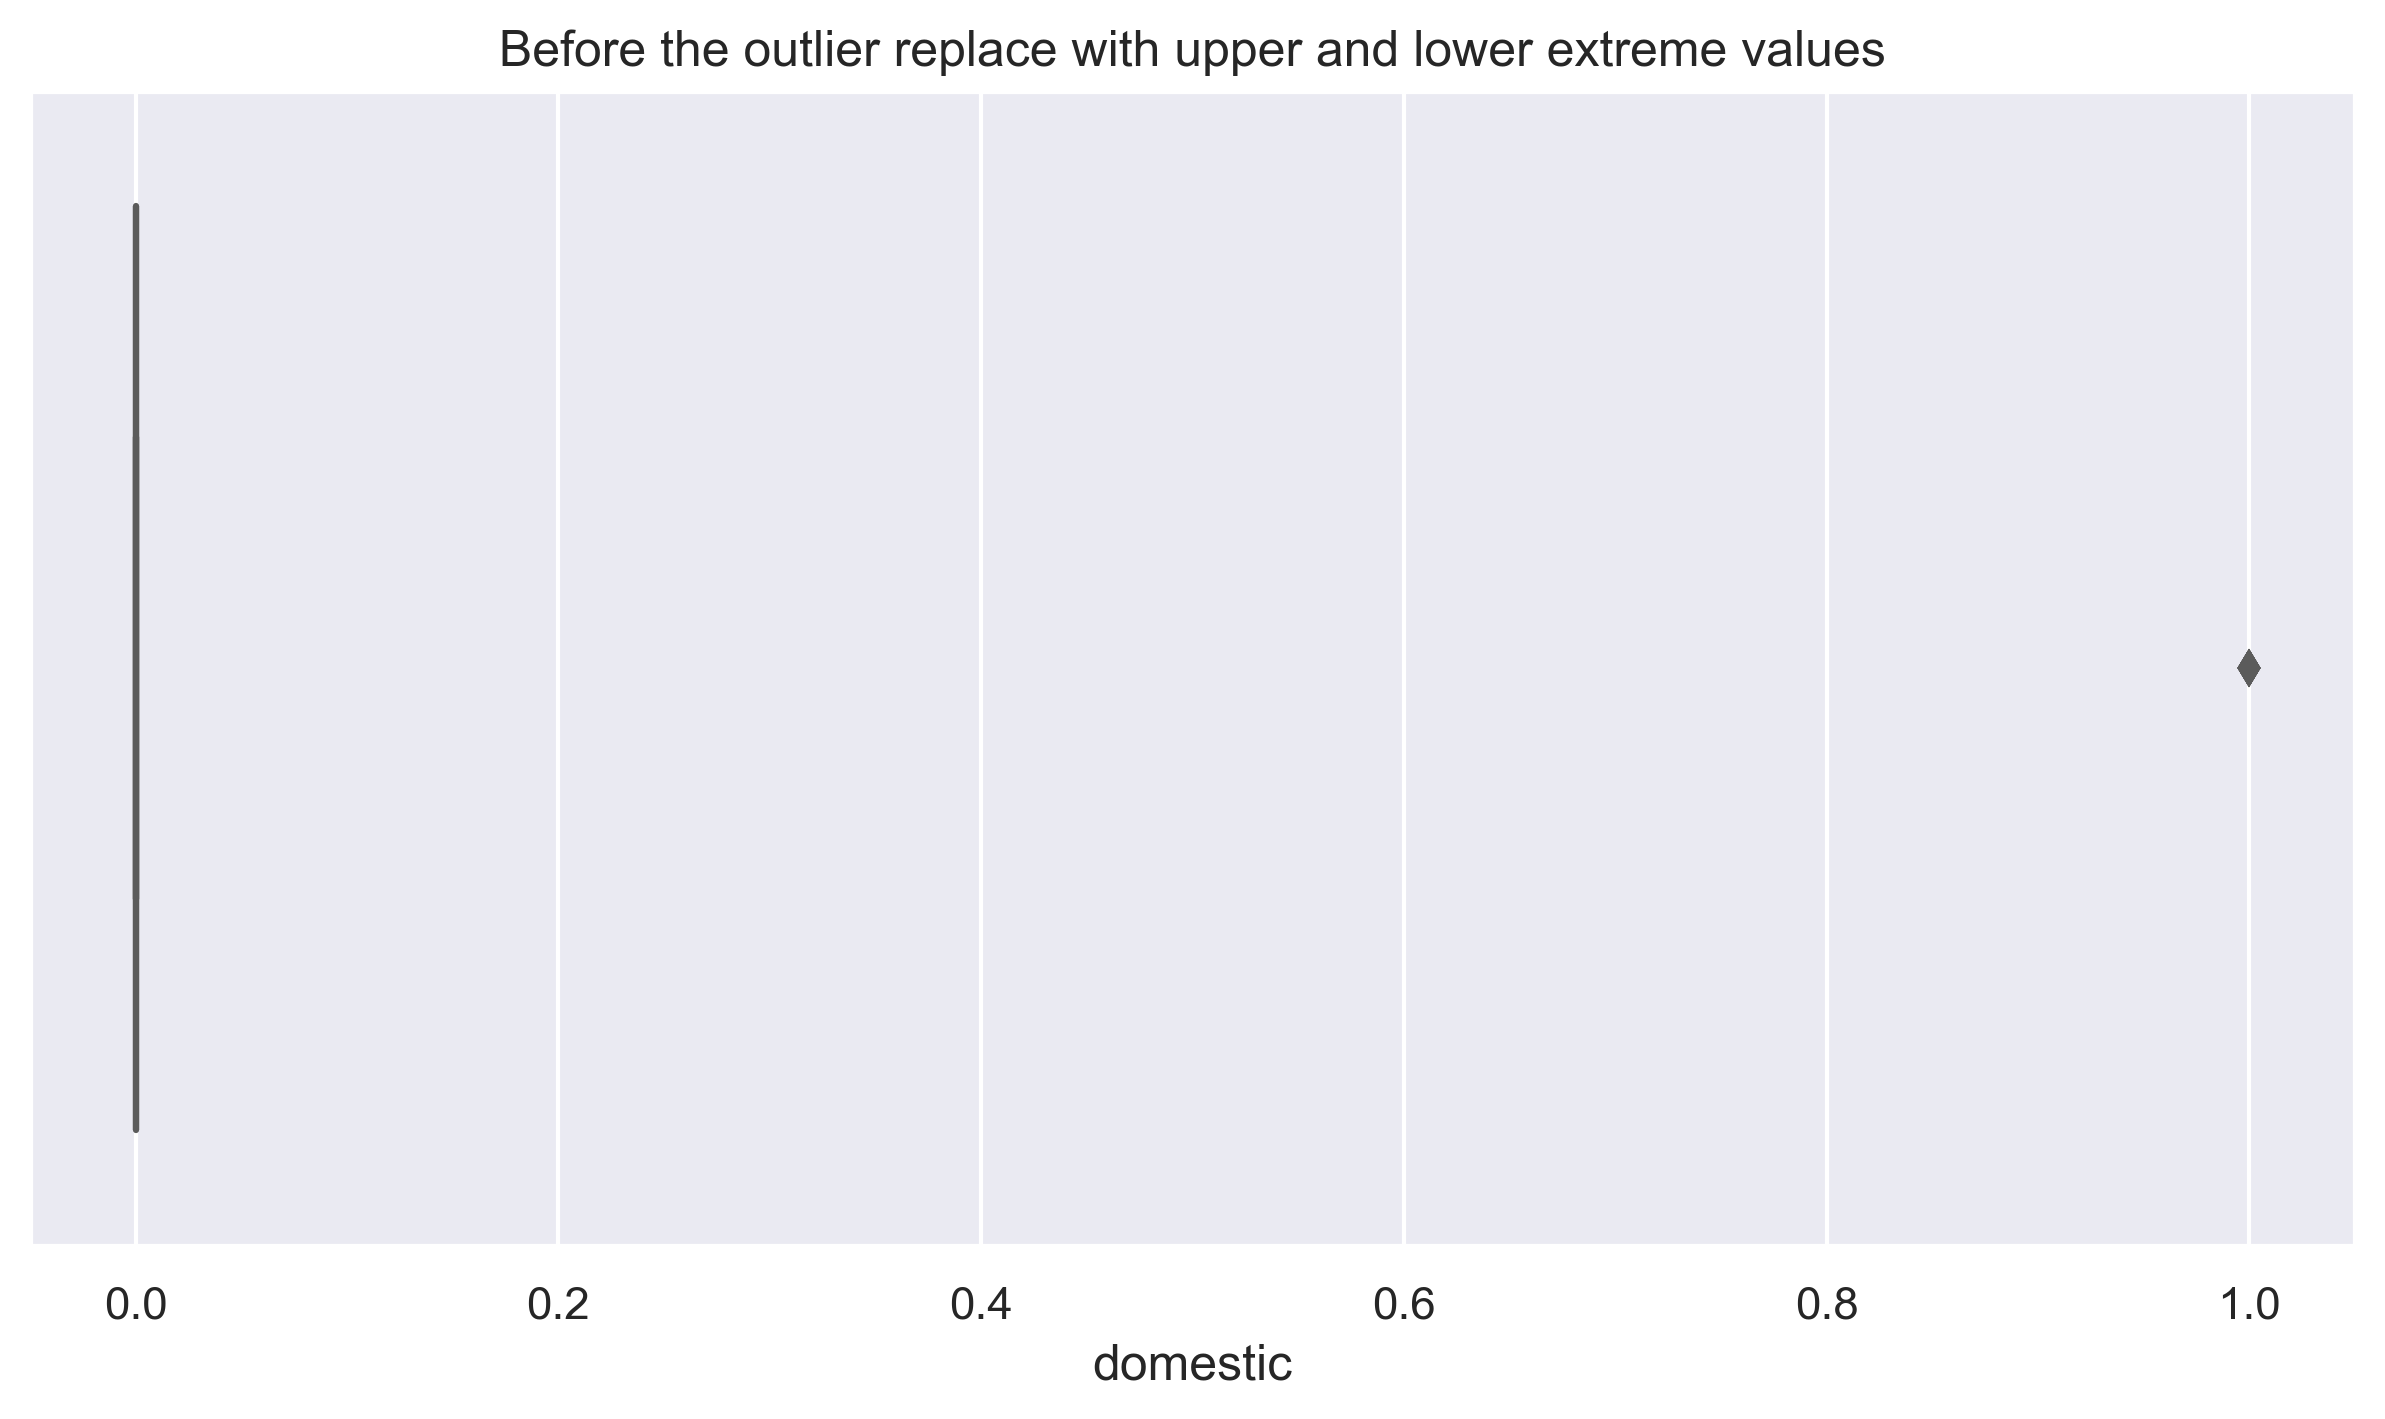

In [61]:
sns.boxplot(x = df["domestic"])
plt.xlabel("domestic")
plt.title("Before the outlier replace with upper and lower extreme values")

In [63]:
df.loc[df["domestic"]>0.0, "domestic"] = 0.0

Text(0.5, 1.0, 'After the outlier replaced with upper and lower extreme values')

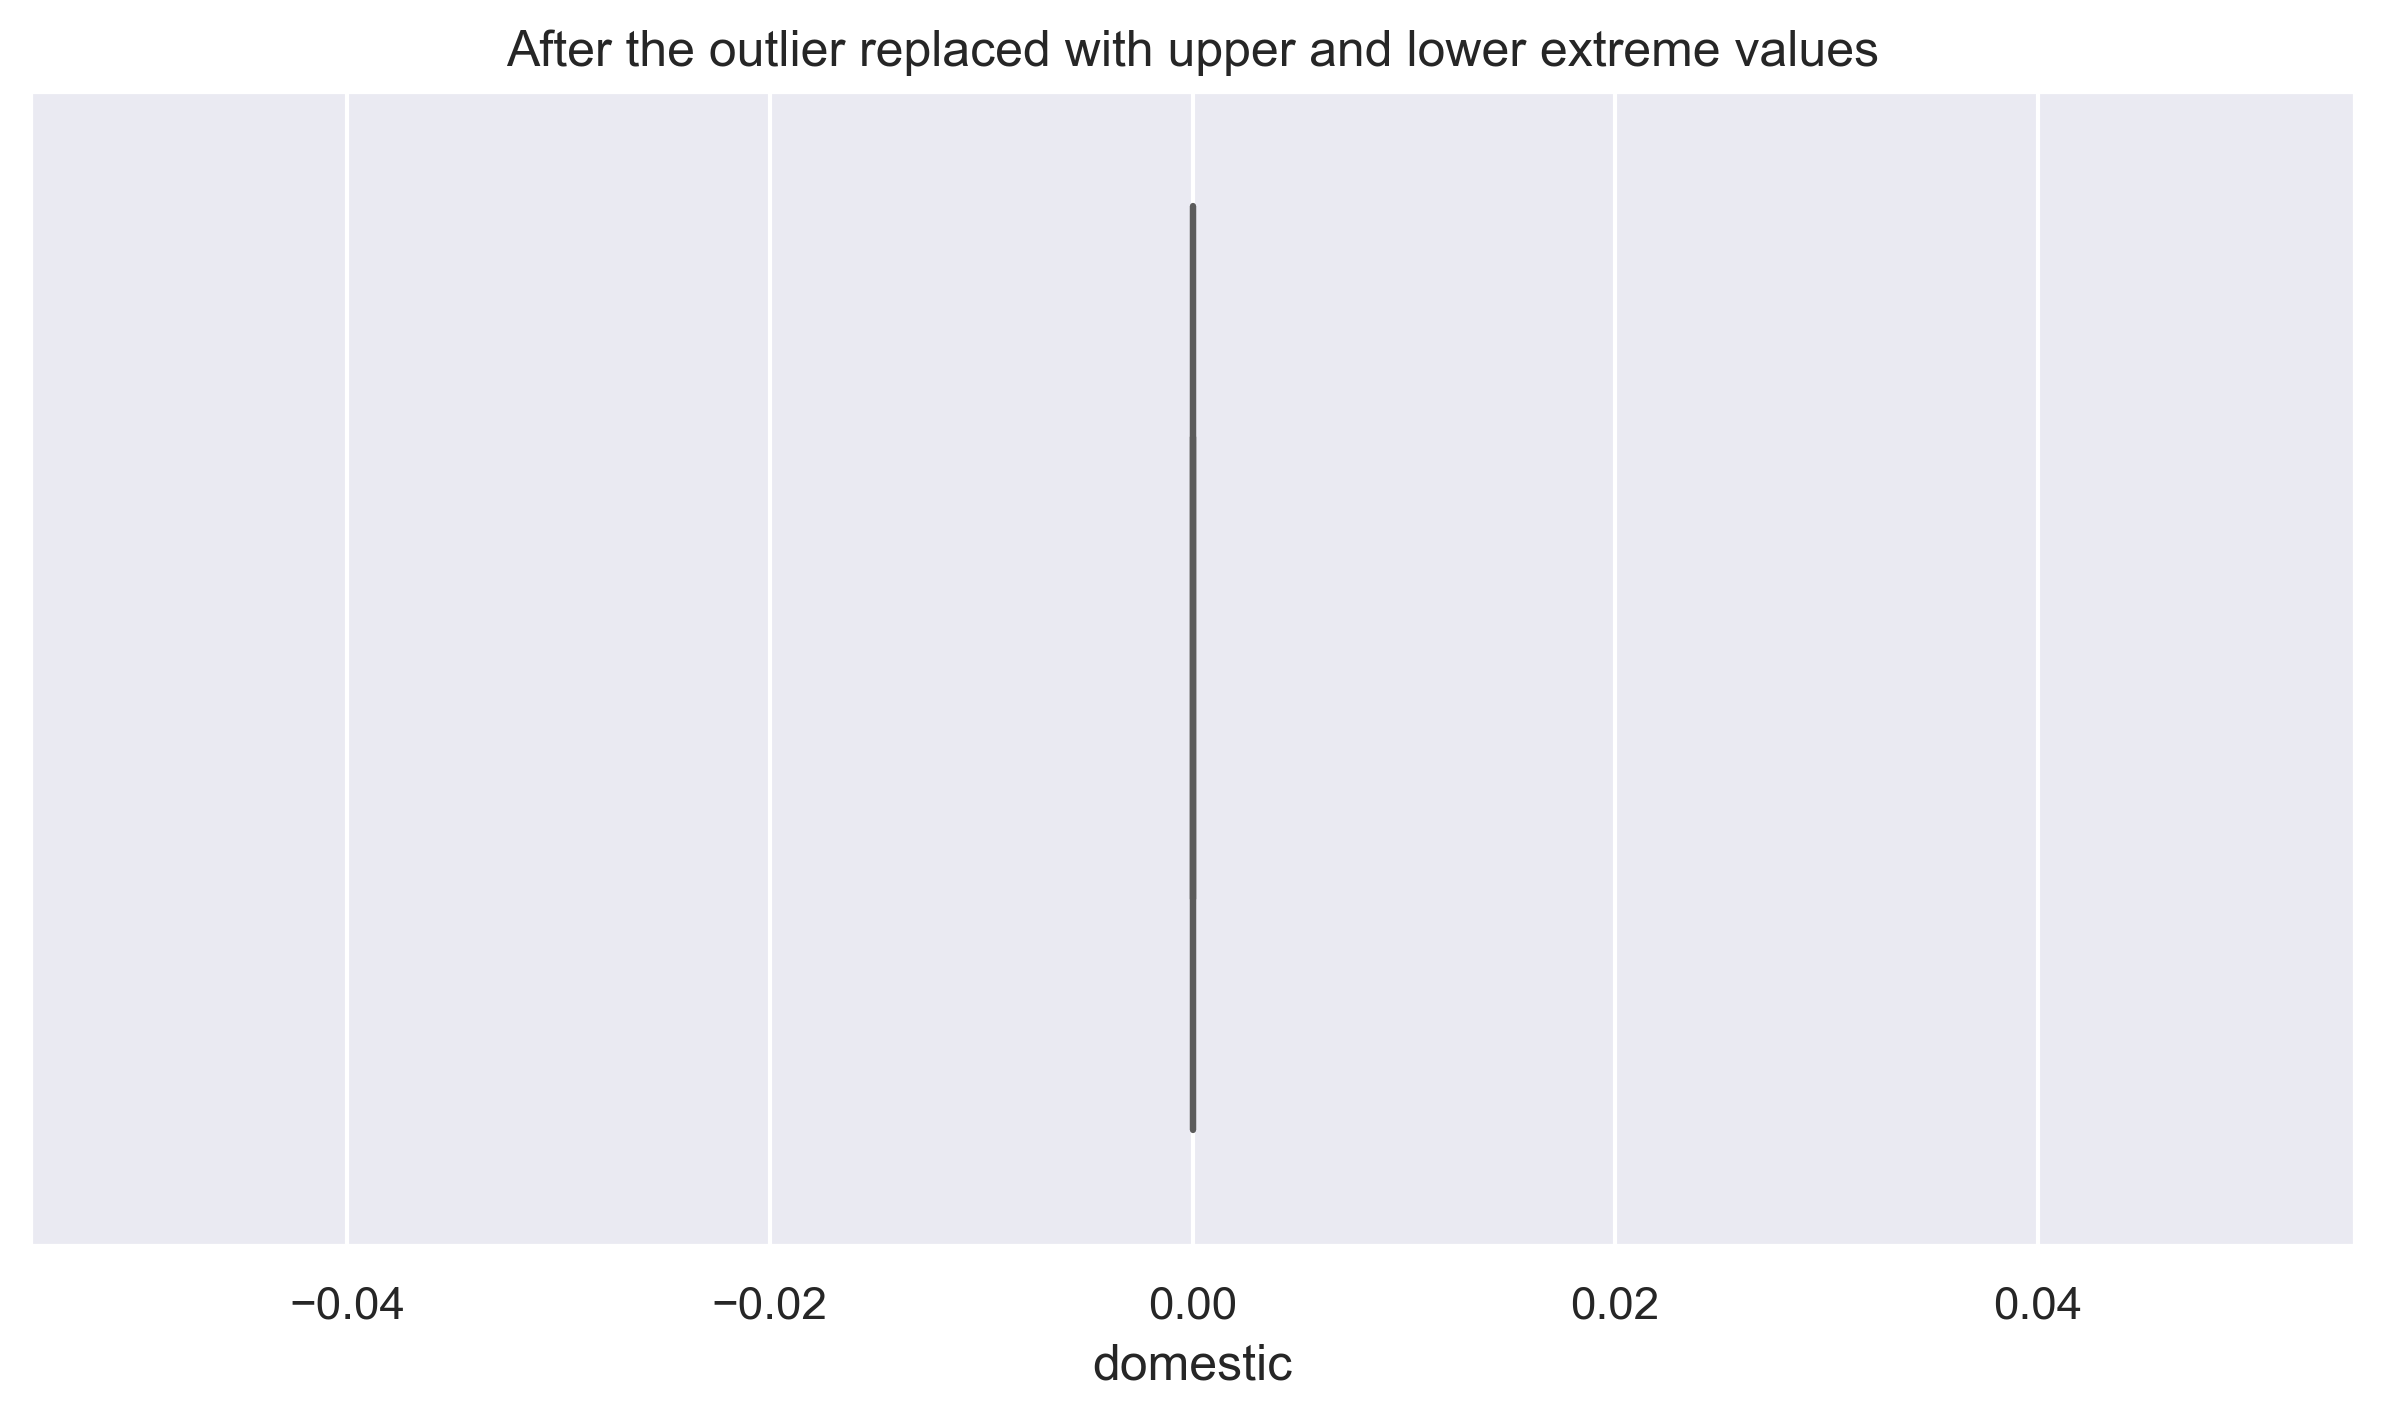

In [64]:
sns.boxplot(x = df["domestic"])
plt.xlabel("domestic")
plt.title("After the outlier replaced with upper and lower extreme values")

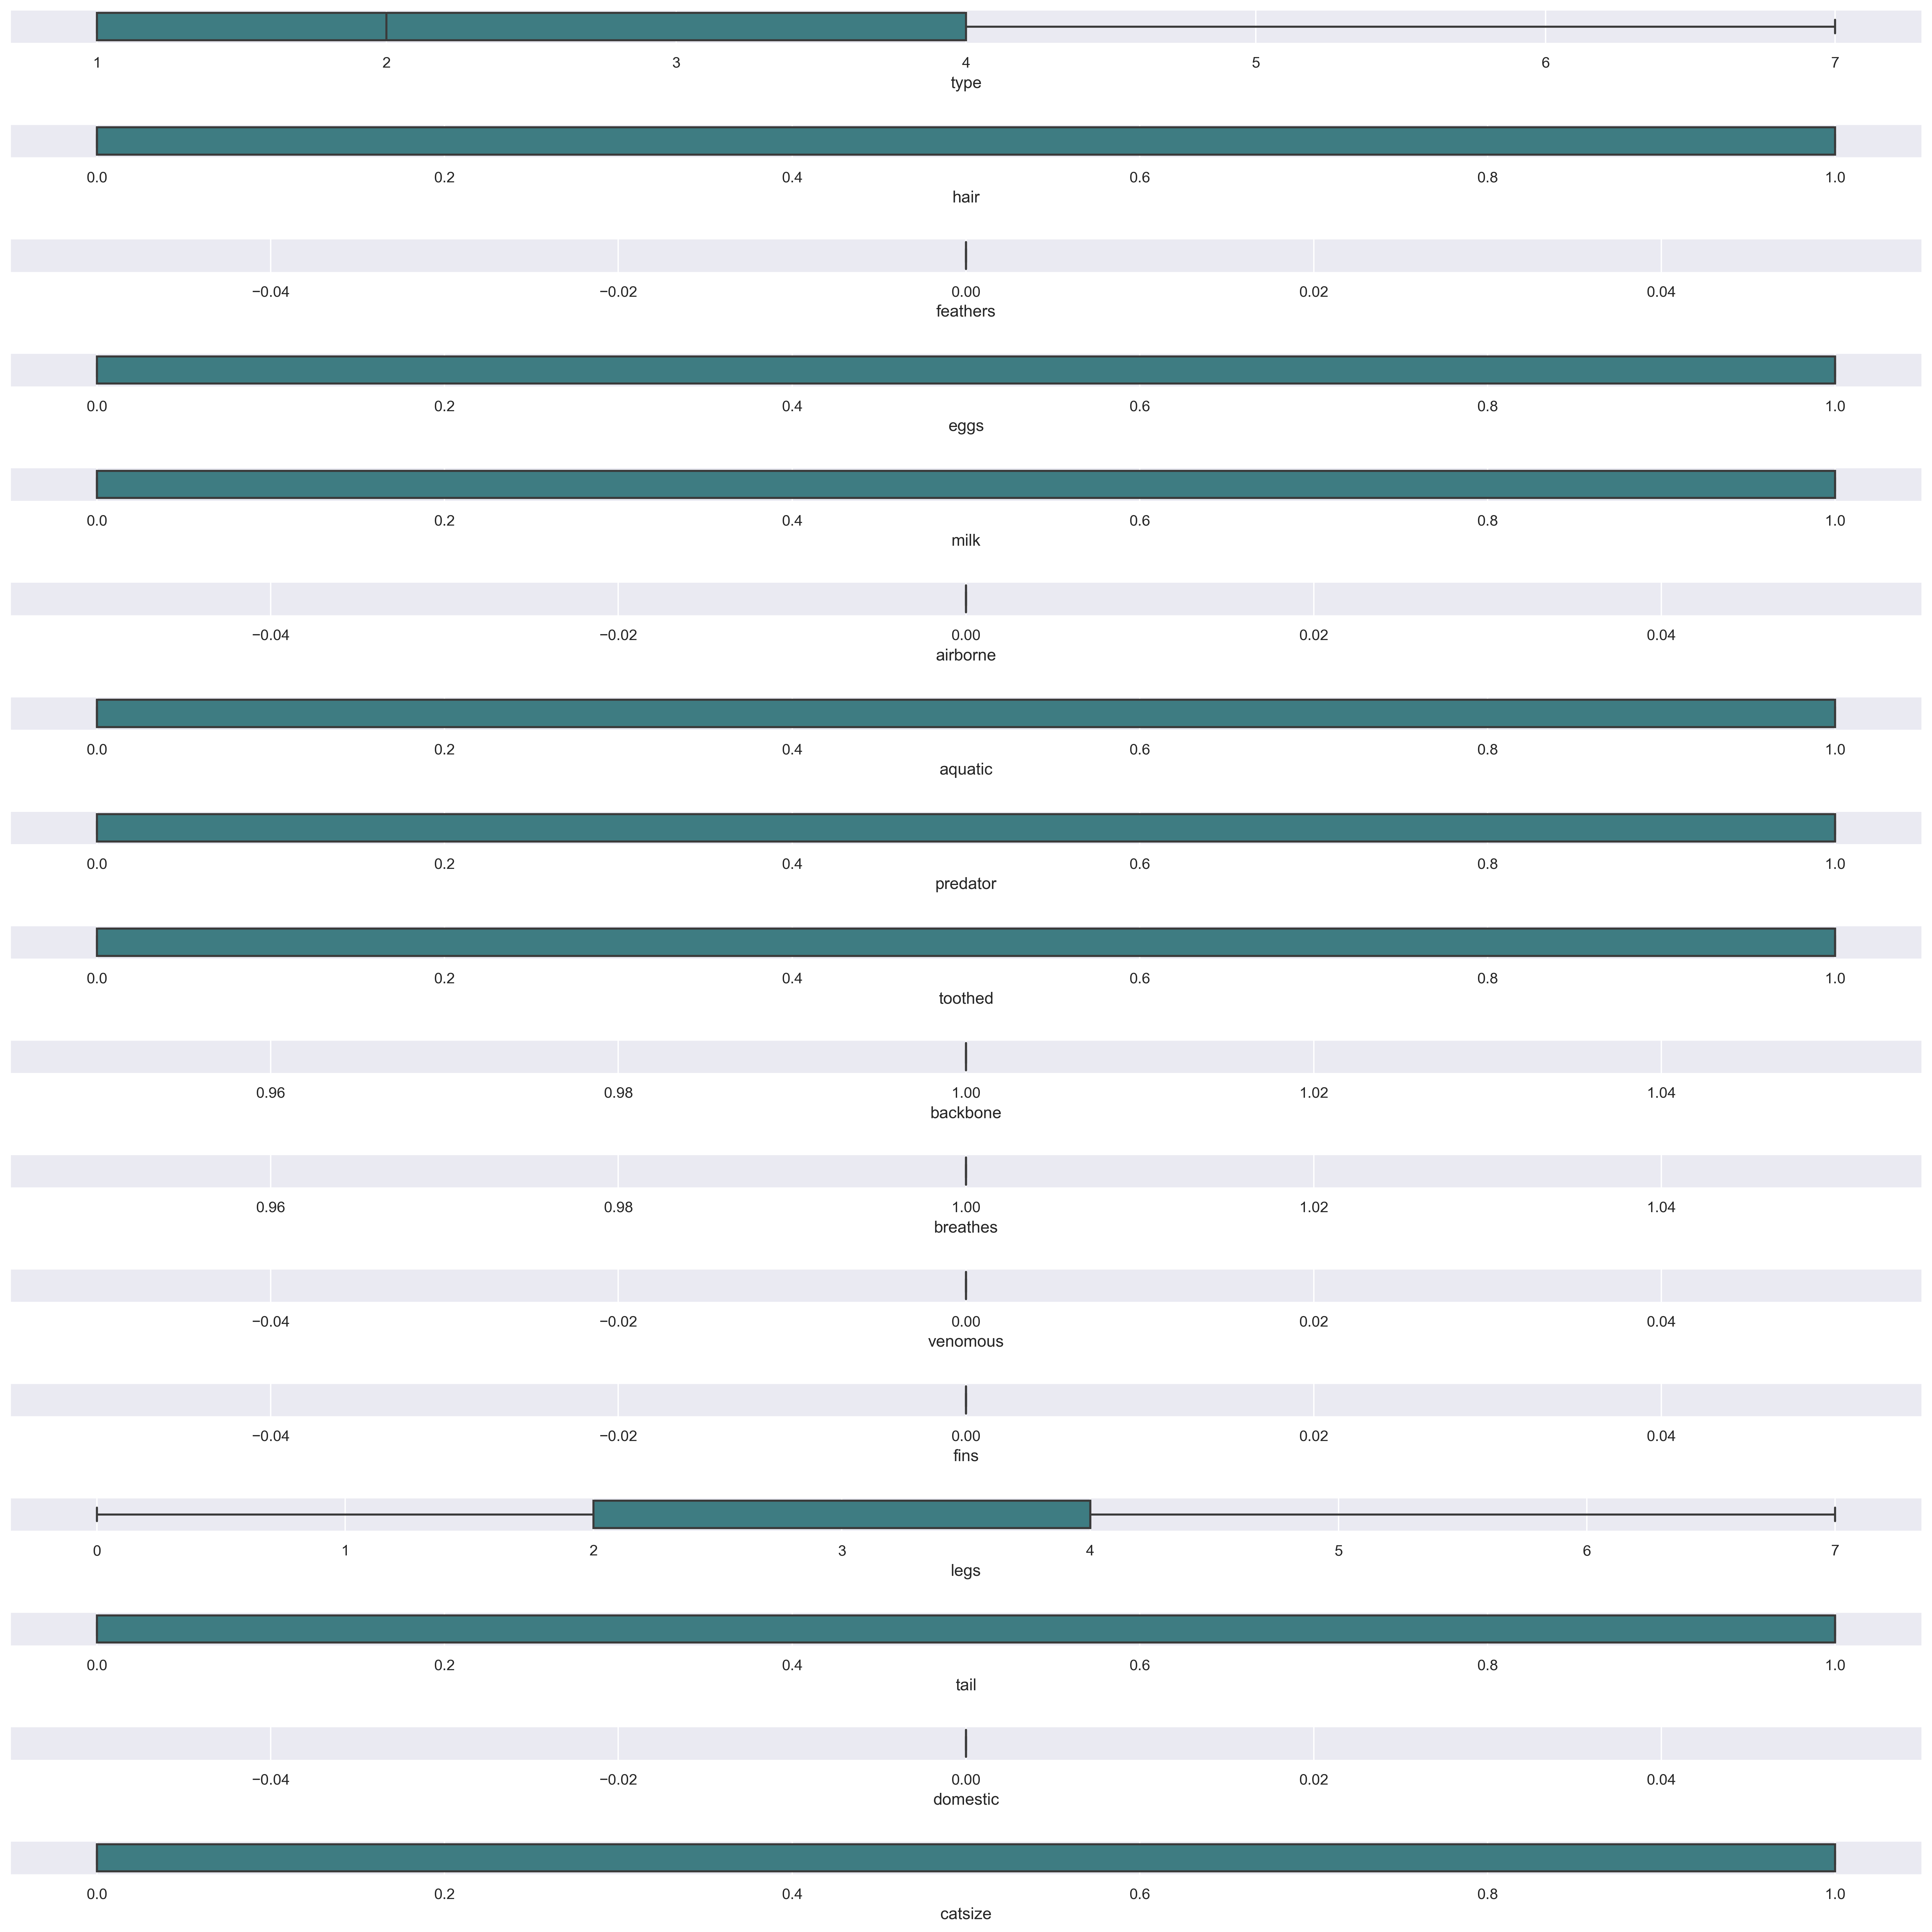

In [65]:
ot=df.copy() 
fig, axes=plt.subplots(17,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='type',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='hair',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='feathers',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='eggs',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='milk',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='airborne',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='aquatic',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='predator',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='toothed',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='backbone',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='breathes',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='venomous',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='fins',data=ot,palette='crest',ax=axes[12])
sns.boxplot(x='legs',data=ot,palette='crest',ax=axes[13])
sns.boxplot(x='tail',data=ot,palette='crest',ax=axes[14])
sns.boxplot(x='domestic',data=ot,palette='crest',ax=axes[15])
sns.boxplot(x='catsize',data=ot,palette='crest',ax=axes[16])
plt.tight_layout(pad=2.0)

# Scatter Plot and Correlation

In [66]:
sns.pairplot(df)

In [67]:
df.corr()

hair  feathers      eggs      milk  airborne   aquatic  \
hair      1.000000       NaN -0.817382  0.878503       NaN -0.473554   
feathers       NaN       NaN       NaN       NaN       NaN       NaN   
eggs     -0.817382       NaN  1.000000 -0.938848       NaN  0.376244   
milk      0.878503       NaN -0.938848  1.000000       NaN -0.362613   
airborne       NaN       NaN       NaN       NaN       NaN       NaN   
aquatic  -0.473554       NaN  0.376244 -0.362613       NaN  1.000000   
predator -0.154769       NaN  0.011605 -0.029721       NaN  0.375978   
toothed   0.492531       NaN -0.642150  0.628168       NaN  0.053150   
backbone       NaN       NaN       NaN       NaN       NaN       NaN   
breathes       NaN       NaN       NaN       NaN       NaN       NaN   
venomous       NaN       NaN       NaN       NaN       NaN       NaN   
fins           NaN       NaN       NaN       NaN       NaN       NaN   
legs      0.411843       NaN -0.228466  0.227483       NaN -0.372071   
tail      0.048973       NaN -0.221090  0.210026       NaN -0.034642   
domestic       NaN       NaN       NaN       NaN       NaN       NaN   
catsize   0.455020       NaN -0.514650  0.574906       NaN -0.111866   
type     -0.562384       NaN  0.661825 -0.723683       NaN  0.326639   

          predator   toothed  backbone  breathes  venomous  fins      legs  \
hair     -0.154769  0.492531       NaN       NaN       NaN   NaN  0.411843   
feathers       NaN       NaN       NaN       NaN       NaN   NaN       NaN   
eggs      0.011605 -0.642150       NaN       NaN       NaN   NaN -0.228466   
milk     -0.029721  0.628168       NaN       NaN       NaN   NaN  0.227483   
airborne       NaN       NaN       NaN       NaN       NaN   NaN       NaN   
aquatic   0.375978  0.053150       NaN       NaN       NaN   NaN -0.372071   
predator  1.000000  0.129452       NaN       NaN       NaN   NaN -0.111032   
toothed   0.129452  1.000000       NaN       NaN       NaN   NaN -0.185630   
backbone       NaN       NaN       NaN       NaN       NaN   NaN       NaN   
breathes       NaN       NaN       NaN       NaN       NaN   NaN       NaN   
venomous       NaN       NaN       NaN       NaN       NaN   NaN       NaN   
fins           NaN       NaN       NaN       NaN       NaN   NaN       NaN   
legs     -0.111032 -0.185630       NaN       NaN       NaN   NaN  1.000000   
tail      0.018947  0.310368       NaN       NaN       NaN   NaN -0.350880   
domestic       NaN       NaN       NaN       NaN       NaN   NaN       NaN   
catsize   0.144790  0.344010       NaN       NaN       NaN   NaN  0.069099   
type      0.061179 -0.471527       NaN       NaN       NaN   NaN  0.114818   

              tail  domestic   catsize      type  
hair      0.048973       NaN  0.455020 -0.562384  
feathers       NaN       NaN       NaN       NaN  
eggs     -0.221090       NaN -0.514650  0.661825  
milk      0.210026       NaN  0.574906 -0.723683  
airborne       NaN       NaN       NaN       NaN  
aquatic  -0.034642       NaN -0.111866  0.326639  
predator  0.018947       NaN  0.144790  0.061179  
toothed   0.310368       NaN  0.344010 -0.471527  
backbone       NaN       NaN       NaN       NaN  
breathes       NaN       NaN       NaN       NaN  
venomous       NaN       NaN       NaN       NaN  
fins           NaN       NaN       NaN       NaN  
legs     -0.350880       NaN  0.069099  0.114818  
tail      1.000000       NaN  0.243277 -0.631830  
domestic       NaN       NaN       NaN       NaN  
catsize   0.243277       NaN  1.000000 -0.521030  
type     -0.631830       NaN -0.521030  1.000000

# Transformations

- Machines do not understand words and sentences.
- Machines only understand numbers.
- Before model building, we have convert all the categorical columns into numerical.

In [77]:
from sklearn.preprocessing import OrdinalEncoder

# Selecting only categorical columns

In [96]:
df.select_dtypes(object).columns

Index(['animal name'], dtype='object')

In [98]:
cat_columns = df.select_dtypes(object).columns
cat_columns

Index(['animal name'], dtype='object')

In [100]:
df[cat_columns]

animal name
0      aardvark
1      antelope
2          bass
3          bear
4          boar
..          ...
96      wallaby
97         wasp
98         wolf
99         worm
100        wren

[101 rows x 1 columns]

In [101]:
oe = OrdinalEncoder()

df[cat_columns] = oe.fit_transform(df[cat_columns])

In [102]:
df

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0            0.0     1         0     0     1         0        0         1   
1            1.0     1         0     0     1         0        0         0   
2            2.0     0         0     1     0         0        1         1   
3            3.0     1         0     0     1         0        0         1   
4            4.0     1         0     0     1         0        0         1   
..           ...   ...       ...   ...   ...       ...      ...       ...   
96          95.0     1         0     0     1         0        0         0   
97          96.0     1         0     1     0         1        0         0   
98          97.0     1         0     0     1         0        0         1   
99          98.0     0         0     1     0         0        0         0   
100         99.0     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1         1         1         0     0     4     0         0   
1          1         1         1         0     0     4     1         0   
2          1         1         0         0     1     0     1         0   
3          1         1         1         0     0     4     0         0   
4          1         1         1         0     0     4     1         0   
..       ...       ...       ...       ...   ...   ...   ...       ...   
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  type  
0          1     1  
1          1     1  
2          0     4  
3          1     1  
4          1     1  
..       ...   ...  
96         1     1  
97         0     6  
98         1     1  
99         0     7  
100        0     2  

[101 rows x 18 columns]

# Scaling the data

- Normalization
- Scales value within the range of 0 to 1.

- Standardization

- Uses Z score for scaling.
- Scale values in such a way that the mean = 0 and standard deviation is 1

# Model building

In [103]:
x = df.iloc[:,:-1]
y = df["type"]

In [104]:
x

animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0            0.0     1         0     0     1         0        0         1   
1            1.0     1         0     0     1         0        0         0   
2            2.0     0         0     1     0         0        1         1   
3            3.0     1         0     0     1         0        0         1   
4            4.0     1         0     0     1         0        0         1   
..           ...   ...       ...   ...   ...       ...      ...       ...   
96          95.0     1         0     0     1         0        0         0   
97          96.0     1         0     1     0         1        0         0   
98          97.0     1         0     0     1         0        0         1   
99          98.0     0         0     1     0         0        0         0   
100         99.0     0         1     1     0         1        0         0   

     toothed  backbone  breathes  venomous  fins  legs  tail  domestic  \
0          1         1         1         0     0     4     0         0   
1          1         1         1         0     0     4     1         0   
2          1         1         0         0     1     0     1         0   
3          1         1         1         0     0     4     0         0   
4          1         1         1         0     0     4     1         0   
..       ...       ...       ...       ...   ...   ...   ...       ...   
96         1         1         1         0     0     2     1         0   
97         0         0         1         1     0     6     0         0   
98         1         1         1         0     0     4     1         0   
99         0         0         1         0     0     0     0         0   
100        0         1         1         0     0     2     1         0   

     catsize  
0          1  
1          1  
2          0  
3          1  
4          1  
..       ...  
96         1  
97         0  
98         1  
99         0  
100        0  

[101 rows x 17 columns]

In [105]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [106]:
sd = StandardScaler()

In [107]:
df.describe()

animal name        hair    feathers        eggs        milk  \
count   101.000000  101.000000  101.000000  101.000000  101.000000   
mean     49.257426    0.425743    0.198020    0.584158    0.405941   
std      28.968829    0.496921    0.400495    0.495325    0.493522   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%      25.000000    0.000000    0.000000    0.000000    0.000000   
50%      49.000000    0.000000    0.000000    1.000000    0.000000   
75%      74.000000    1.000000    0.000000    1.000000    1.000000   
max      99.000000    1.000000    1.000000    1.000000    1.000000   

         airborne     aquatic    predator     toothed    backbone    breathes  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.237624    0.356436    0.554455    0.603960    0.821782    0.792079   
std      0.427750    0.481335    0.499505    0.491512    0.384605    0.407844   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    1.000000    1.000000   
50%      0.000000    0.000000    1.000000    1.000000    1.000000    1.000000   
75%      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         venomous        fins        legs        tail    domestic     catsize  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.079208    0.168317    2.841584    0.742574    0.128713    0.435644   
std      0.271410    0.376013    2.033385    0.439397    0.336552    0.498314   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    2.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    4.000000    1.000000    0.000000    0.000000   
75%      0.000000    0.000000    4.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    8.000000    1.000000    1.000000    1.000000   

             type  
count  101.000000  
mean     2.831683  
std      2.102709  
min      1.000000  
25%      1.000000  
50%      2.000000  
75%      4.000000  
max      7.000000

In [108]:
x = sd.fit_transform(x)

In [109]:
x

array([[-1.70884021,  1.16139451, -0.49690399, ..., -1.69841555,
        -0.38435306,  1.13818037],
       [-1.67414817,  1.16139451, -0.49690399, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [-1.63945614, -0.86103386, -0.49690399, ...,  0.58878406,
        -0.38435306, -0.87859537],
       ...,
       [ 1.65628693,  1.16139451, -0.49690399, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [ 1.69097896, -0.86103386, -0.49690399, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [ 1.725671  , -0.86103386,  2.01246118, ...,  0.58878406,
        -0.38435306, -0.87859537]])

In [110]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [111]:
xtrain

array([[ 1.34405864, -0.86103386, -0.49690399, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.8415394 , -0.86103386, -0.49690399, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [-0.28646688, -0.86103386, -0.49690399, ..., -1.69841555,
        -0.38435306, -0.87859537],
       ...,
       [-1.22315175, -0.86103386, -0.49690399, ..., -1.69841555,
        -0.38435306, -0.87859537],
       [ 1.44813474, -0.86103386, -0.49690399, ...,  0.58878406,
        -0.38435306,  1.13818037],
       [ 0.02576141,  1.16139451, -0.49690399, ..., -1.69841555,
        -0.38435306, -0.87859537]])

In [112]:
ytrain

89    5
26    5
42    6
70    1
15    7
     ..
60    4
71    2
14    7
92    4
51    6
Name: type, Length: 80, dtype: int64

In [121]:
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
knn.score(xtrain,ytrain),knn.score(xtest,ytest)

(0.9875, 0.9523809523809523)

# While looking at the above test and training accuracy we got good genderlized model without performing the Hyperparameter Tuning.

# Hyperparameter Tuning for knn

In [115]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))

In [116]:
train_acc

[1.0,
 0.975,
 0.975,
 0.9375,
 0.9875,
 0.975,
 0.95,
 0.95,
 0.95,
 0.9375,
 0.875,
 0.875,
 0.85,
 0.875,
 0.85,
 0.8625,
 0.85,
 0.8375,
 0.85]

In [117]:
test_acc

[1.0,
 1.0,
 1.0,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9523809523809523,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.9047619047619048,
 0.8571428571428571,
 0.8571428571428571]

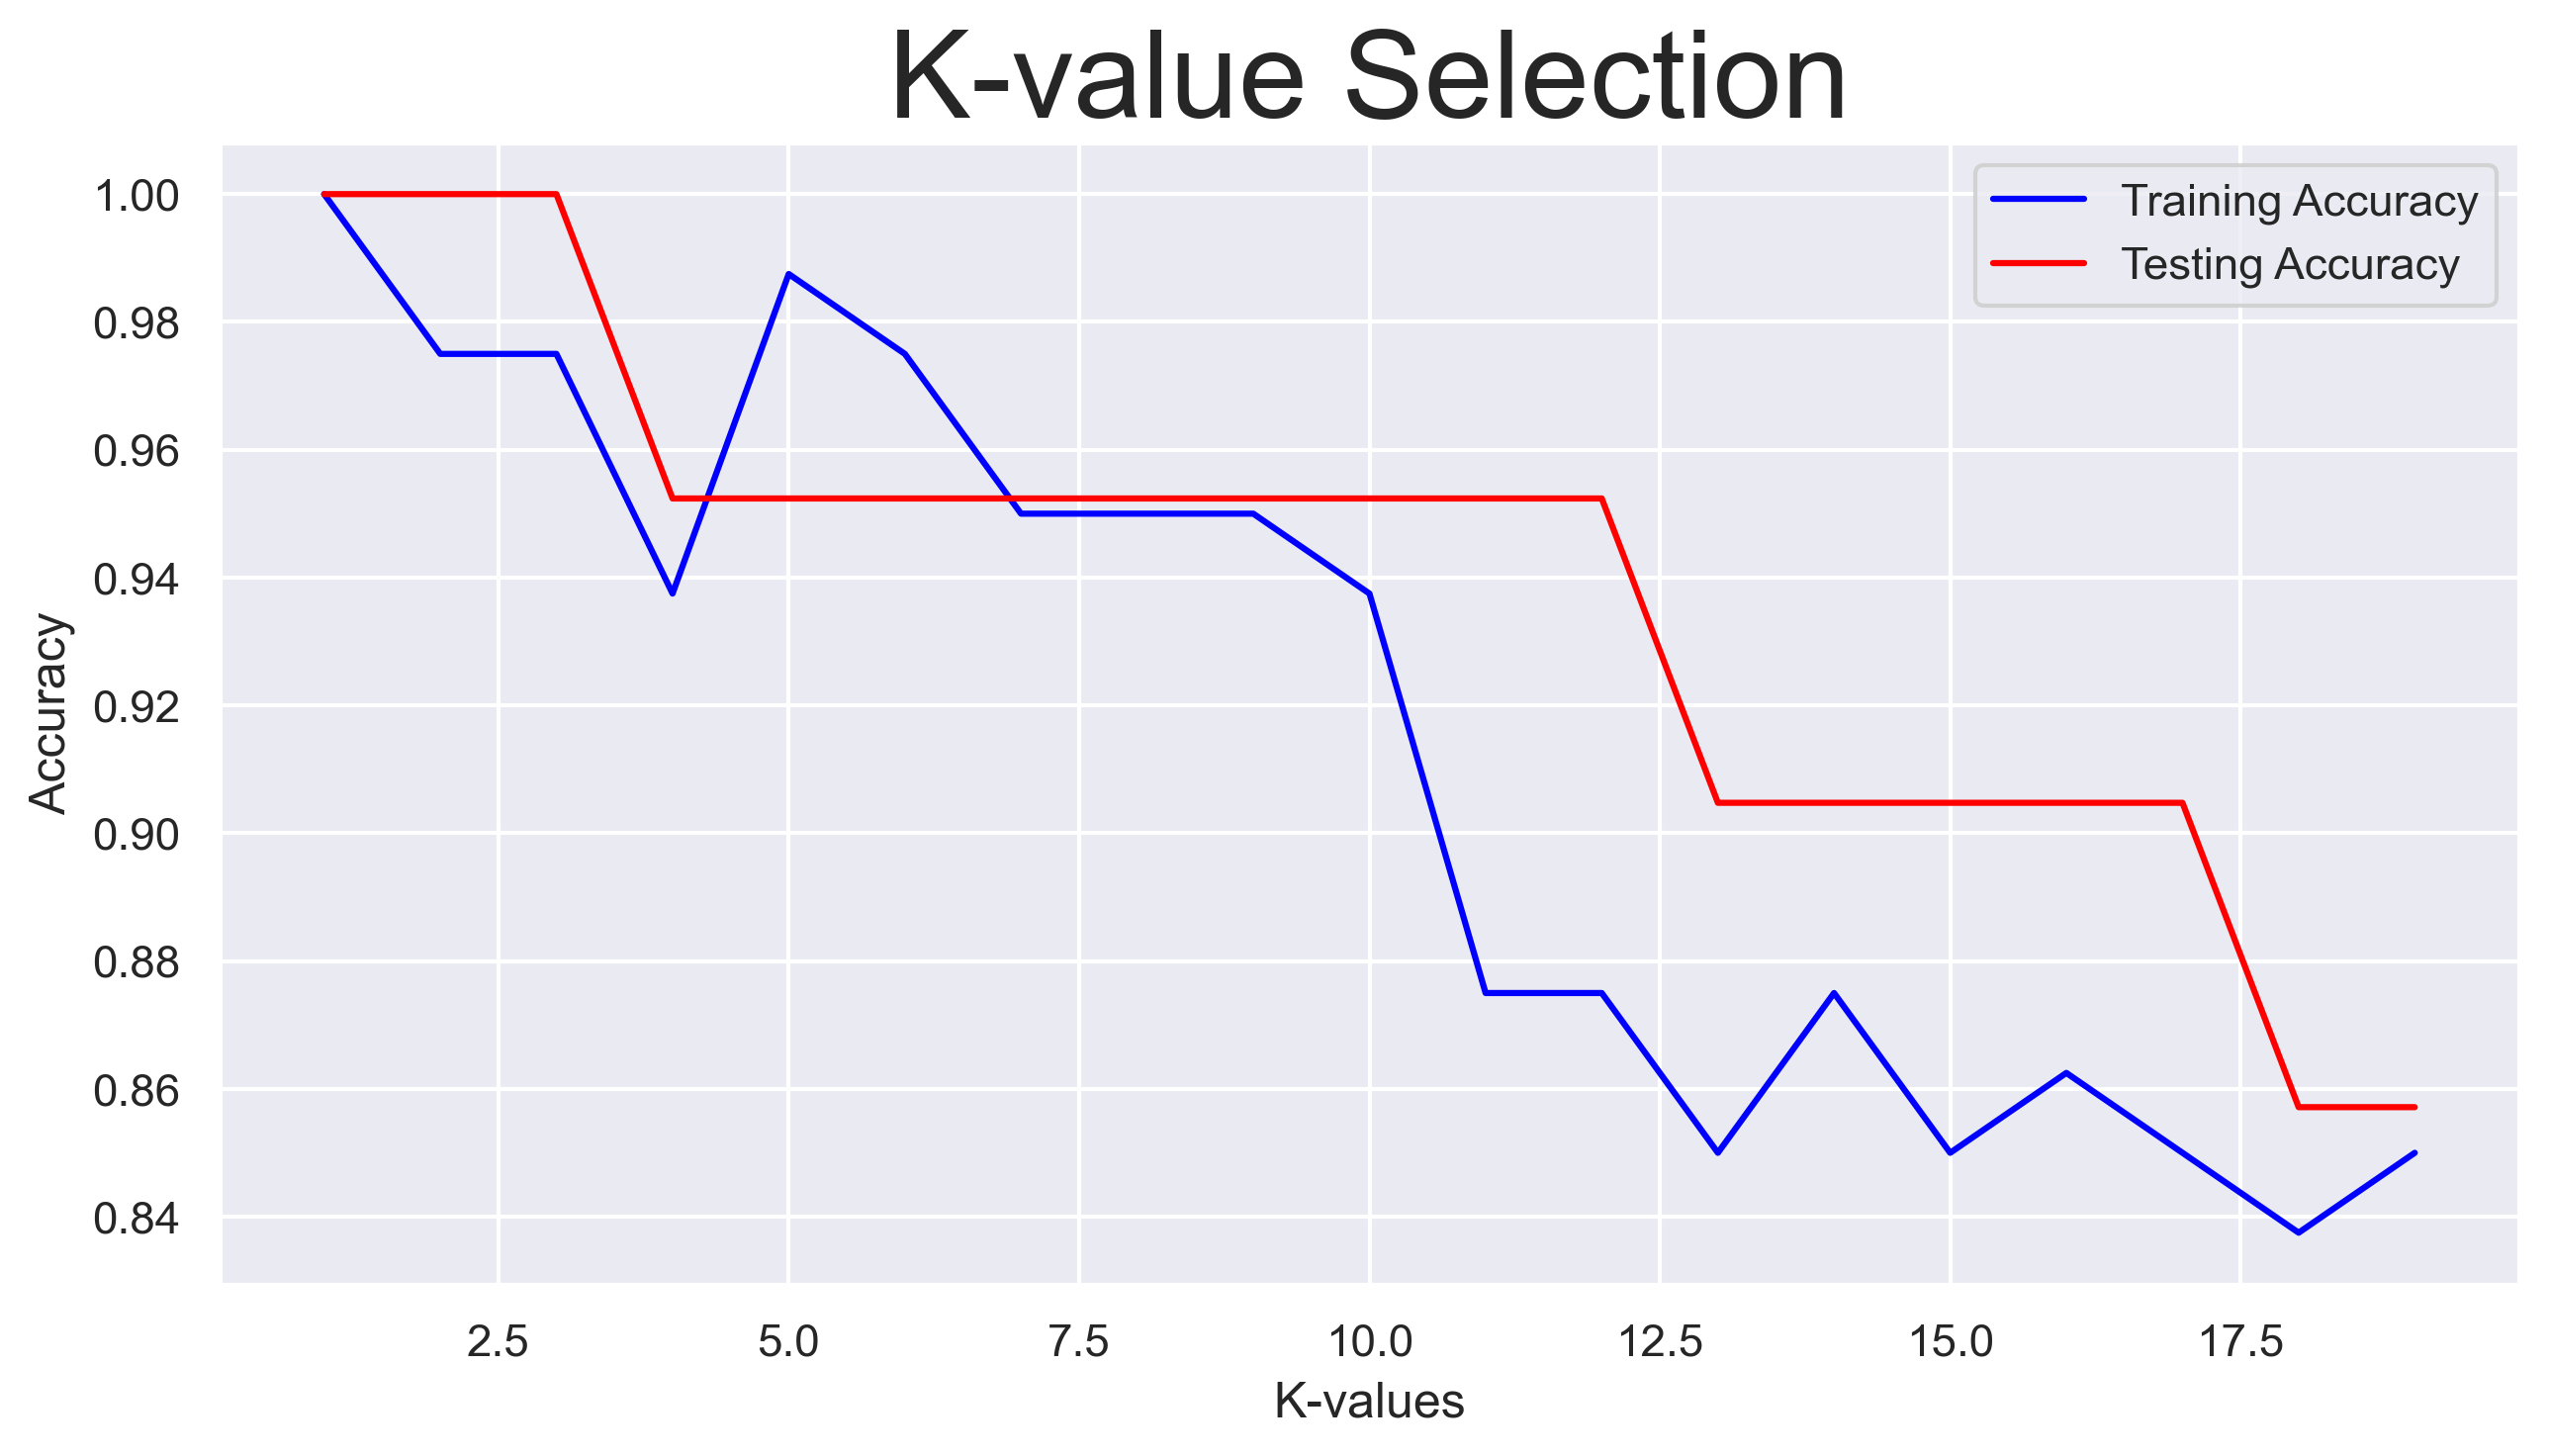

In [118]:
plt.plot(range(1,20), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection', size = 30)
plt.legend()

In [119]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(1.0, 1.0)

# After Performing the Hyperparameter tuning we got 100% accuracy with both test and training. Now we created the good model.

In [122]:
ypred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4],
      dtype=int64)